In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sn
from matplotlib.ticker import AutoMinorLocator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os
py_file_location = "/content/drive/My Drive/MS_thesis_work/"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
import plotting_fun
import Queue_methods
import Graph_functions

In [ ]:
help(Graph_functions)

<center><h1>A minimal model for congestion phenomena on
complex networks</h1>
Daniele De Martino, Luca Dall’Asta, Ginestra Bianconi and Matteo Marsili</center>
<br>
Dated: 27 July, 2009
<b>
<center>
 <h3><u>Abstract</u><br></h3>
We study a minimal model of traffic flows in complex networks, simple
enough to get analytical results, but with a very rich phenomenology, presenting
continuous, discontinuous as well as hybrid phase transitions between a free-flow phase
and a congested phase, critical points and different scaling behaviors in the system size.
It consists of random walkers on a queueing network with one-range repulsion, where
particles can be destroyed only if they can move. We focus on the dependence on
the topology as well as on the level of traffic control. We are able to obtain transition
curves and phase diagrams at analytical level for the ensemble of uncorrelated networks
and numerically for single instances. We find that traffic control improves global
performance, enlarging the free-flow region in parameter space only in heterogeneous
networks. Traffic control introduces non-linear effects and, beyond a critical strength,
may trigger the appearance of a congested phase in a discontinuous manner. The model
also reproduces the cross-over in the scaling of traffic fluctuations empirically observed
in the Internet, and moreover, a conserved version can reproduce qualitatively some
stylized facts of traffic in transportation networks.
</b></center>

##<u>Model</u>
<ul>
<li>Consider a network of N nodes and let v(i) be the set of neighbors of node i. We
describe particles dynamics as a continuous time stochastic process, in which particles
are generated at each node i with a rate $p_i$.</li>
<li>Each node is endowed with a FIFO queue, in which arriving particles are stored.</li>
<li> . Let $n_i$ be the number of particles in
the queue of node i. If $n_i$ > 0, we assume the following probabilistic hop rule:</li>
<li>If $n_i >$ 0, the topmost particle leaves the node and jumps in the queue of a randomly chosen neighbour j $\in$ {$\Omega_i$}.</li>
<li>The arrival node rejects the particle with probability $\eta(n_j)$, and it stays on the departure node.</li>
<li>If not rejected, the particle is either destroyed during the hopping with a probability $\mu_j$ or enters the queue on node j.</li>

</ul>

In [ ]:
adjacency_list=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/adjacency_list_2D_lattice")
nodes_degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
nodes=len(list(adjacency_list.keys()))
nodes

1000

In [ ]:
nodes_same_deg=Graph_functions.nodes_with_same_Degree(nodes_degree_dict)

In [ ]:
Ordered_nodes_Incr_Deg=[]
for i in nodes_same_deg:
  Ordered_nodes_Incr_Deg.extend(i[1])
Ordered_nodes_Incr_Deg=np.array(Ordered_nodes_Incr_Deg)  

In [ ]:
nodes=100
G_nx=nx.barabasi_albert_graph(nodes,m=2,seed=2)
adjacency_list,nodes_degree_dict=Graph_functions.adjacency_list_nodeDegree(G_nx,nodes)


In [ ]:
nodes=1000
G_nx2=nx.grid_2d_graph(50, 20, periodic=False, create_using=None)
G_nx2=nx.convert_node_labels_to_integers(G_nx2)
#nx.draw_kamada_kawai(G_nx2,with_labels=True)

In [ ]:
adjacency_list,nodes_degree=Graph_functions.adjacency_list_nodeDegree(G_nx2, nodes)

In [ ]:
nodes_degree

In [ ]:
rejection_prob=0.000
node_capacity=5
out_flux=1
dead_prob=0.200
p=0.200

In [ ]:
def creat_particles_probabilistically(nodes,p,Each_node_queue):
    for node in range(nodes):
          rnum1=np.round(np.random.rand(1)[0],3)
          if rnum1<=p:
              Each_node_queue[node].enqueue([node])
    return Each_node_queue


def creat_particles_prob_Without_Q(nodes,p,walkers_on_nodes_dict):
    for node in range(nodes):
          rnum1=np.round(np.random.rand(1)[0],3)
          if rnum1<=p:
              walkers_on_nodes_dict[node]+=1
    return walkers_on_nodes_dict 
def creat_particles_prob_Without_Q(nodes,p,walkers_on_nodes_dict):
   
    for node in range(nodes):
          rnum1=np.round(np.random.rand(1)[0],3)
          if rnum1<=p:
              walkers_on_nodes_dict[node]+=1
    return walkers_on_nodes_dict       

In [ ]:
Time=100
Each_node_queue={}
Each_node_TimeS={}
walkers_on_nodes={}
for node in range(nodes):
      Each_node_queue[node]=Queue_methods.Queue_list()
      Each_node_TimeS[node]=[]     
for time in range(Time):
    print("time",time)
    creat_particles_probabilistically(nodes,p,Each_node_queue)
    walkers_on_nodes_dummy={i:Each_node_queue[node].queue_size() for i in range(nodes)}
    Each_node_queue_dummy={i:Queue_methods.Queue_list() for i in range(nodes)}
    for node in range(nodes):
      print("current node",node)
      print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
      print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
      if Each_node_queue[node].queue_size()>0:
        for w in range(out_flux):
          walker_out_dest=Each_node_queue[node].show()[0]
          neighbours=adjacency_list[node]
          choosen_node=np.random.choice(neighbours)
          print("chosen node",choosen_node)
          if Each_node_queue[choosen_node].queue_size()<=node_capacity:
            print("Not congested")
            rnum1=np.round(np.random.rand(1)[0],3)
            if rnum1<=dead_prob:
                Each_node_queue[node].dequeue()
                print("walker destroyed")
            else:
                Each_node_queue[node].dequeue()
                Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                print("walker transfered",node,choosen_node)
          else:
            print("congested")
            rnum2=np.round(np.random.rand(1)[0],3)
            if rnum2<=rejection_prob:
              print("walker rejected")
              continue
            else:
              print("walker not rejected")
              rnum3=np.round(np.random.rand(1)[0],3)
              if rnum3<=dead_prob:
                Each_node_queue[node].dequeue()
                print("walker destroyed")
              else:
                Each_node_queue[node].dequeue()
                Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                print("walker transfered",node,choosen_node)
      else:
        print(node,"Node is empty")
        continue
    for node in range(nodes):
      Each_node_queue[node].enqueue(Each_node_queue_dummy[node].show())
      #print("Final queue of node",node,Each_node_queue[node].show())
      Each_node_TimeS[node].append(Each_node_queue[node].queue_size())
      #print(Each_node_TimeS[node])        

Streaming output truncated to the last 5000 lines.
current node 4
main queue [[0, []], [1, []], [2, [3, 2]], [3, []], [4, [2, 5]], [5, [1]], [6, [7]], [7, [9]], [8, []], [9, [8, 6, 9]]]
dummy [[0, []], [1, []], [2, []], [3, [5]], [4, []], [5, []], [6, []], [7, []], [8, []], [9, []]]
chosen node 5
Not congested
walker transfered 4 5
current node 5
main queue [[0, []], [1, []], [2, [3, 2]], [3, []], [4, [5]], [5, [1]], [6, [7]], [7, [9]], [8, []], [9, [8, 6, 9]]]
dummy [[0, []], [1, []], [2, []], [3, [5]], [4, []], [5, [2]], [6, []], [7, []], [8, []], [9, []]]
chosen node 3
Not congested
walker transfered 5 3
current node 6
main queue [[0, []], [1, []], [2, [3, 2]], [3, []], [4, [5]], [5, []], [6, [7]], [7, [9]], [8, []], [9, [8, 6, 9]]]
dummy [[0, []], [1, []], [2, []], [3, [5, 1]], [4, []], [5, [2]], [6, []], [7, []], [8, []], [9, []]]
chosen node 4
Not congested
walker transfered 6 4
current node 7
main queue [[0, []], [1, []], [2, [3, 2]], [3, []], [4, [5]], [5, []], [6, []], [7, [9]

In [ ]:
rejection_prob=0.250
node_capacity=10
out_flux=1
dead_prob=0.200

In [ ]:
%%time
Time=10000
for p in [0.020,0.022]:
  Each_node_queue={}
  Each_node_TimeS={}
  walkers_on_nodes={}
  for node in range(nodes):
        Each_node_queue[node]=Queue_methods.Queue_list()
        Each_node_TimeS[node]=[]     
  for time in range(Time):
    #print("time",time)
    creat_particles_probabilistically(nodes,p,Each_node_queue)
    walkers_on_nodes_dummy={i:Each_node_queue[node].queue_size() for i in range(nodes)}
    Each_node_queue_dummy={i:Queue_methods.Queue_list() for i in range(nodes)}
    for node in range(nodes):
      #print("current node",node)
      #print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
      #print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
      if Each_node_queue[node].queue_size()>0:
        for w in range(out_flux):
          walker_out_dest=Each_node_queue[node].show()[0]
          neighbours=adjacency_list[node]
          choosen_node=np.random.choice(neighbours)
          #print("chosen node",choosen_node)
          if Each_node_queue[choosen_node].queue_size()<=node_capacity:
            #print("Not congested")
            rnum1=np.round(np.random.rand(1)[0],3)
            if rnum1<=dead_prob:
                Each_node_queue[node].dequeue()
                #print("walker destroyed")
            else:
                Each_node_queue[node].dequeue()
                Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                #print("walker transfered",node,choosen_node)
          else:
            #print("congested")
            rnum2=np.round(np.random.rand(1)[0],3)
            if rnum2<rejection_prob:
              #print("walker rejected")
              continue
            else:
              #print("walker not rejected")
              rnum3=np.round(np.random.rand(1)[0],3)
              if rnum3<=dead_prob:
                Each_node_queue[node].dequeue()
                #print("walker destroyed")
              else:
                Each_node_queue[node].dequeue()
                Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                #print("walker transfered",node,choosen_node)
      else:
        #print(node,"Node is empty")
        continue
      #print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
      #print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])  
    for node in range(nodes):
      Each_node_queue[node].enqueue(Each_node_queue_dummy[node].show())
      #print("Final queue of node",node,Each_node_queue[node].show())
      Each_node_TimeS[node].append(Each_node_queue[node].queue_size())
      #print(Each_node_TimeS[node])
  total_wal=np.zeros(Time)
  for node in range(nodes):
      total_wal+=np.array(Each_node_TimeS[node])
  df["TimeS_"+str(p)]= total_wal

CPU times: user 8min 10s, sys: 22.1 s, total: 8min 32s
Wall time: 8min 12s


In [ ]:
%%time
Time=100
for p in [0.24]:
  Each_node_queue={}
  Each_node_TimeS={}
  walkers_on_nodes={}
  for node in range(nodes):
        Each_node_queue[node]=Queue_methods.Queue_list()
        Each_node_TimeS[node]=[]     
  for time in range(Time):
    #print("time",time)
    creat_particles_probabilistically(nodes,p,Each_node_queue)
    walkers_on_nodes_dummy={i:Each_node_queue[node].queue_size() for i in range(nodes)}
    Each_node_queue_dummy={i:Queue_methods.Queue_list() for i in range(nodes)}
    for node in range(nodes):
      #print("current node",node)
      #print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
      #print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
      if Each_node_queue[node].queue_size()>0:
        for w in range(out_flux):
          walker_out_dest=Each_node_queue[node].show()[0]
          neighbours=adjacency_list[node]
          choosen_node=np.random.choice(neighbours)
          #print("chosen node",choosen_node)
          if Each_node_queue[choosen_node].queue_size()<=node_capacity:
            #print("Not congested")
            rnum1=np.round(np.random.rand(1)[0],3)
            if rnum1<=dead_prob:
                Each_node_queue[node].dequeue()
                #print("walker destroyed")
            else:
                Each_node_queue[node].dequeue()
                Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                #print("walker transfered",node,choosen_node)
          else:
            #print("congested")
            rnum2=np.round(np.random.rand(1)[0],3)
            if rnum2<rejection_prob:
              #print("walker rejected")
              continue
            else:
              #print("walker not rejected")
              rnum3=np.round(np.random.rand(1)[0],3)
              if rnum3<=dead_prob:
                Each_node_queue[node].dequeue()
                #print("walker destroyed")
              else:
                Each_node_queue[node].dequeue()
                Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                #print("walker transfered",node,choosen_node)
      else:
        #print(node,"Node is empty")
        continue
      #print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
      #print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])  
    for node in range(nodes):
      Each_node_queue[node].enqueue(Each_node_queue_dummy[node].show())
      #print("Final queue of node",node,Each_node_queue[node].show())
      Each_node_TimeS[node].append(Each_node_queue[node].queue_size())
      #print(Each_node_TimeS[node])
  df=np.zeros((Time,nodes))
  for i,node in enumerate(Ordered_nodes_Incr_Deg):
      df[::,i]=np.array(Each_node_TimeS[node])

CPU times: user 5.46 s, sys: 203 ms, total: 5.66 s
Wall time: 5.62 s


In [ ]:
mat=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/Time_series_each_node/2D_latticeTS_mat_OutF_2Deg_cap_3Deg_deadP_p2_rejP_1_birP_1.0")
mat

array([[   0,    1,    1, ...,    0,    0,    0],
       [   2,    1,    1, ...,    1,    0,    0],
       [   1,    2,    2, ...,    1,    1,    2],
       ...,
       [ 117,  126,  116, ..., 1034, 1103, 1217],
       [ 118,  127,  117, ..., 1035, 1104, 1218],
       [ 119,  128,  118, ..., 1036, 1105, 1219]])

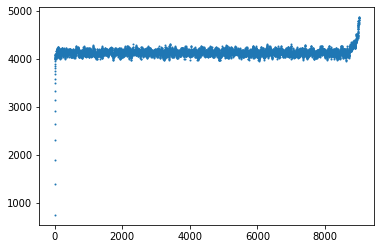

In [ ]:
s=mat.sum(1)
plt.scatter(np.arange(9000),s[:9000],s=1)

In [ ]:
order_para3(mat.sum(1),1,1000)

In [ ]:
new_mat=np.zeros((10000,nodes))
for i,node in enumerate(Ordered_nodes_Incr_Deg):
  new_mat[::,i]=mat[::,node]/(3*nodes_degree_dict[node])

In [ ]:
Ordered_nodes_Incr_Deg

array([  0,  19, 980, 999,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  20,  39,  40,  59,
        60,  79,  80,  99, 100, 119, 120, 139, 140, 159, 160, 179, 180,
       199, 200, 219, 220, 239, 240, 259, 260, 279, 280, 299, 300, 319,
       320, 339, 340, 359, 360, 379, 380, 399, 400, 419, 420, 439, 440,
       459, 460, 479, 480, 499, 500, 519, 520, 539, 540, 559, 560, 579,
       580, 599, 600, 619, 620, 639, 640, 659, 660, 679, 680, 699, 700,
       719, 720, 739, 740, 759, 760, 779, 780, 799, 800, 819, 820, 839,
       840, 859, 860, 879, 880, 899, 900, 919, 920, 939, 940, 959, 960,
       979, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992,
       993, 994, 995, 996, 997, 998,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  61,  62,  63,  64,  65,  66,  67,  68,  6

In [ ]:
new_mat=np.zeros((10000,nodes),dtype=float)
for node in range(nodes):
  new_mat[::,node]=mat[::,node]/(3*nodes_degree_dict[node])

In [ ]:
nodes_degree_dict

{0: 2,
 1: 3,
 2: 3,
 3: 3,
 4: 3,
 5: 3,
 6: 3,
 7: 3,
 8: 3,
 9: 3,
 10: 3,
 11: 3,
 12: 3,
 13: 3,
 14: 3,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 2,
 20: 3,
 21: 4,
 22: 4,
 23: 4,
 24: 4,
 25: 4,
 26: 4,
 27: 4,
 28: 4,
 29: 4,
 30: 4,
 31: 4,
 32: 4,
 33: 4,
 34: 4,
 35: 4,
 36: 4,
 37: 4,
 38: 4,
 39: 3,
 40: 3,
 41: 4,
 42: 4,
 43: 4,
 44: 4,
 45: 4,
 46: 4,
 47: 4,
 48: 4,
 49: 4,
 50: 4,
 51: 4,
 52: 4,
 53: 4,
 54: 4,
 55: 4,
 56: 4,
 57: 4,
 58: 4,
 59: 3,
 60: 3,
 61: 4,
 62: 4,
 63: 4,
 64: 4,
 65: 4,
 66: 4,
 67: 4,
 68: 4,
 69: 4,
 70: 4,
 71: 4,
 72: 4,
 73: 4,
 74: 4,
 75: 4,
 76: 4,
 77: 4,
 78: 4,
 79: 3,
 80: 3,
 81: 4,
 82: 4,
 83: 4,
 84: 4,
 85: 4,
 86: 4,
 87: 4,
 88: 4,
 89: 4,
 90: 4,
 91: 4,
 92: 4,
 93: 4,
 94: 4,
 95: 4,
 96: 4,
 97: 4,
 98: 4,
 99: 3,
 100: 3,
 101: 4,
 102: 4,
 103: 4,
 104: 4,
 105: 4,
 106: 4,
 107: 4,
 108: 4,
 109: 4,
 110: 4,
 111: 4,
 112: 4,
 113: 4,
 114: 4,
 115: 4,
 116: 4,
 117: 4,
 118: 4,
 119: 3,
 120: 3,
 121: 4,
 122: 4,
 12

In [ ]:
new_mat

array([[0.00000000e+00, 1.11111111e-01, 1.11111111e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 1.11111111e-01, 1.11111111e-01, ...,
        1.11111111e-01, 0.00000000e+00, 0.00000000e+00],
       [1.66666667e-01, 2.22222222e-01, 2.22222222e-01, ...,
        1.11111111e-01, 1.11111111e-01, 3.33333333e-01],
       ...,
       [1.95000000e+01, 1.40000000e+01, 1.28888889e+01, ...,
        1.14888889e+02, 1.22555556e+02, 2.02833333e+02],
       [1.96666667e+01, 1.41111111e+01, 1.30000000e+01, ...,
        1.15000000e+02, 1.22666667e+02, 2.03000000e+02],
       [1.98333333e+01, 1.42222222e+01, 1.31111111e+01, ...,
        1.15111111e+02, 1.22777778e+02, 2.03166667e+02]])

In [ ]:
degree_dist={i[0]:len(i[1]) for i in nodes_same_deg}
degree_dist

{2: 4, 3: 132, 4: 864}

In [ ]:
#arr=np.where(new_mat>1,1,0)
arr=np.flip(arr,0)

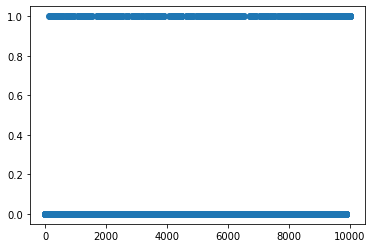

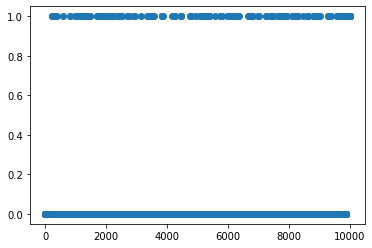

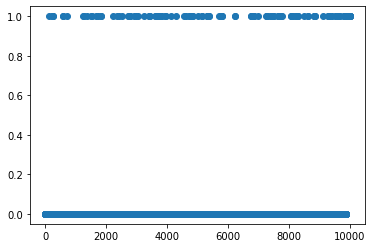

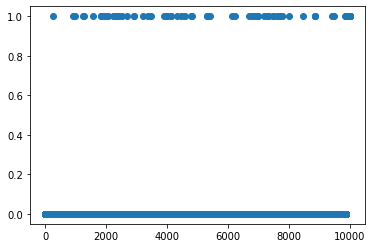

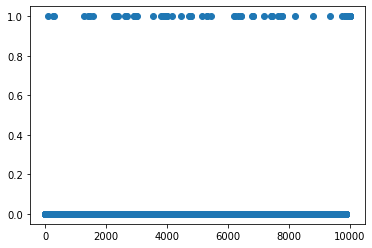

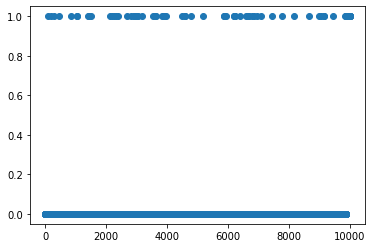

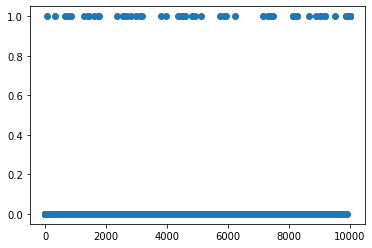

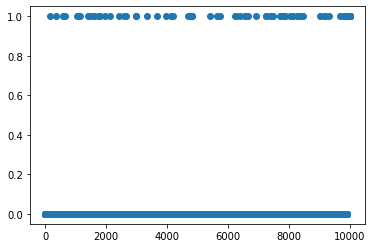

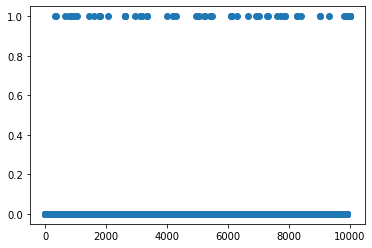

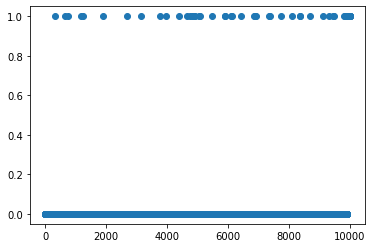

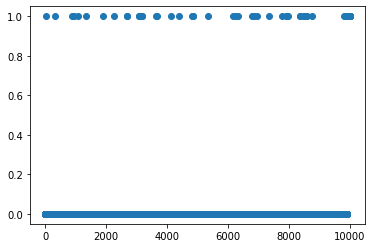

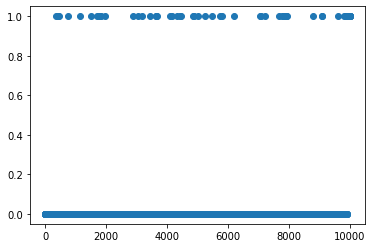

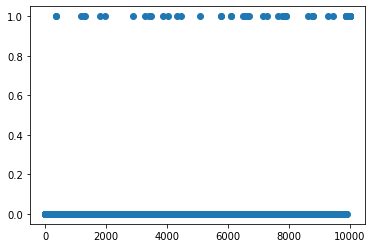

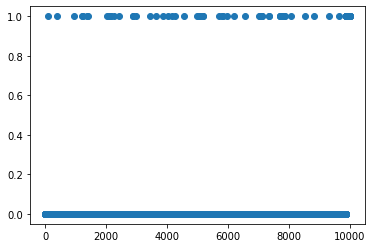

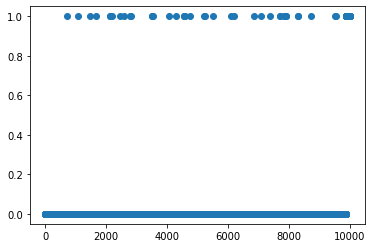

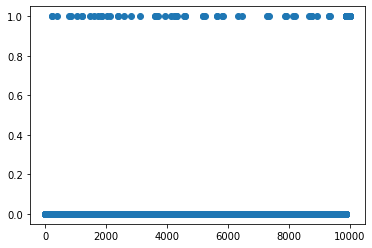

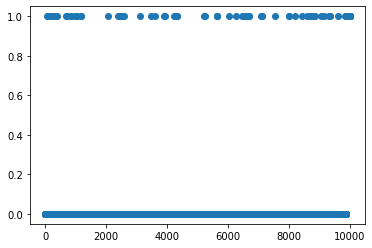

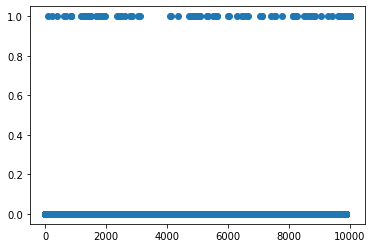

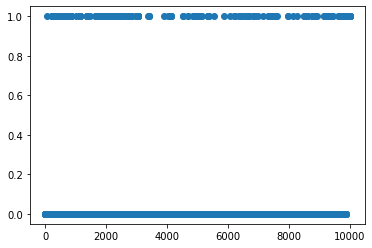

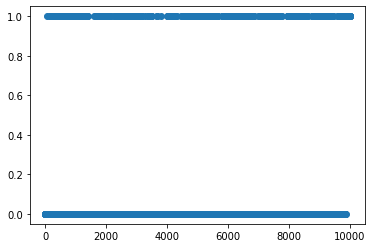

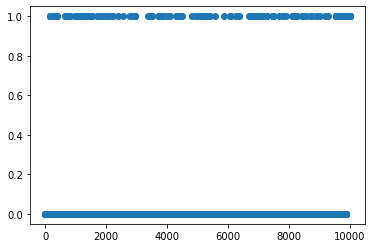

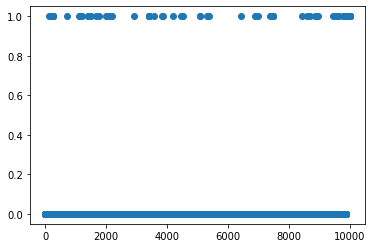

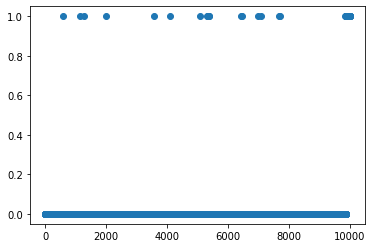

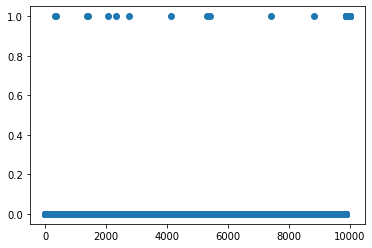

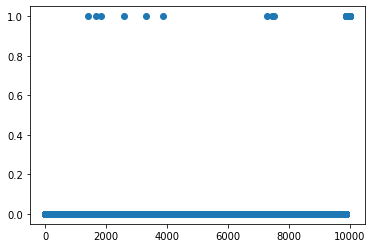

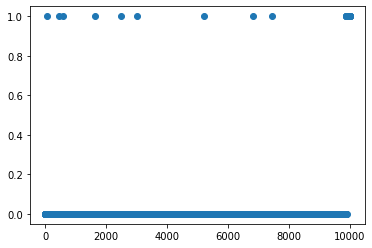

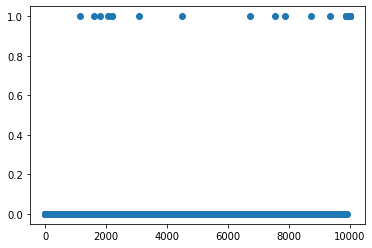

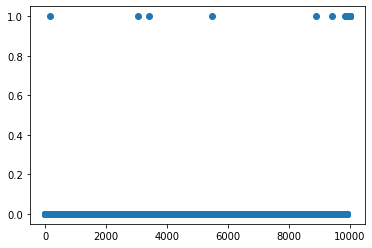

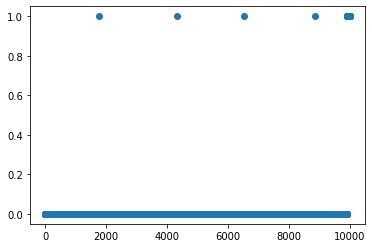

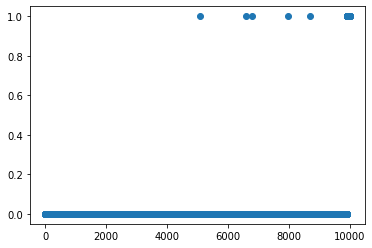

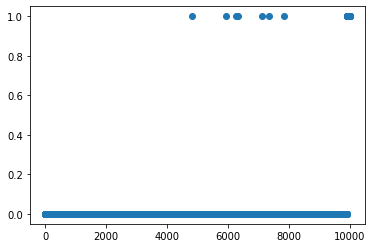

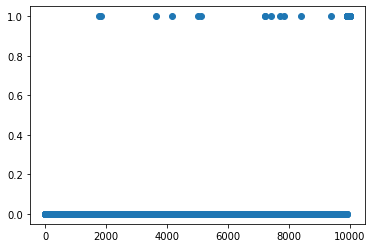

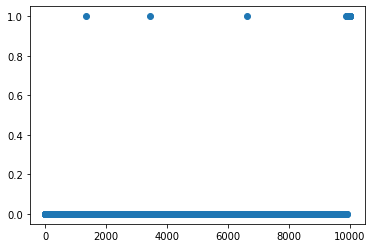

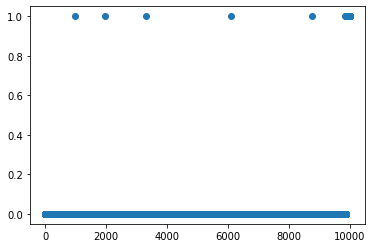

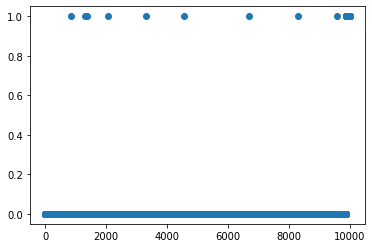

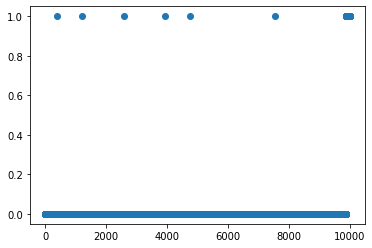

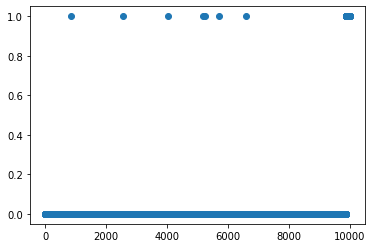

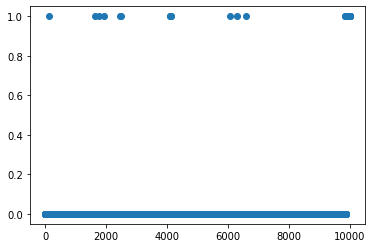

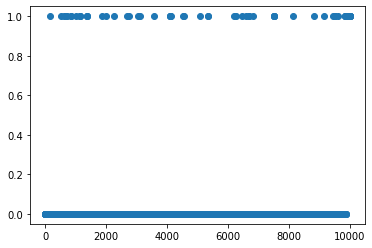

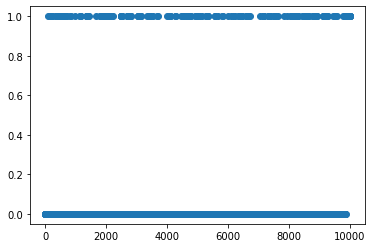

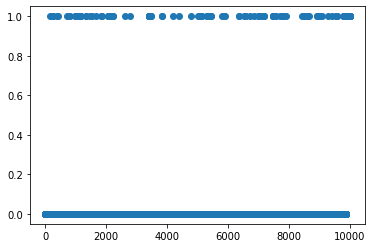

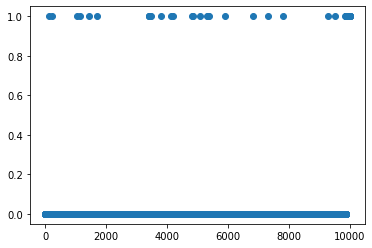

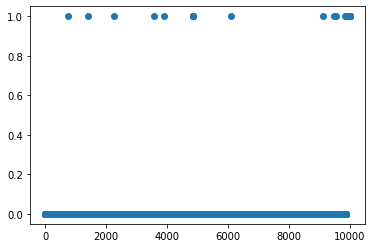

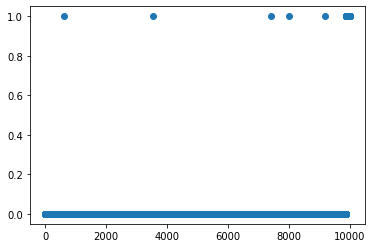

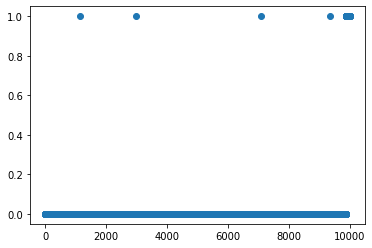

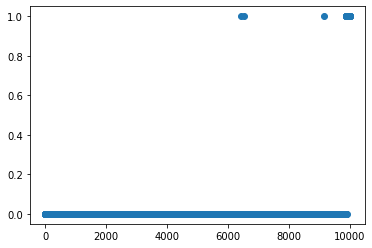

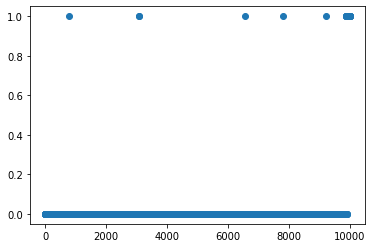

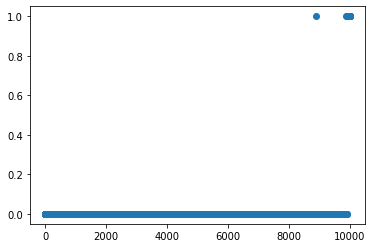

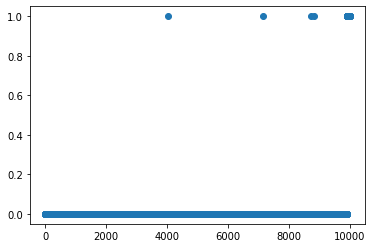

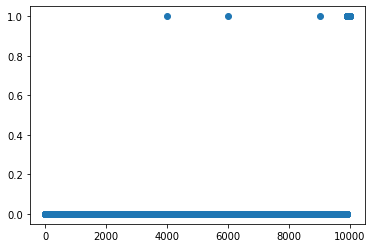

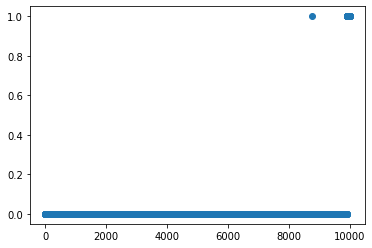

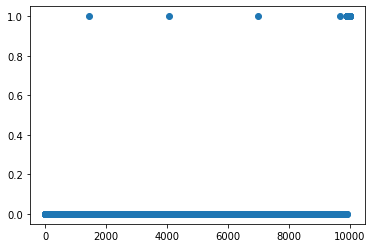

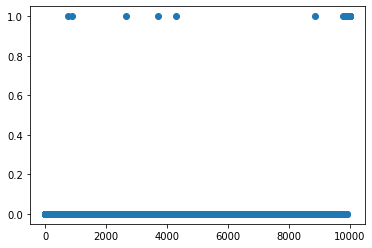

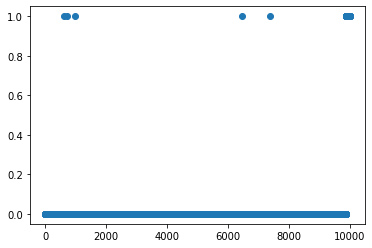

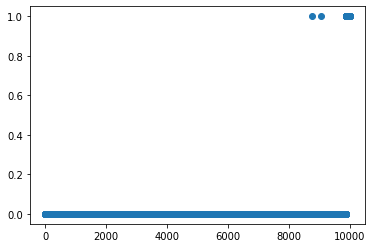

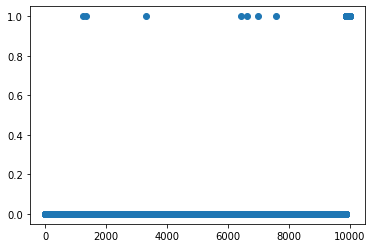

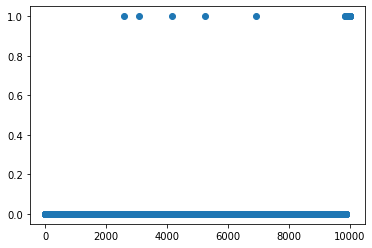

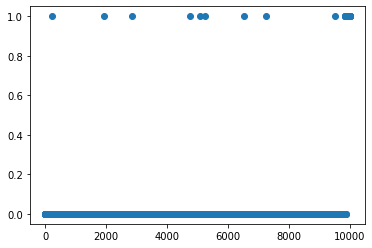

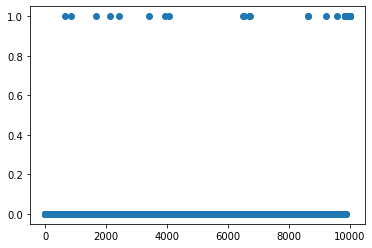

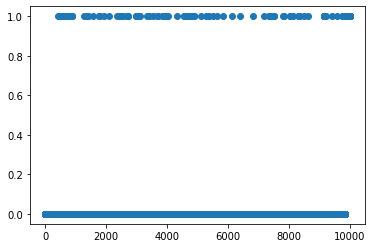

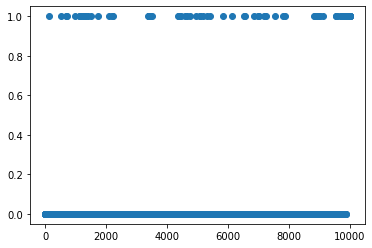

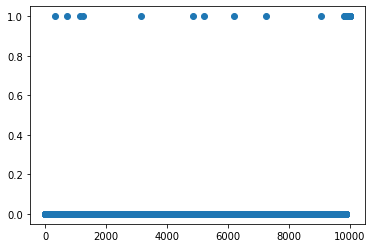

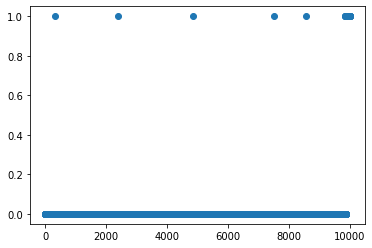

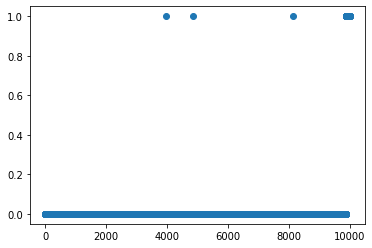

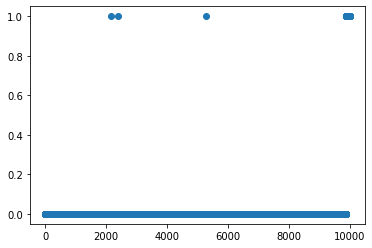

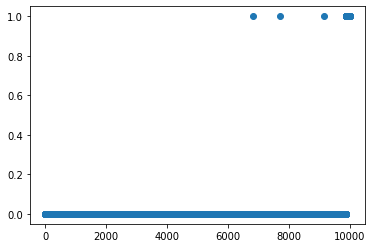

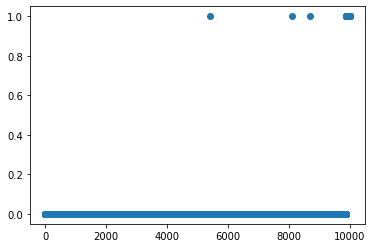

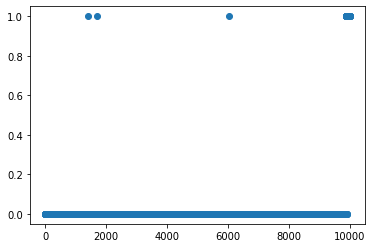

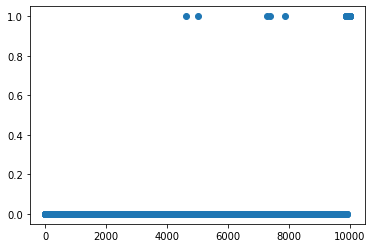

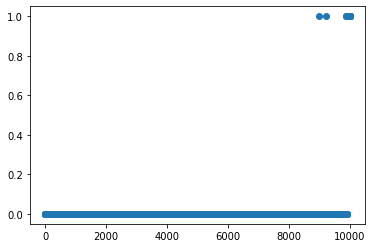

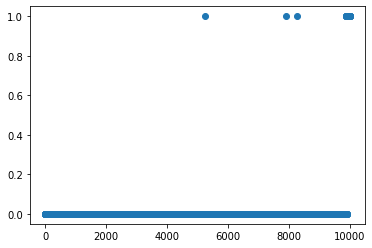

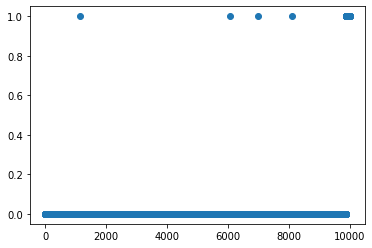

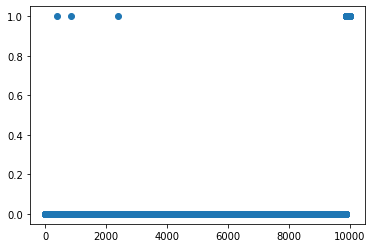

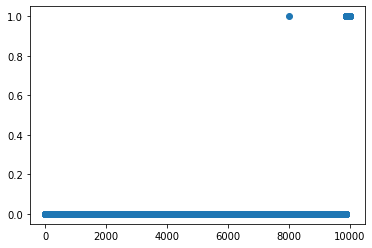

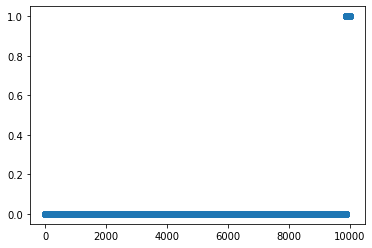

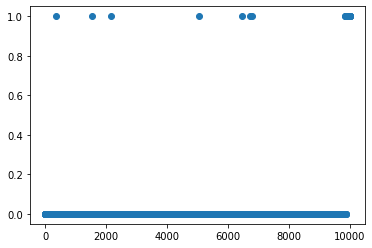

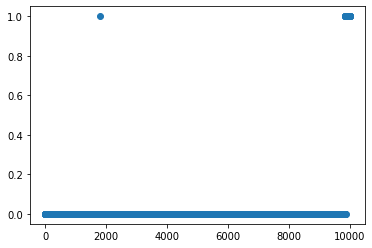

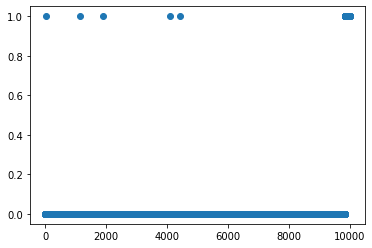

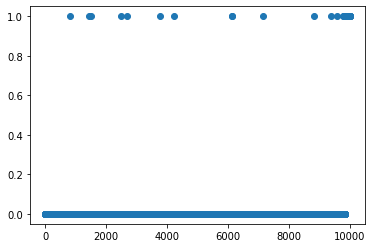

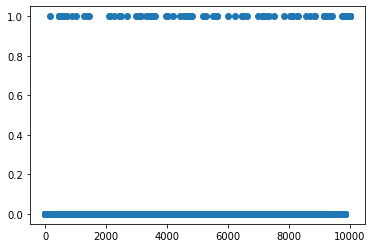

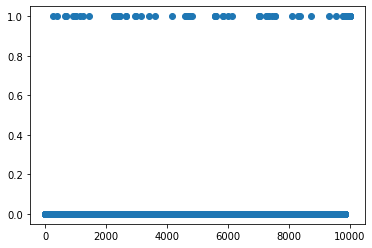

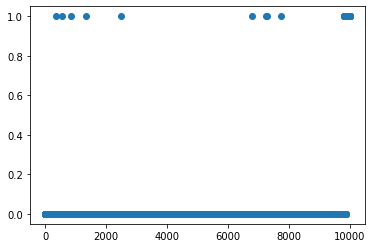

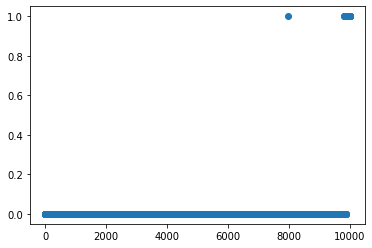

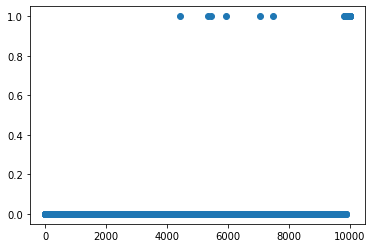

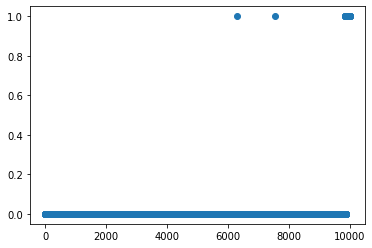

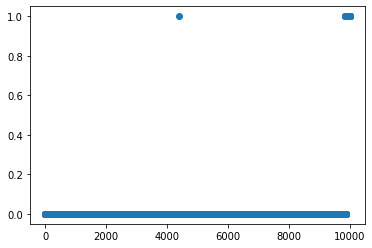

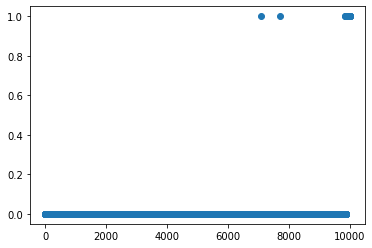

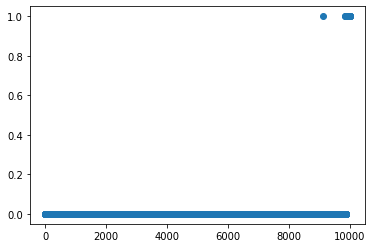

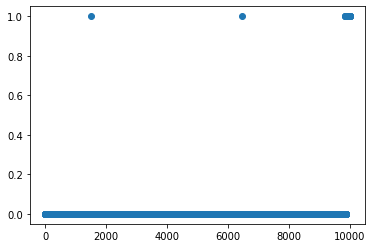

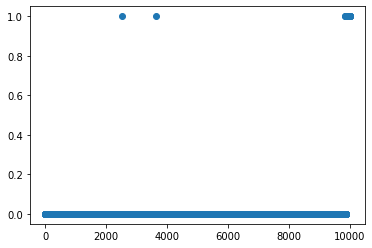

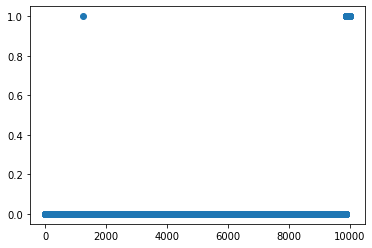

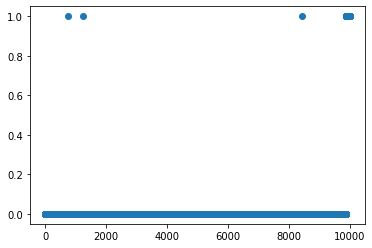

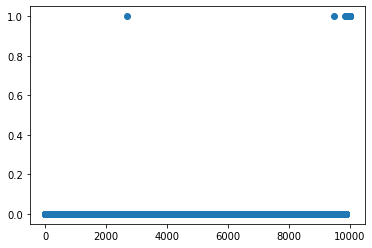

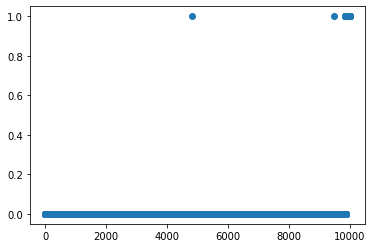

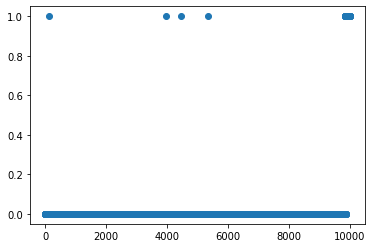

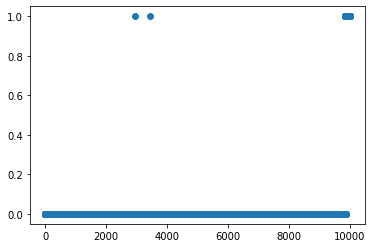

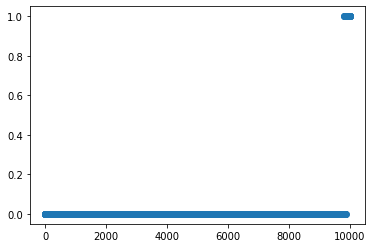

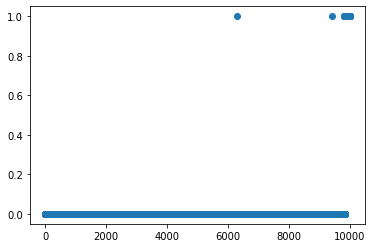

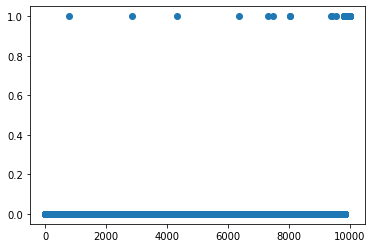

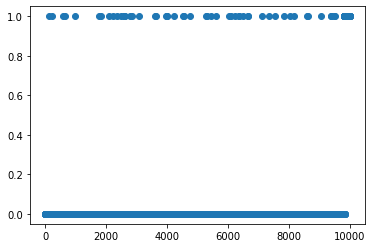

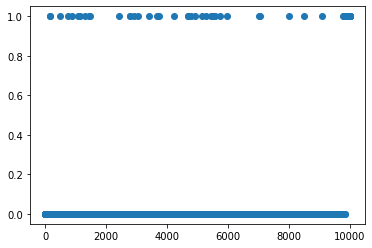

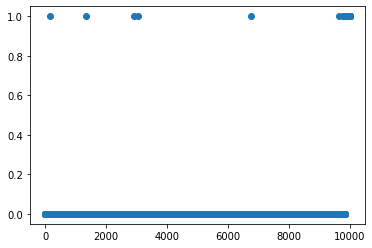

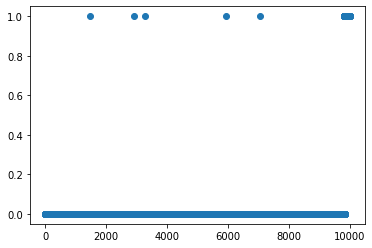

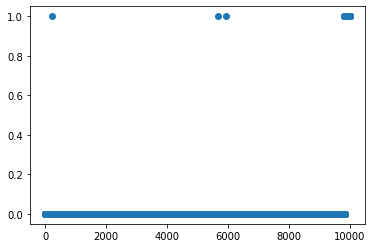

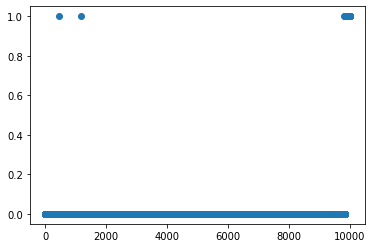

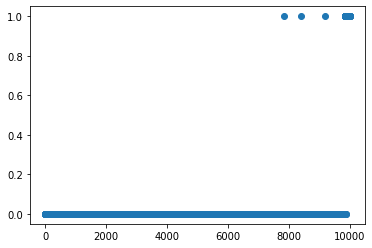

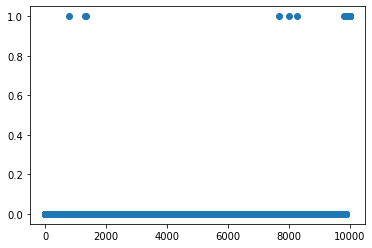

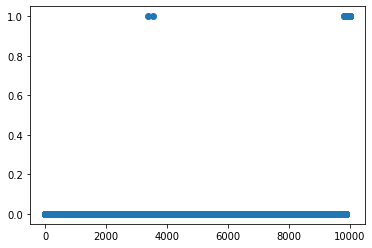

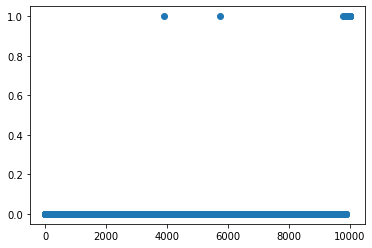

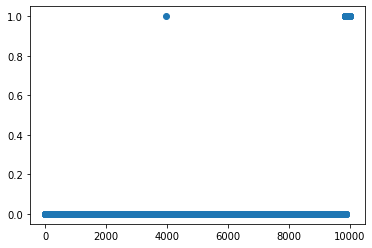

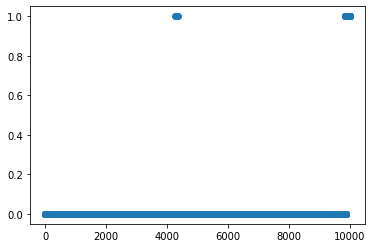

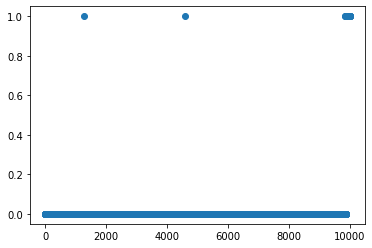

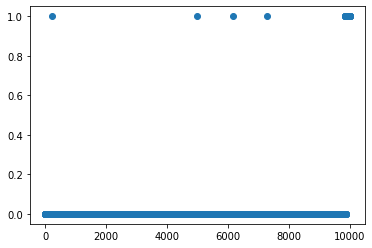

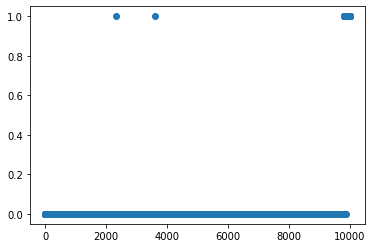

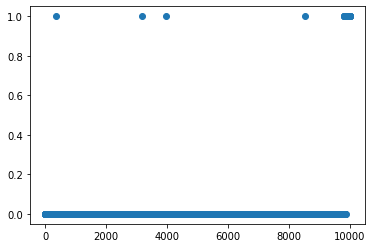

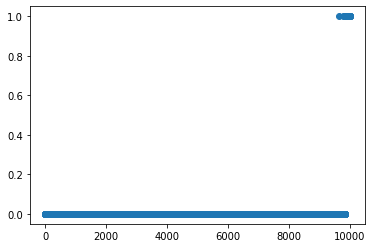

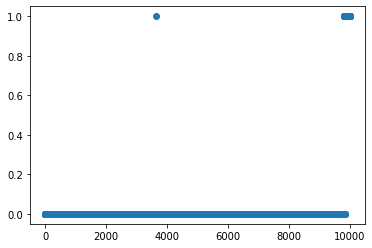

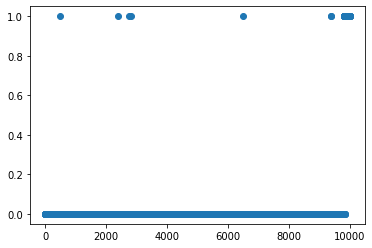

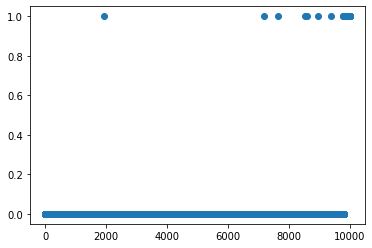

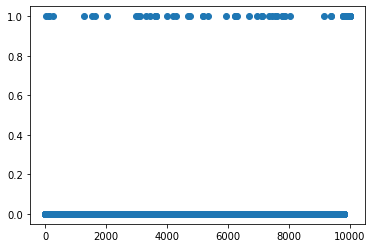

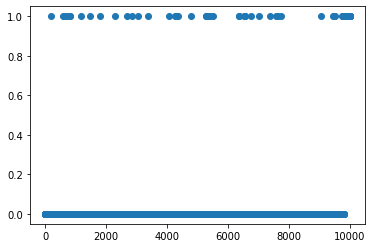

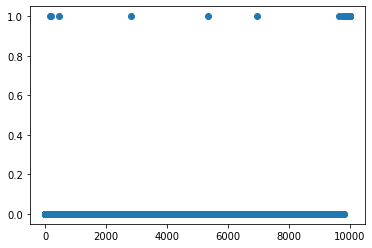

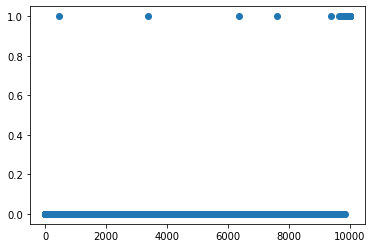

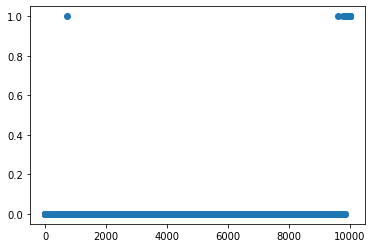

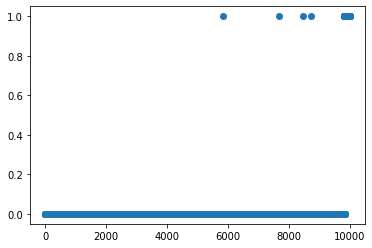

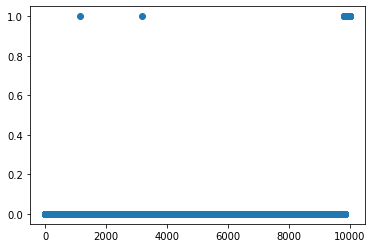

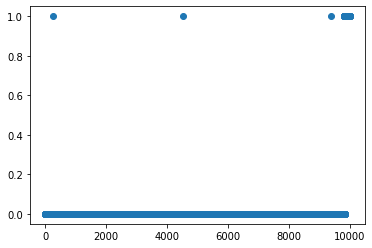

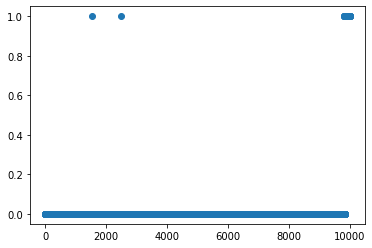

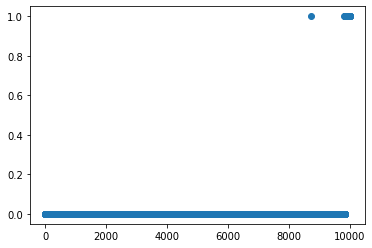

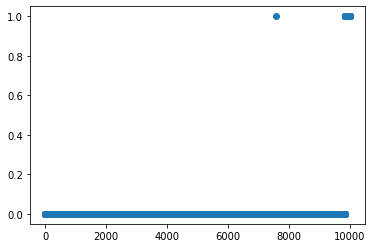

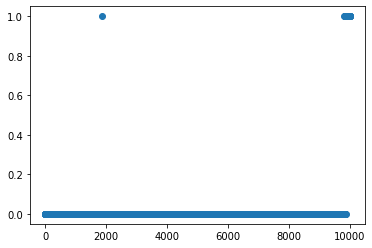

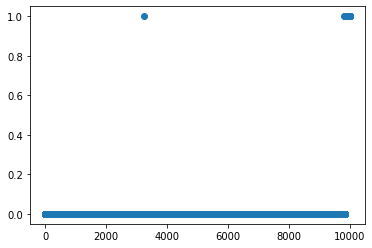

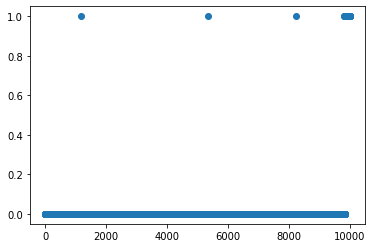

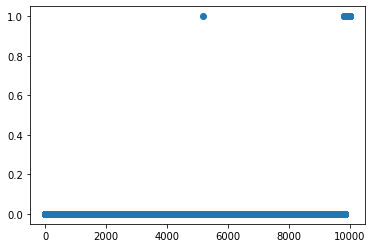

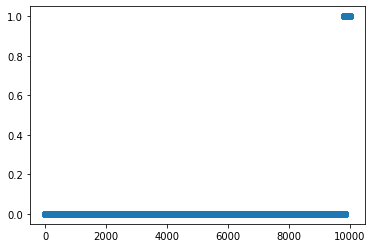

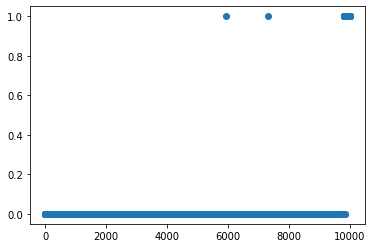

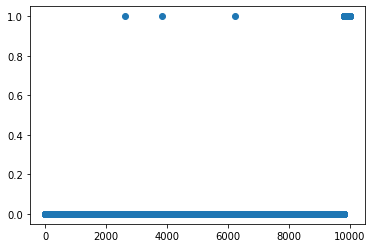

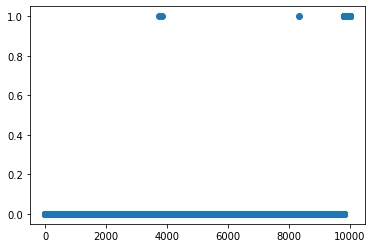

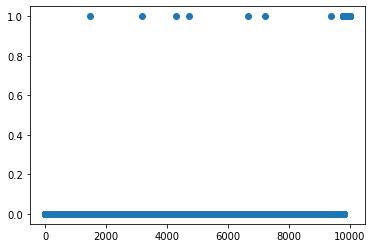

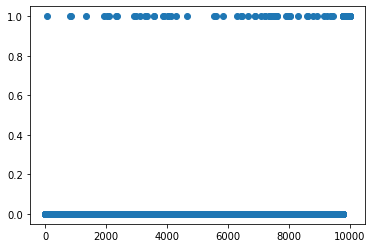

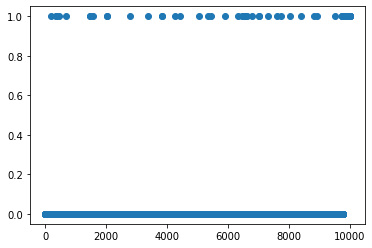

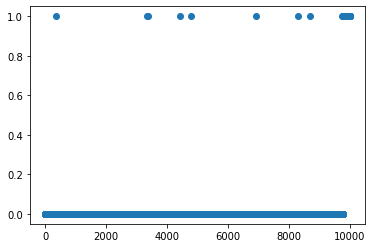

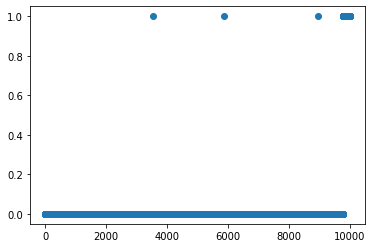

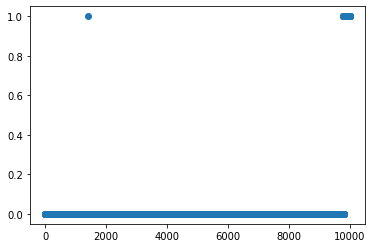

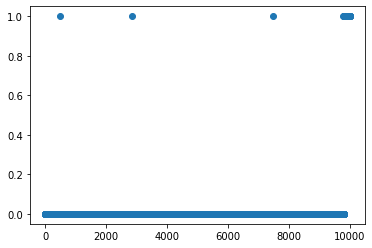

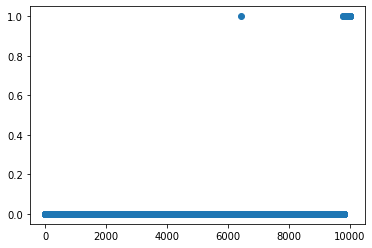

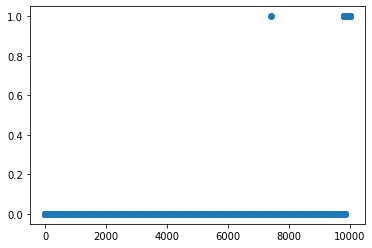

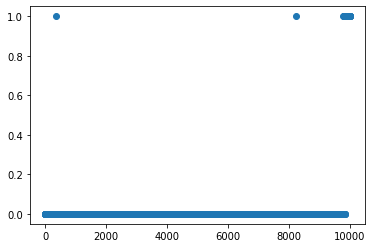

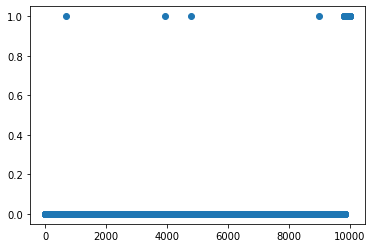

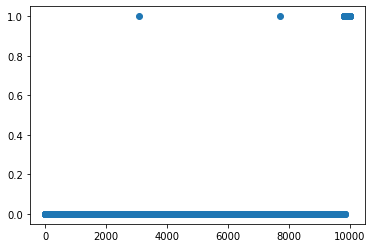

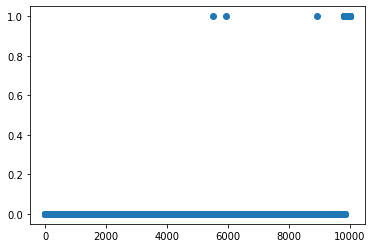

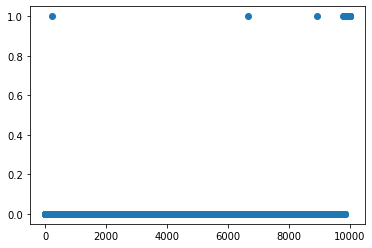

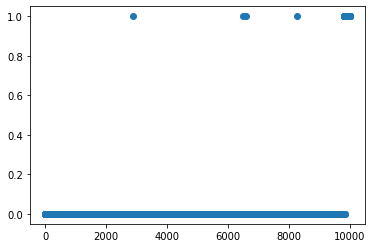

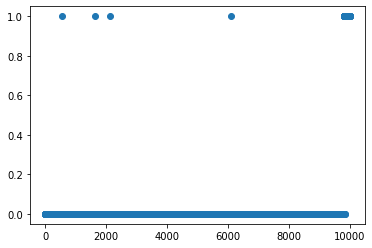

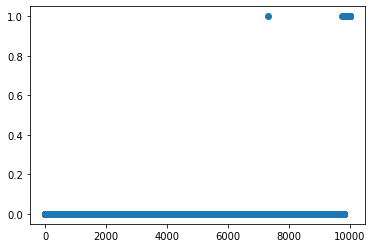

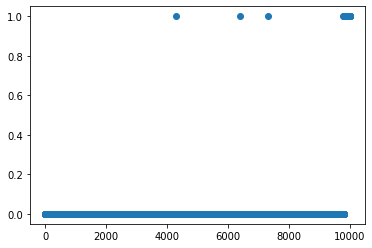

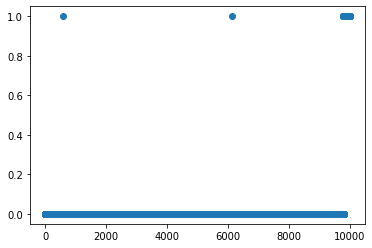

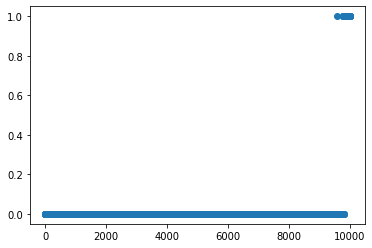

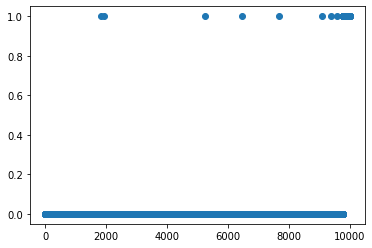

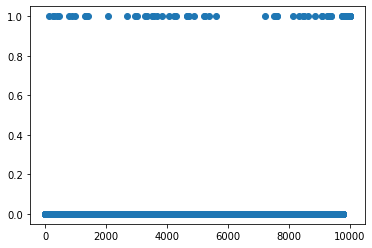

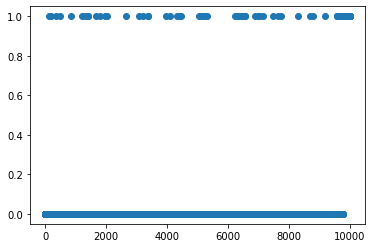

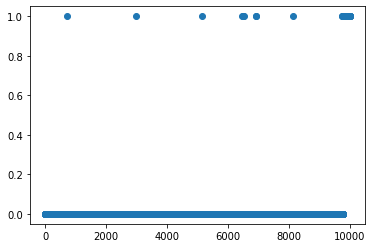

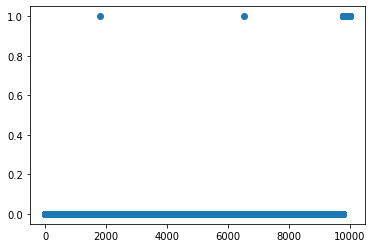

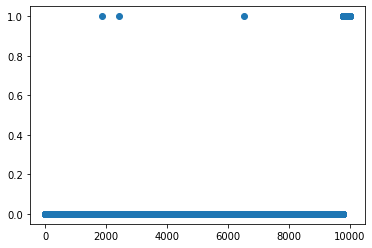

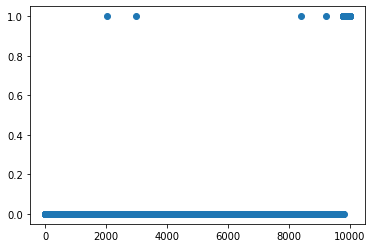

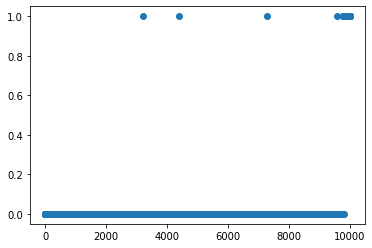

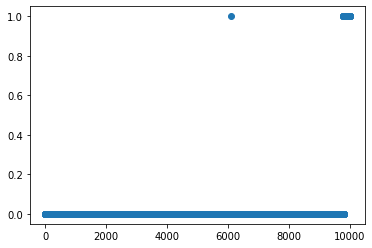

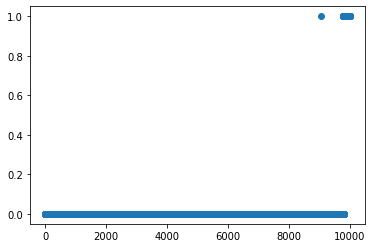

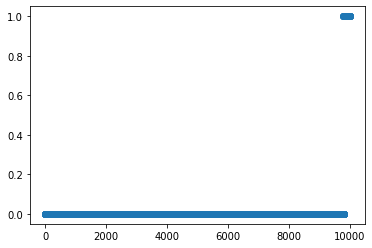

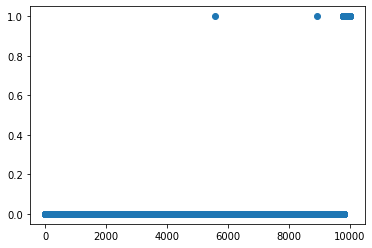

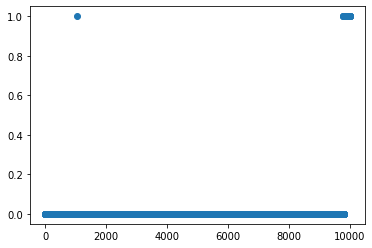

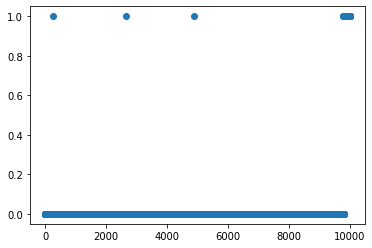

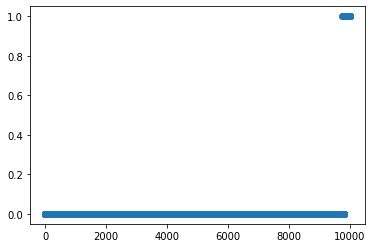

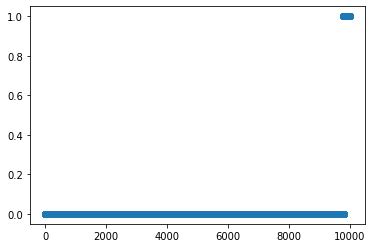

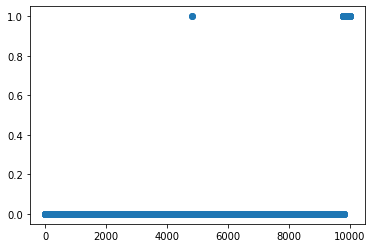

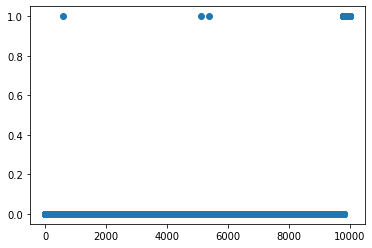

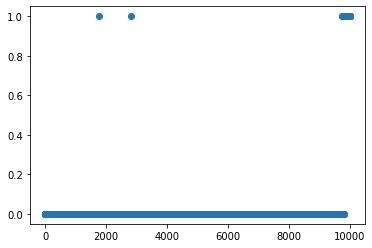

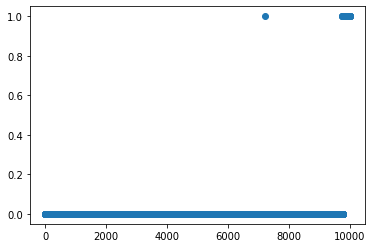

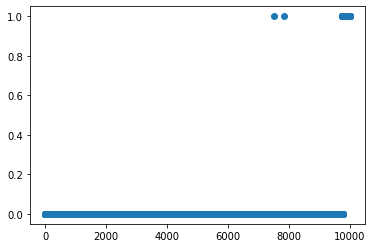

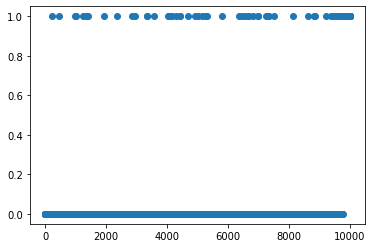

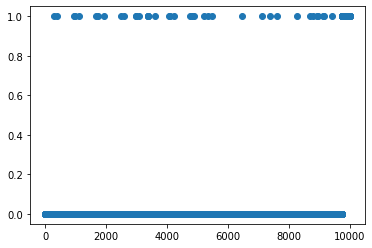

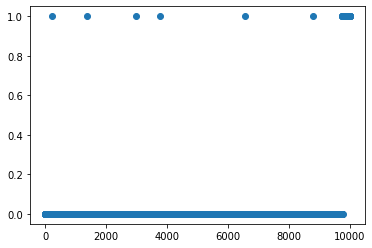

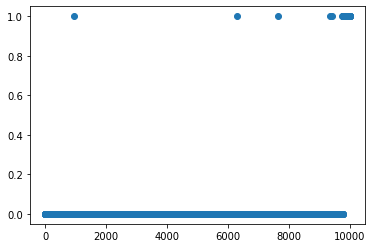

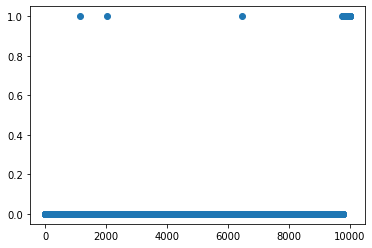

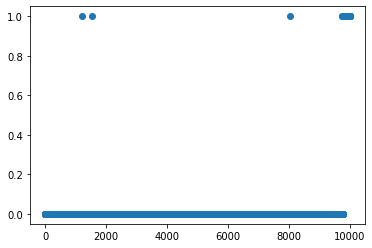

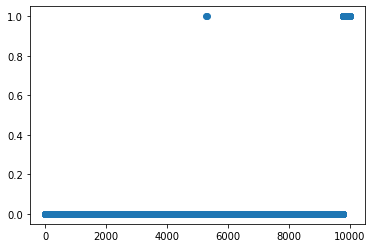

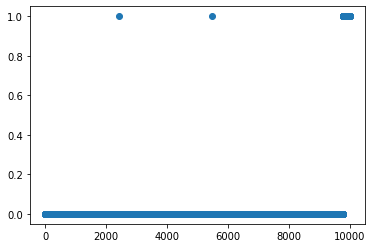

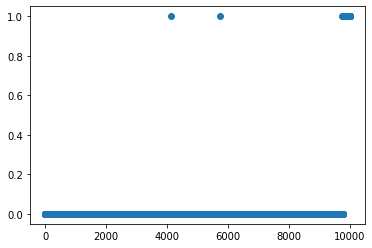

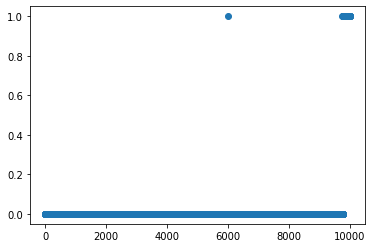

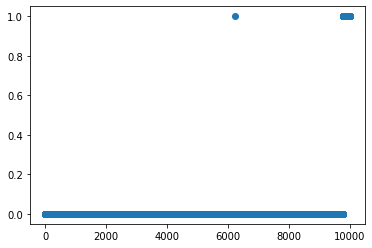

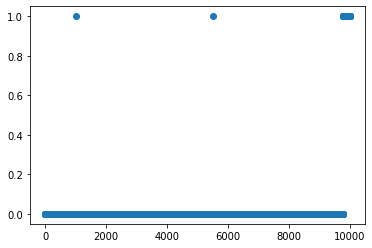

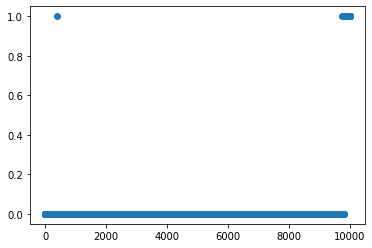

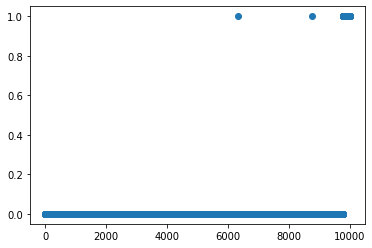

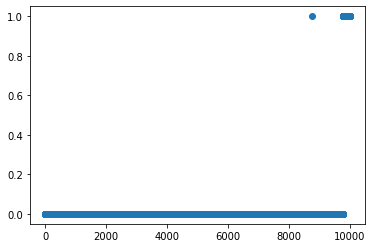

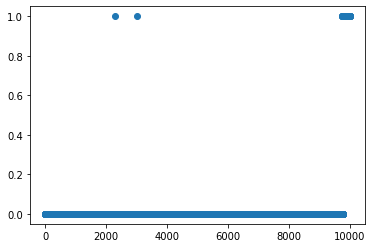

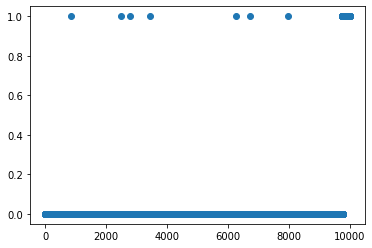

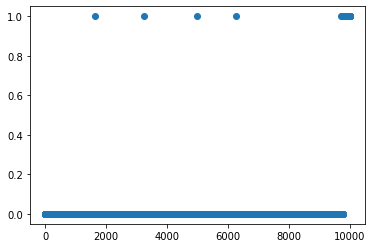

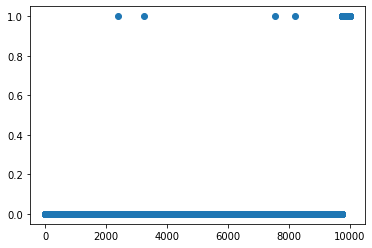

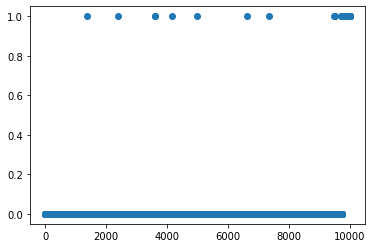

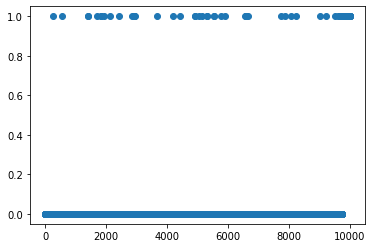

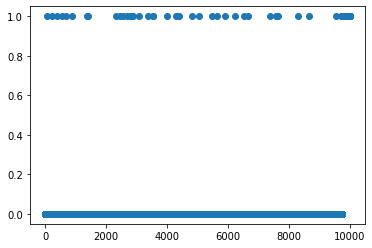

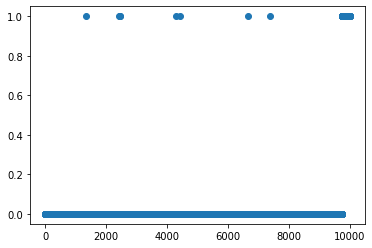

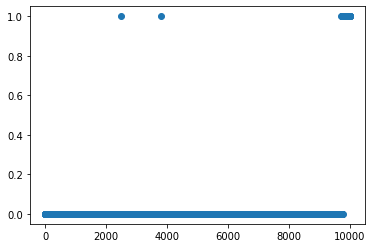

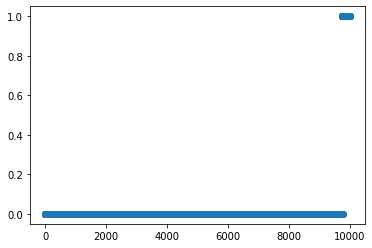

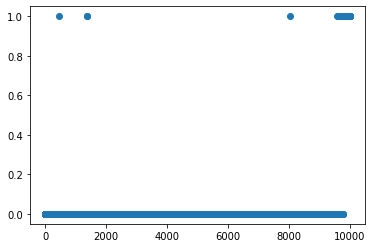

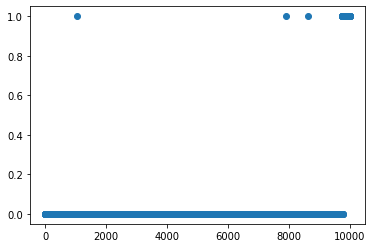

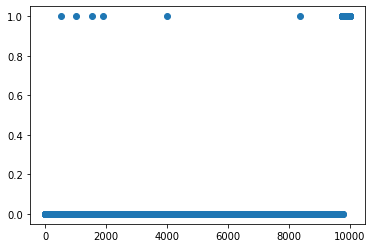

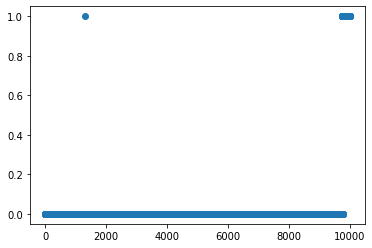

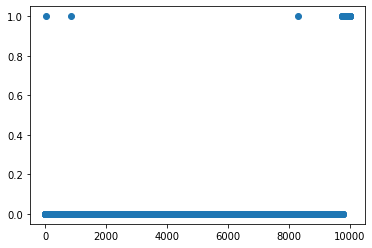

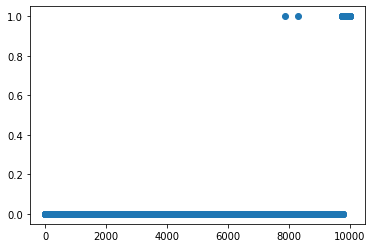

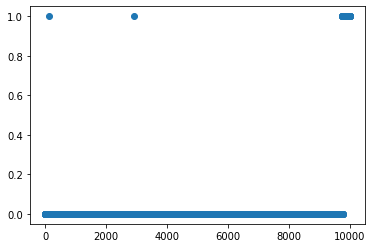

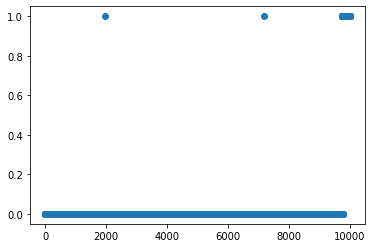

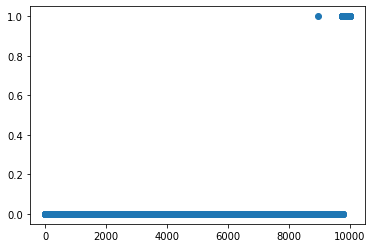

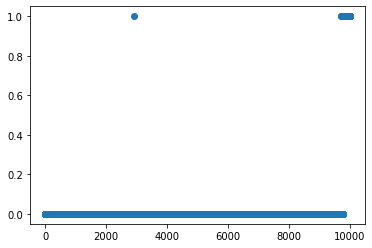

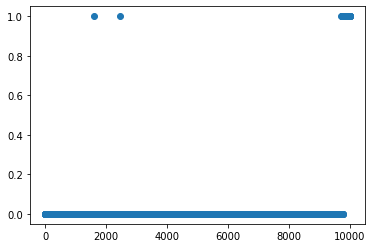

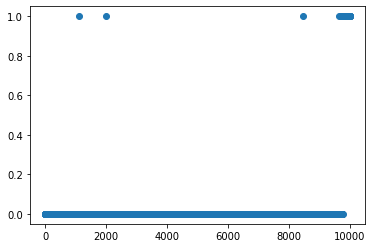

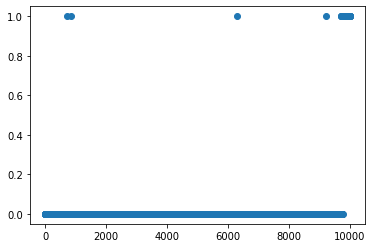

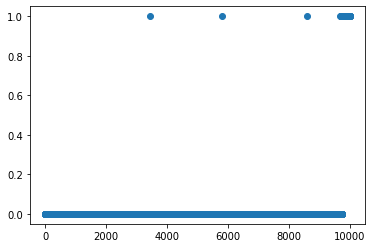

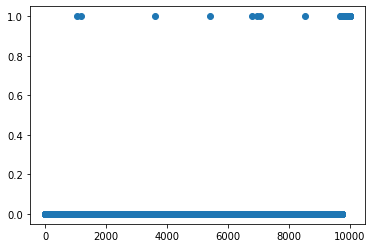

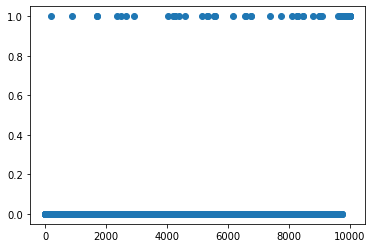

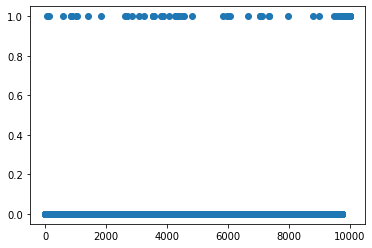

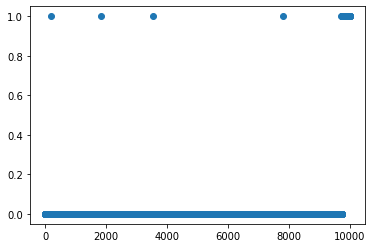

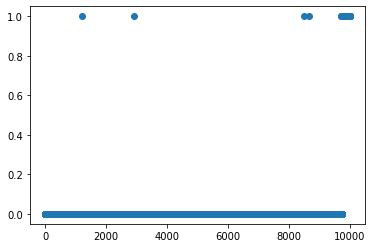

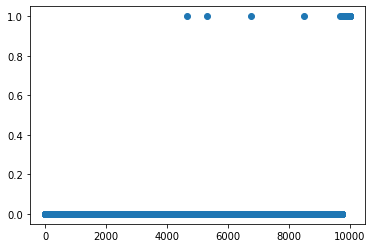

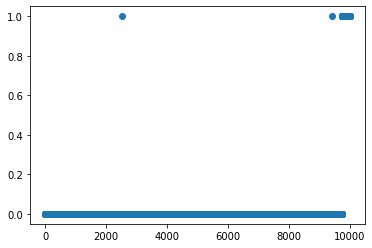

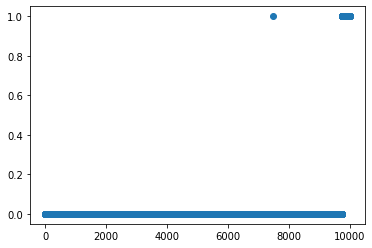

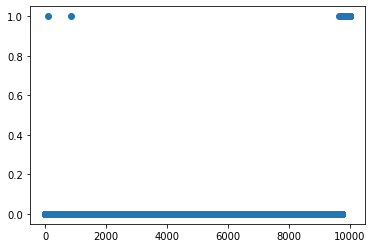

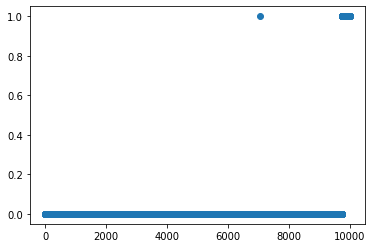

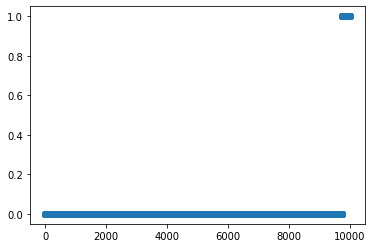

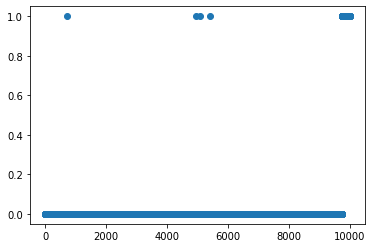

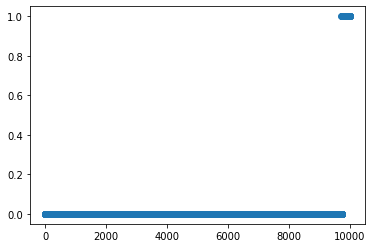

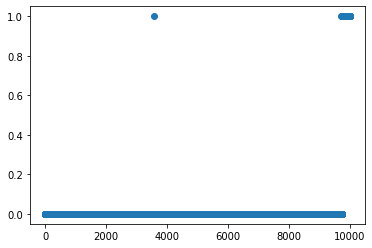

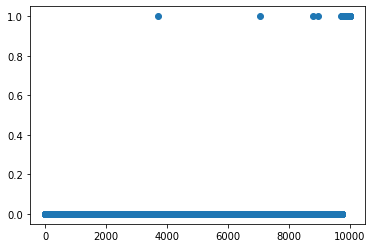

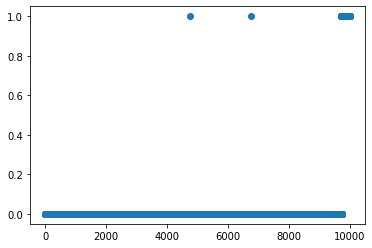

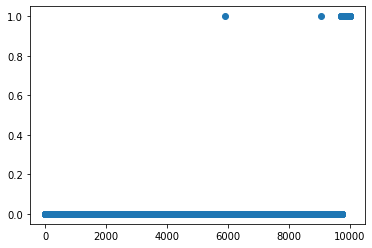

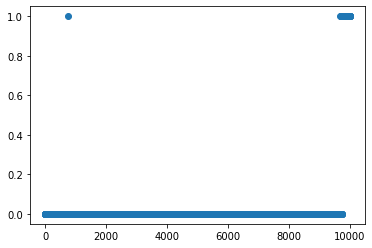

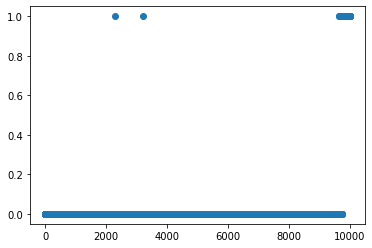

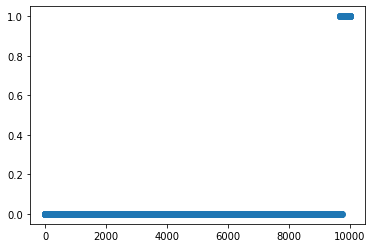

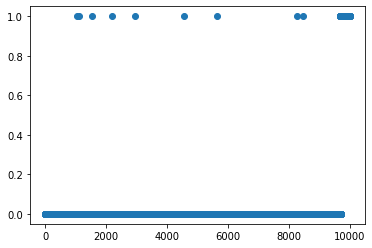

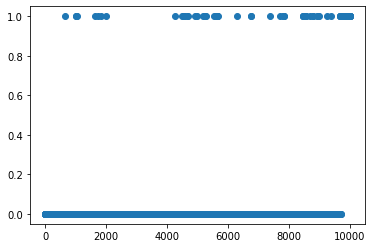

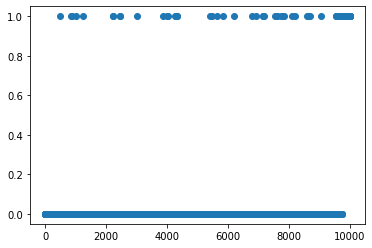

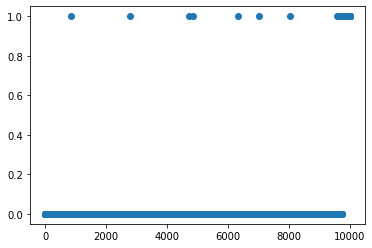

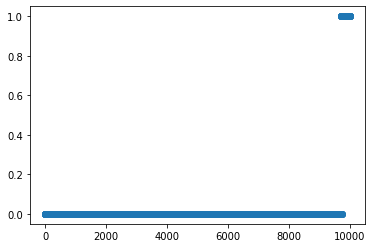

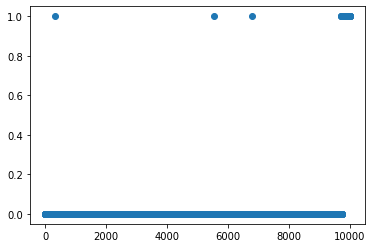

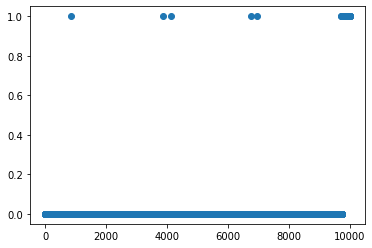

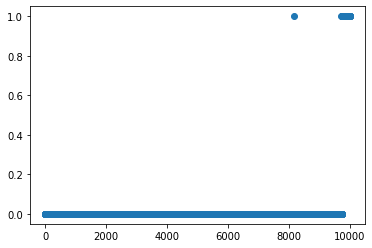

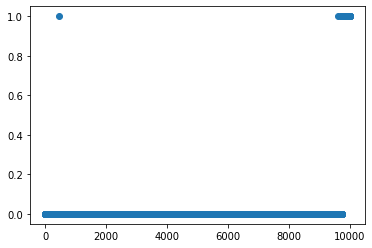

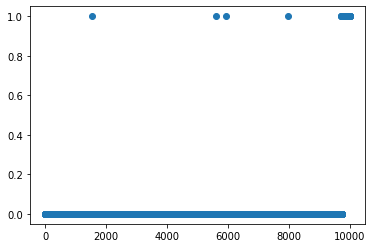

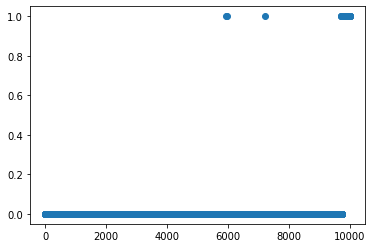

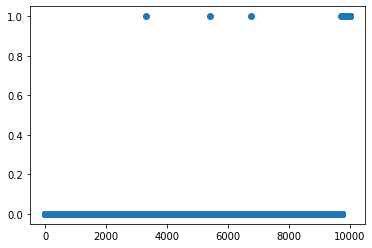

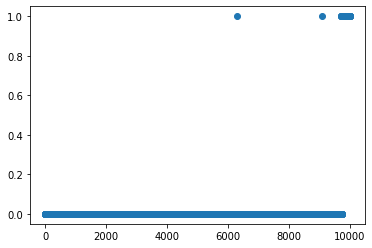

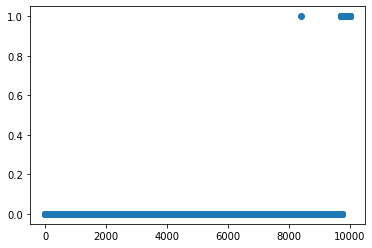

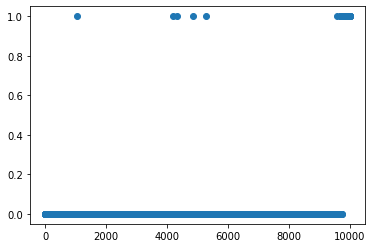

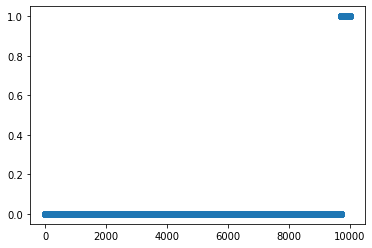

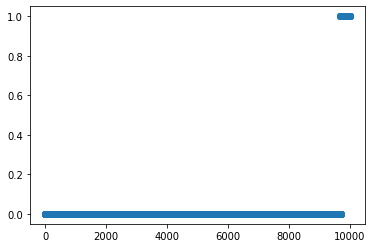

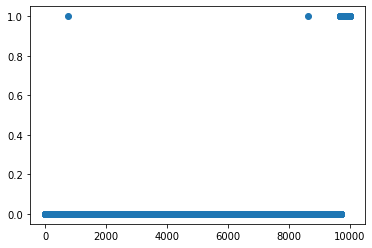

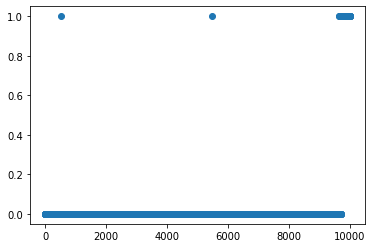

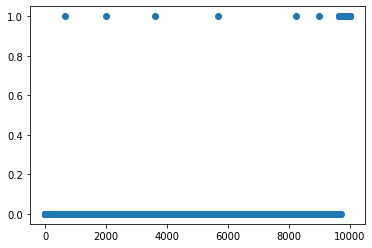

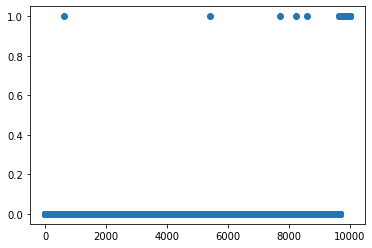

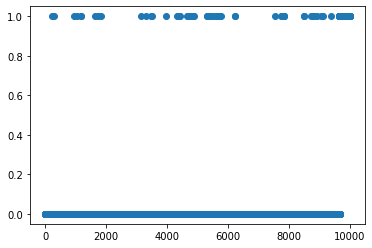

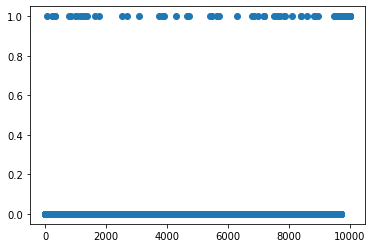

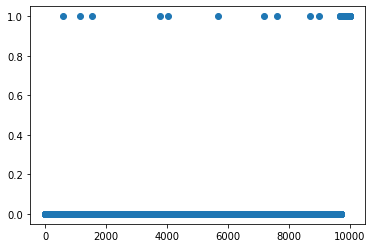

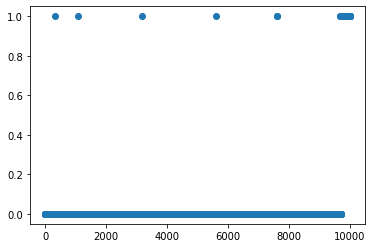

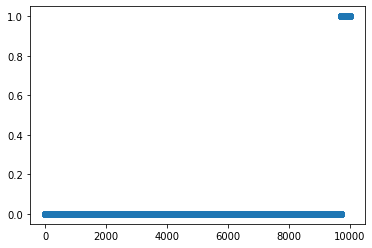

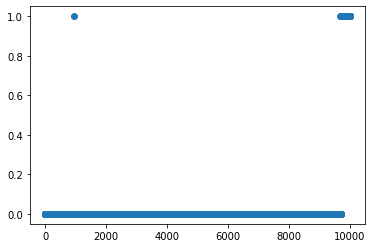

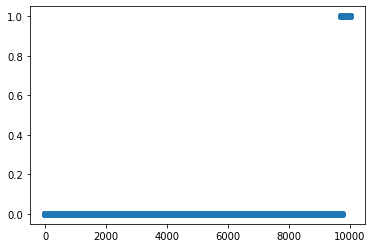

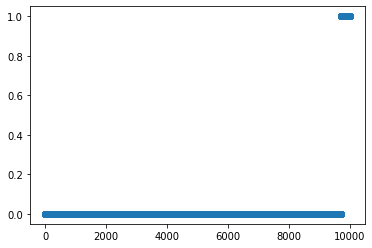

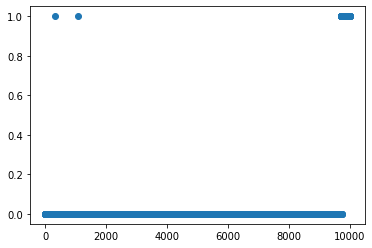

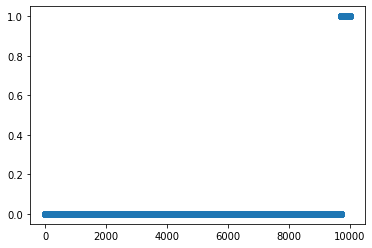

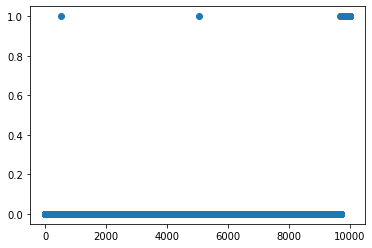

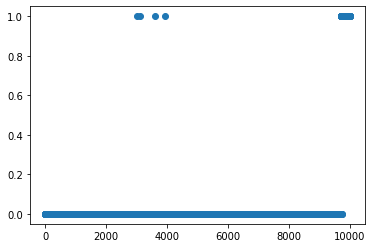

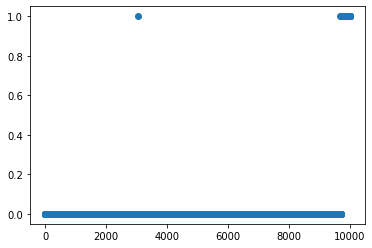

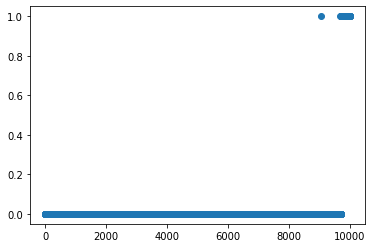

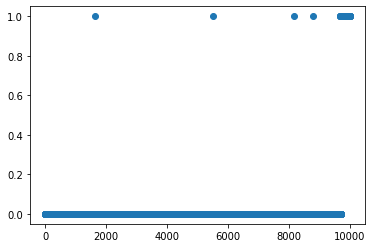

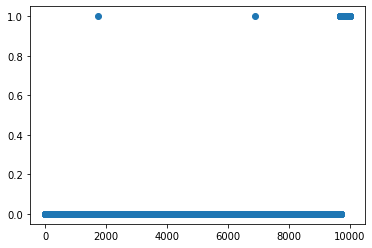

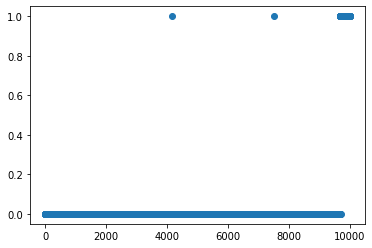

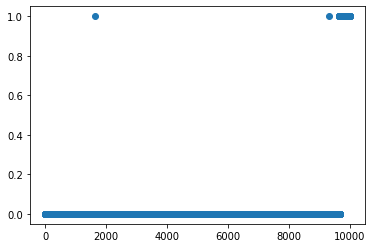

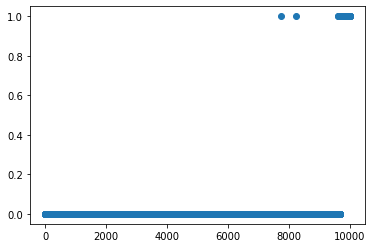

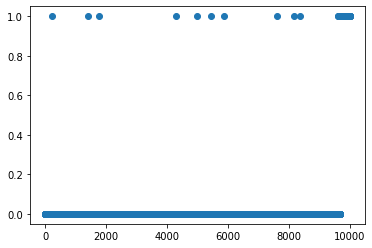

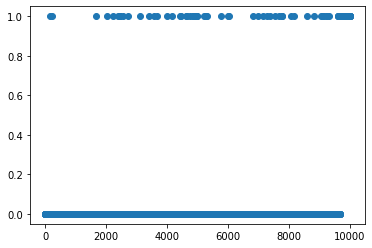

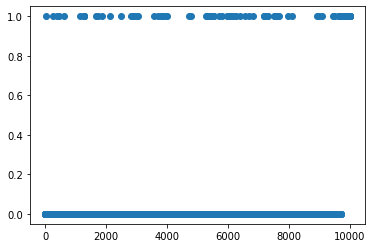

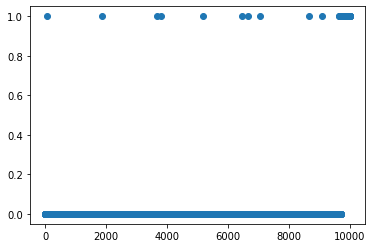

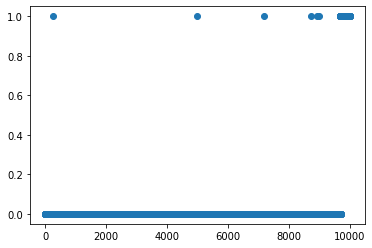

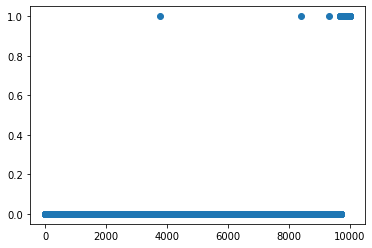

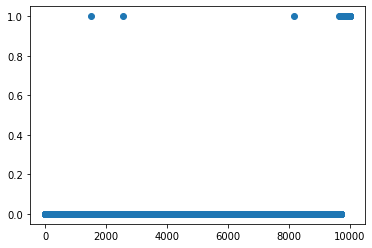

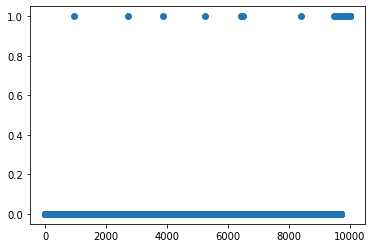

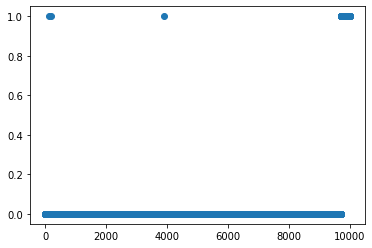

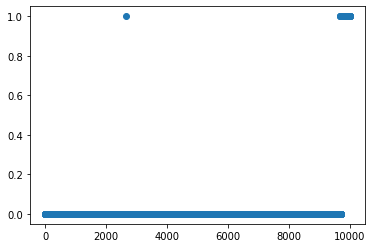

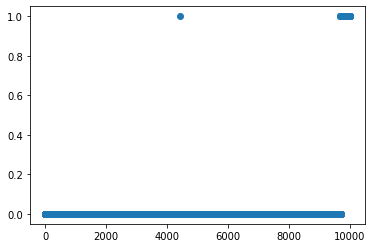

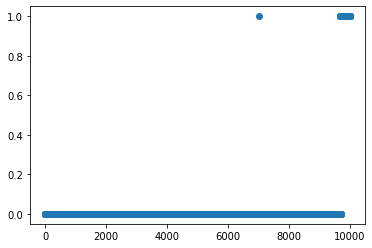

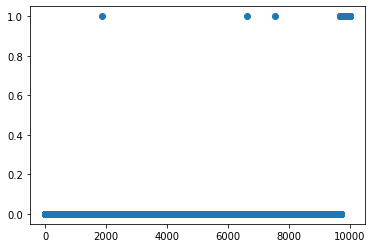

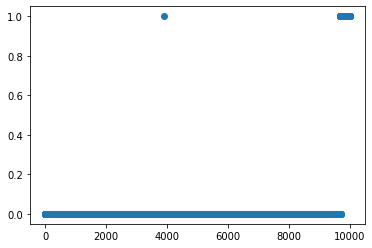

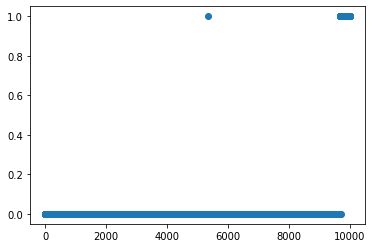

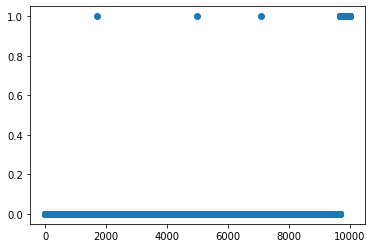

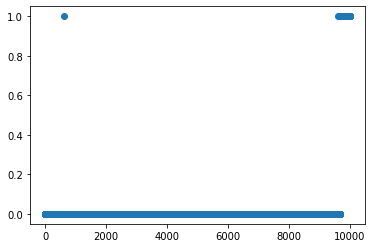

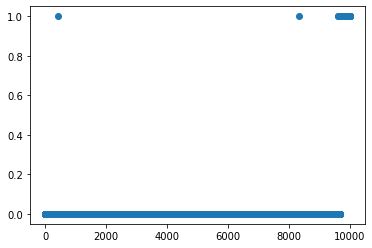

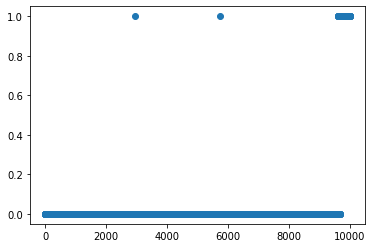

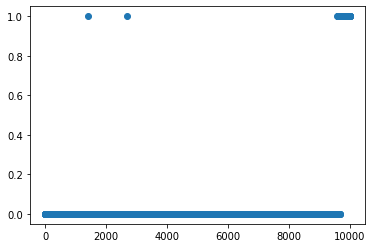

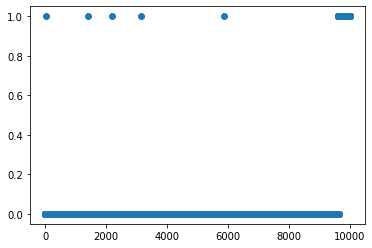

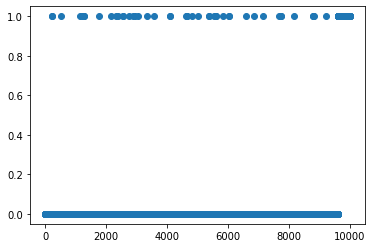

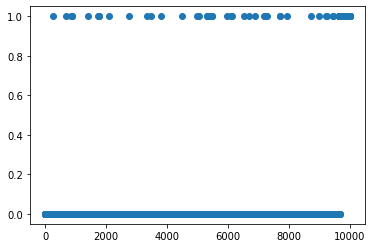

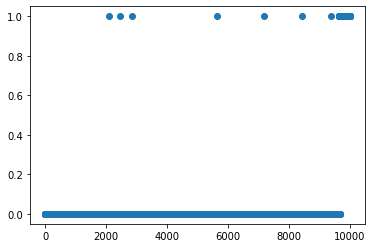

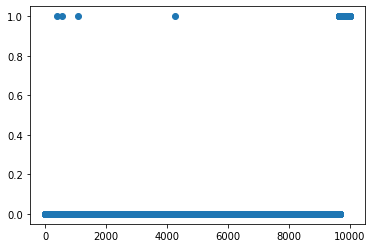

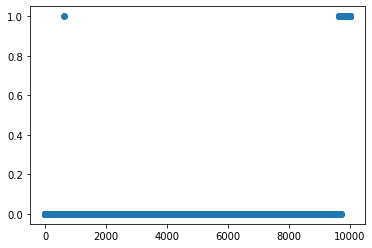

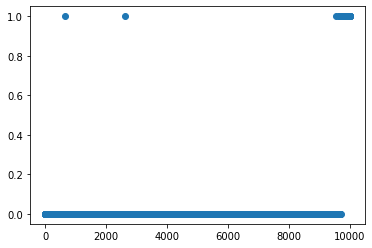

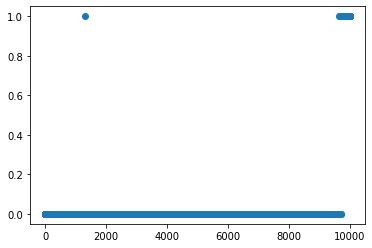

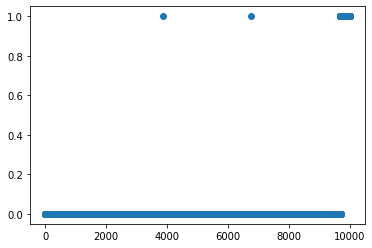

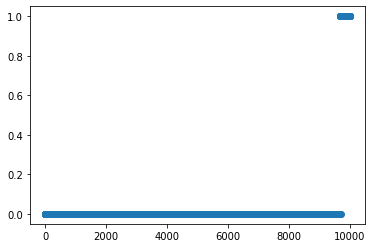

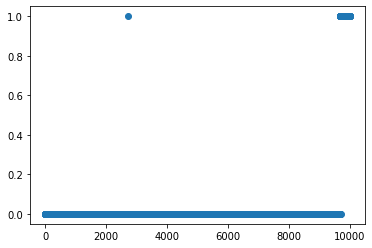

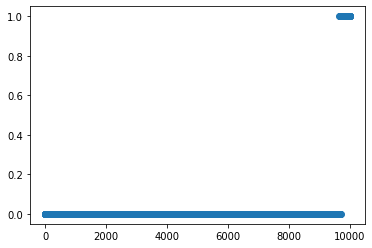

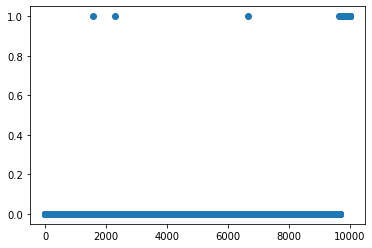

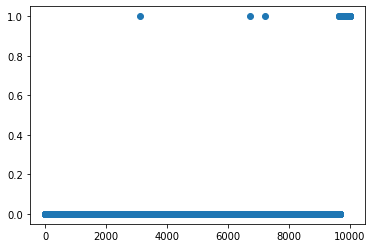

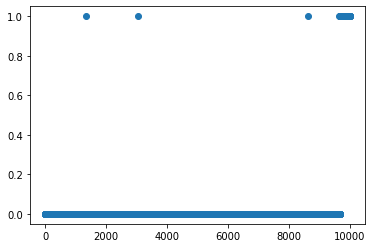

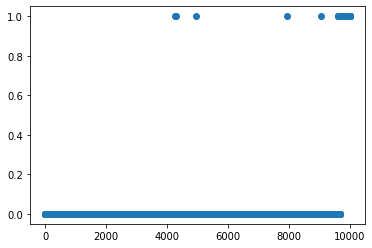

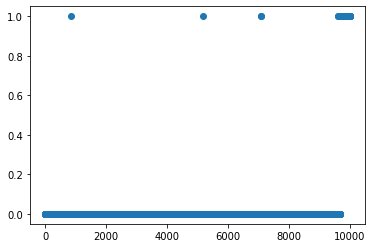

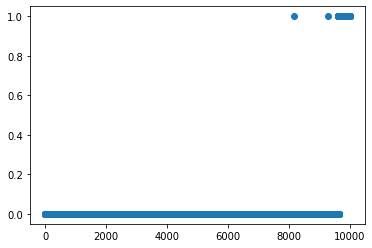

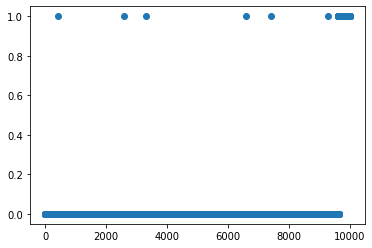

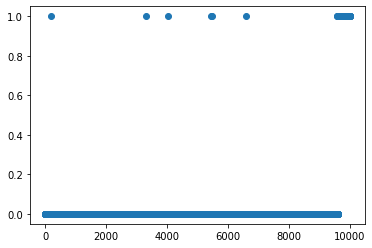

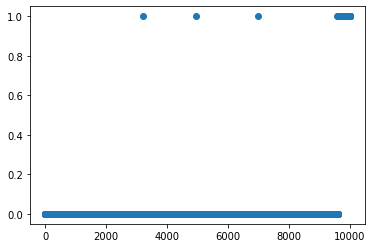

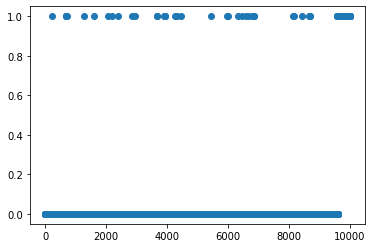

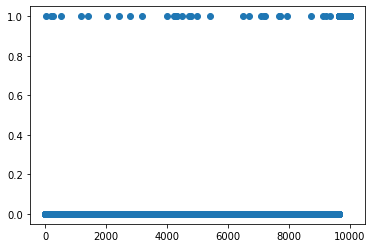

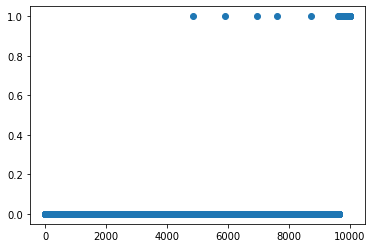

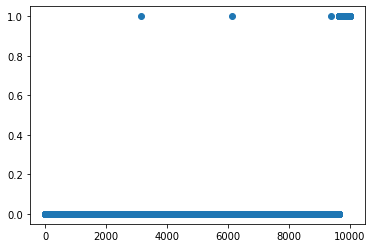

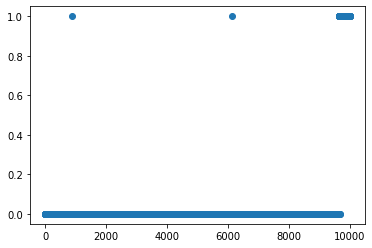

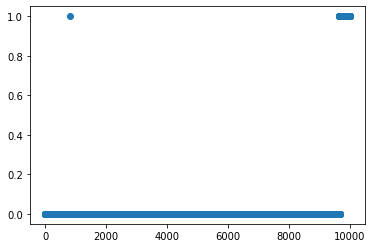

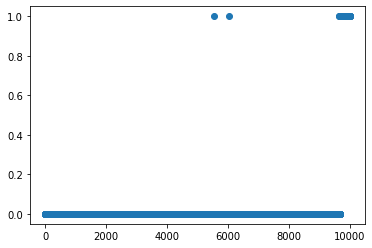

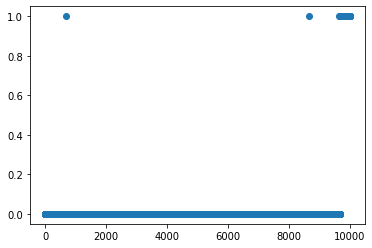

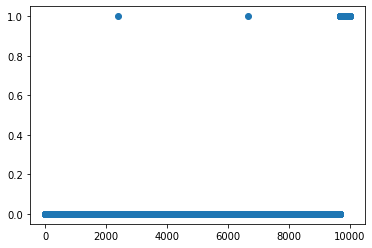

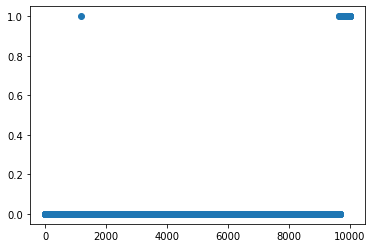

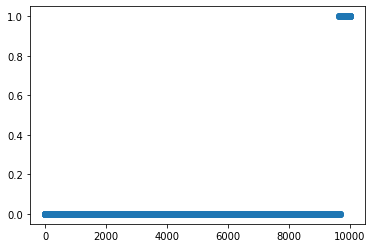

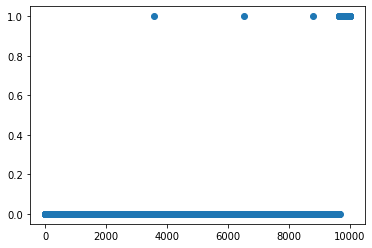

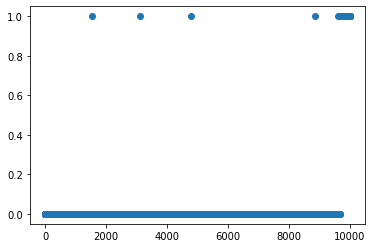

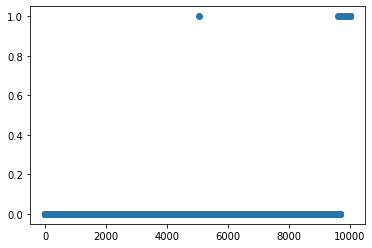

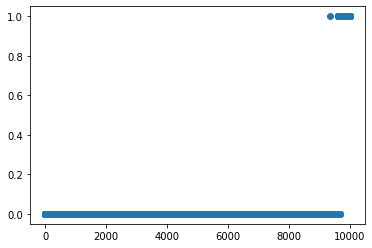

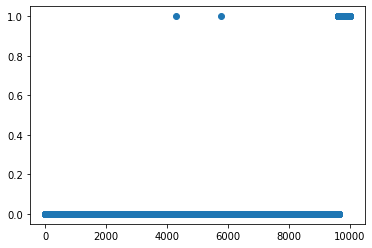

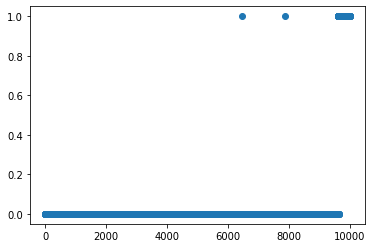

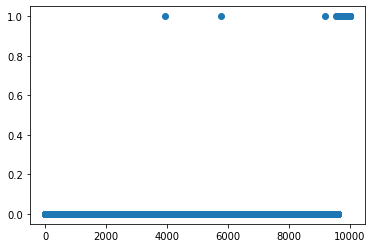

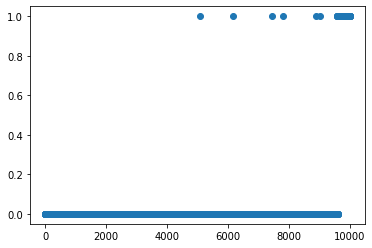

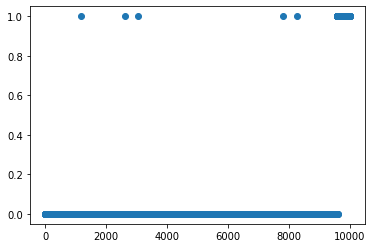

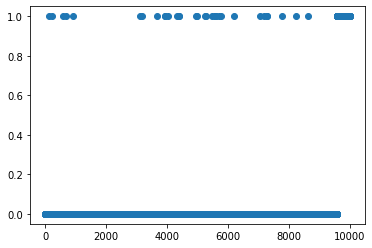

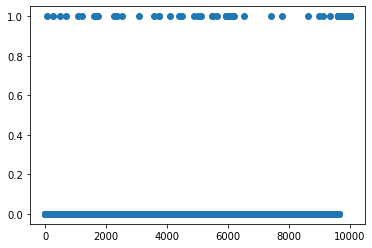

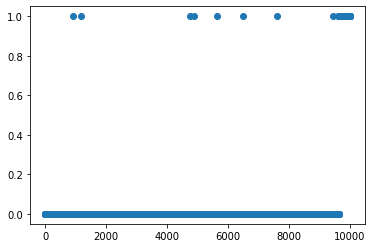

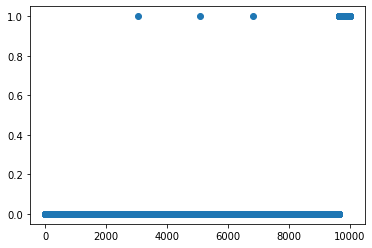

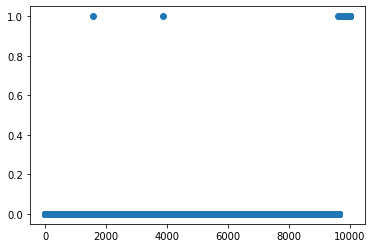

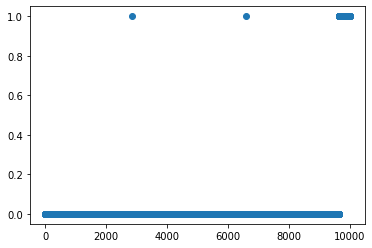

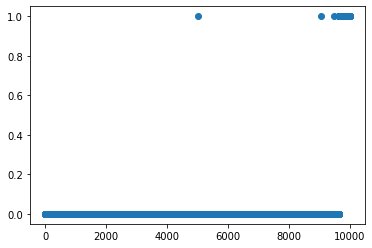

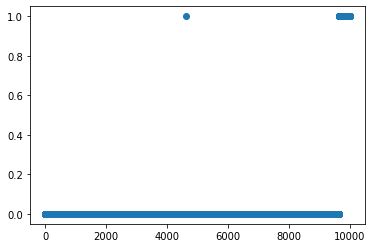

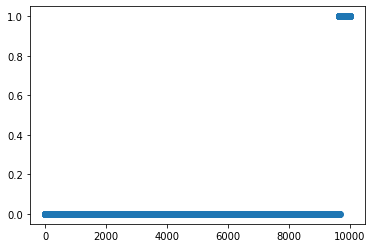

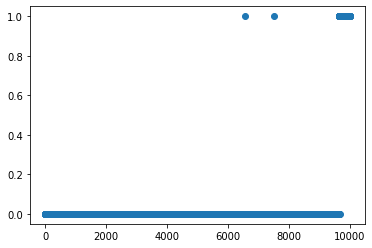

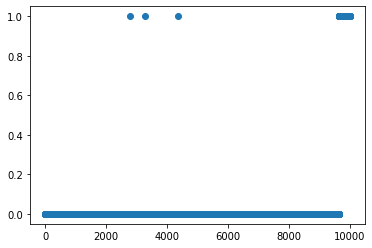

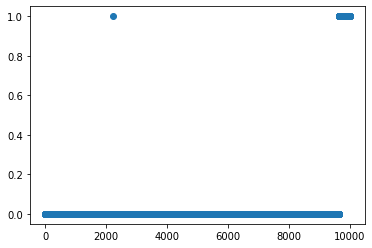

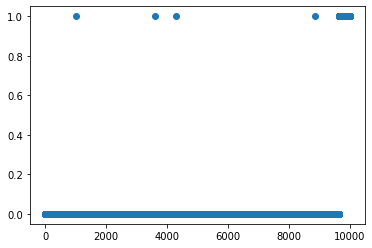

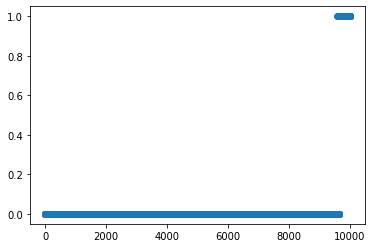

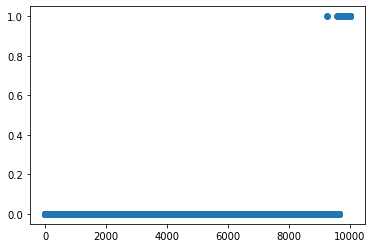

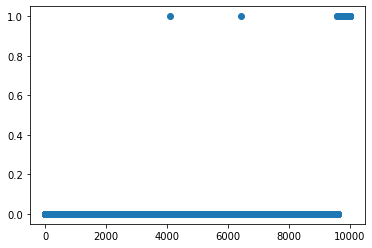

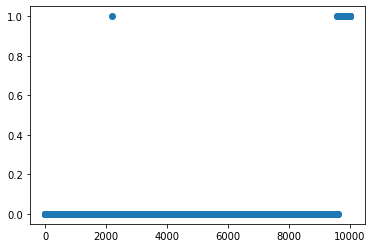

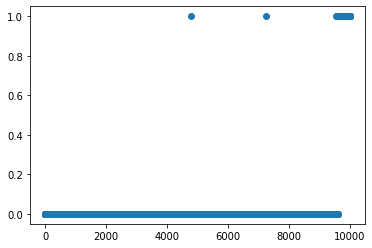

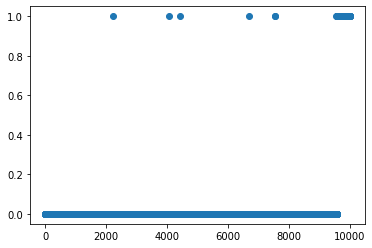

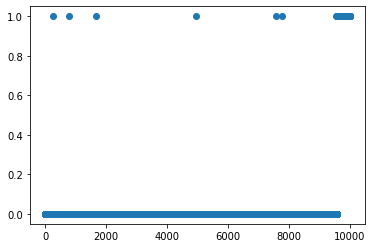

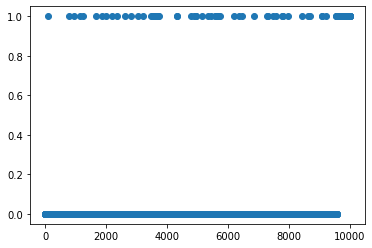

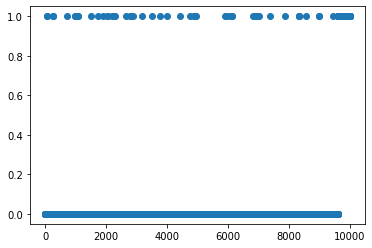

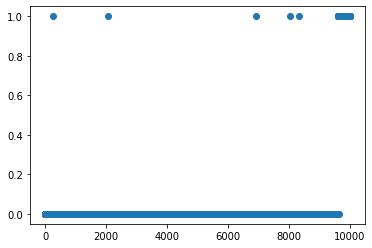

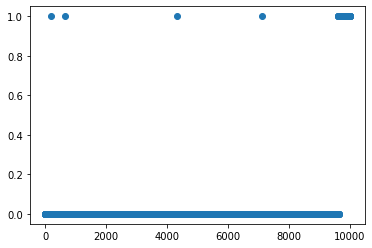

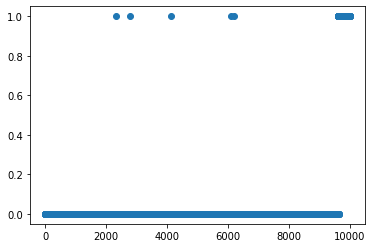

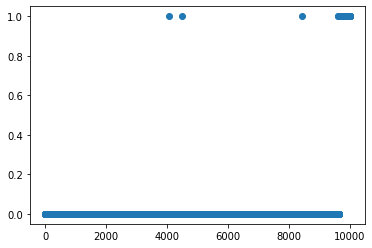

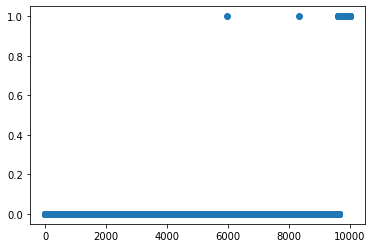

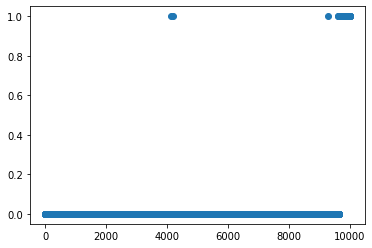

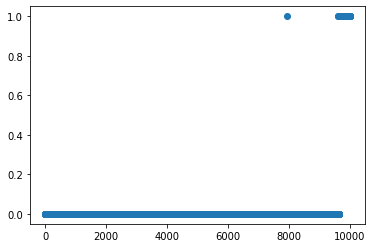

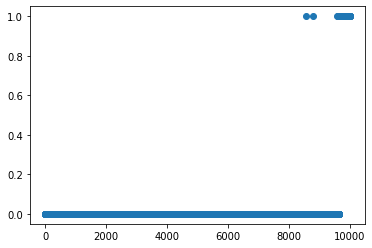

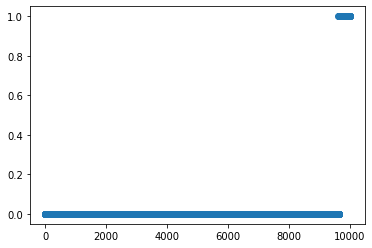

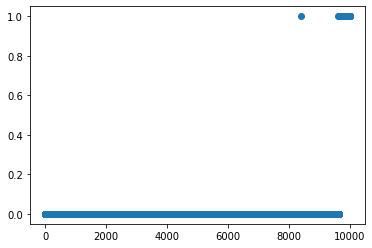

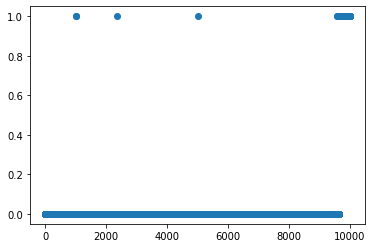

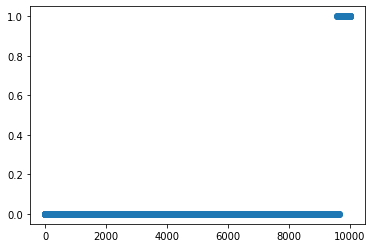

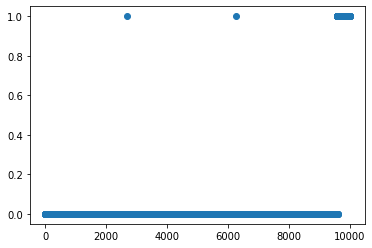

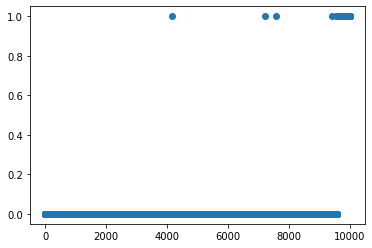

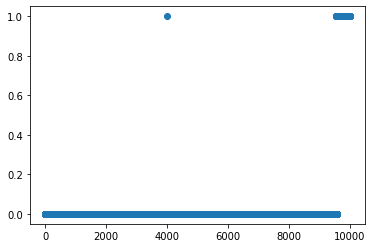

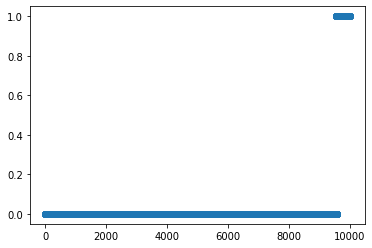

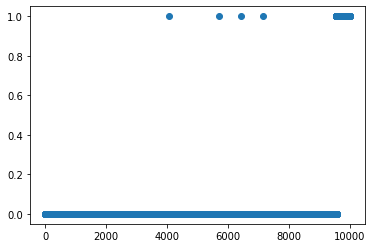

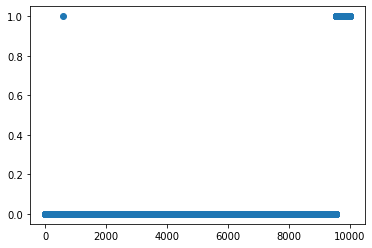

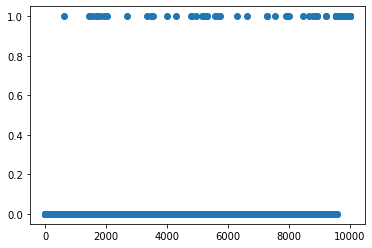

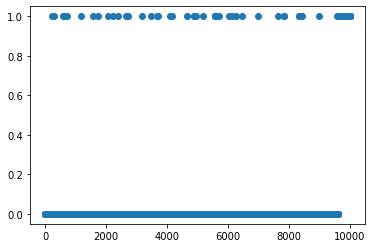

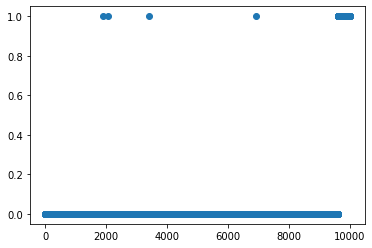

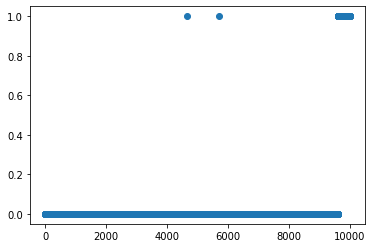

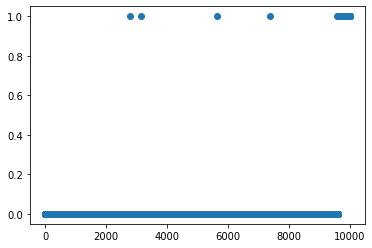

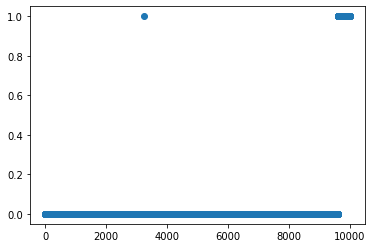

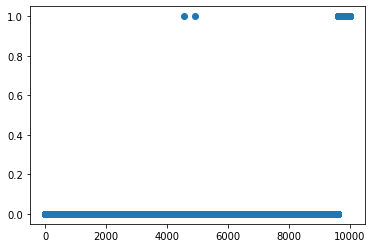

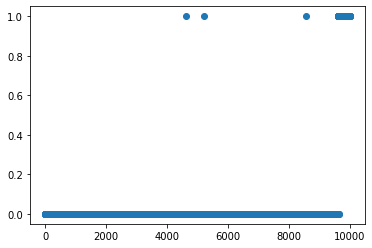

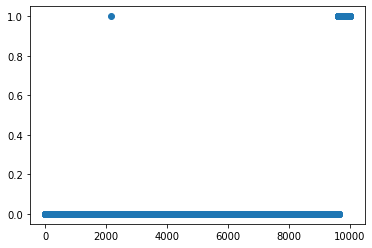

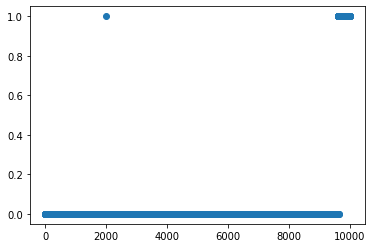

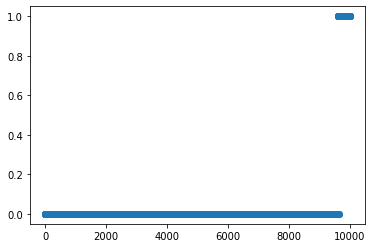

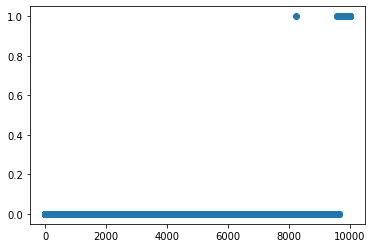

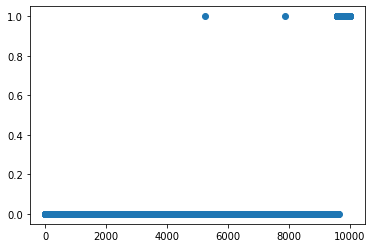

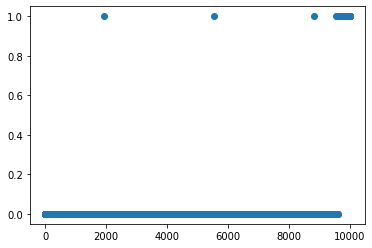

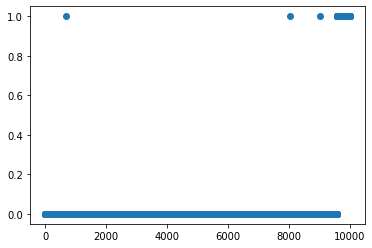

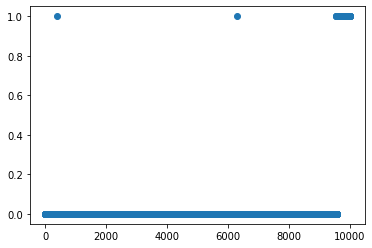

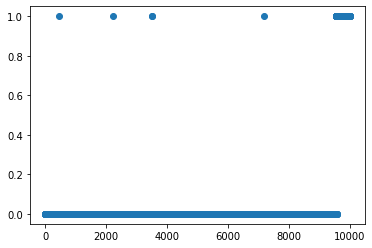

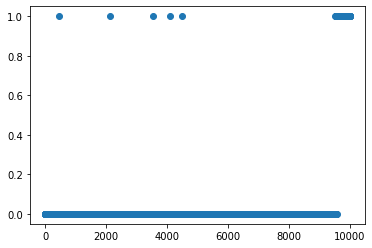

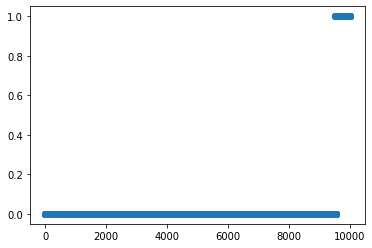

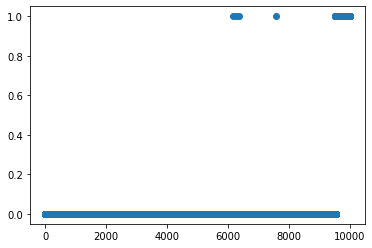

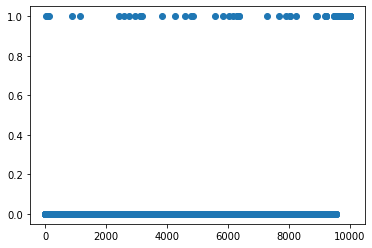

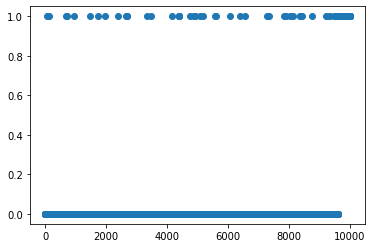

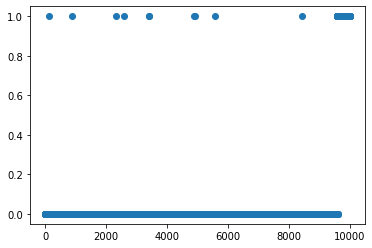

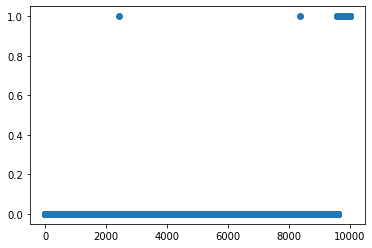

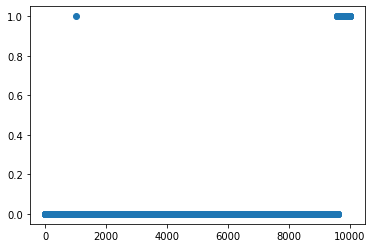

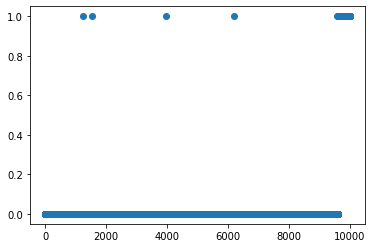

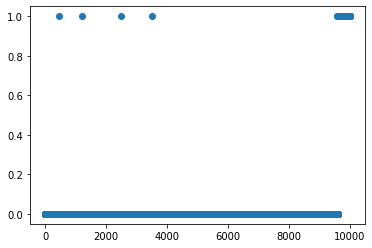

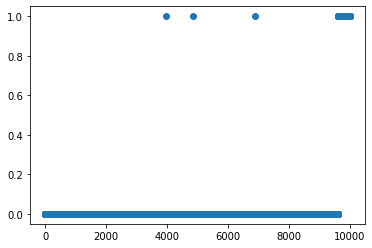

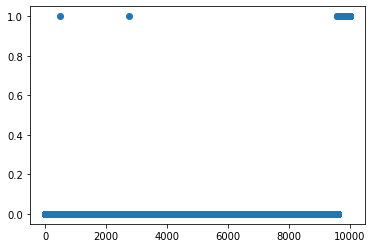

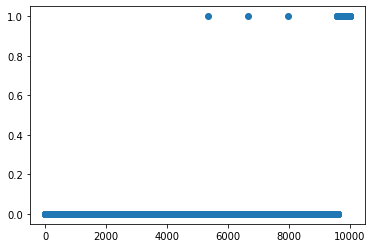

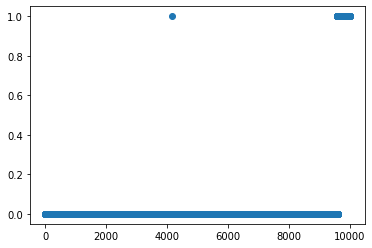

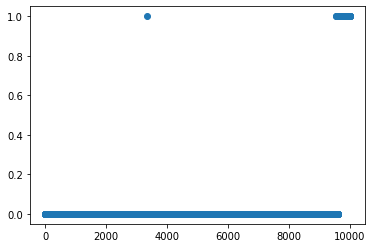

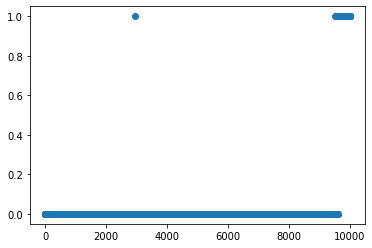

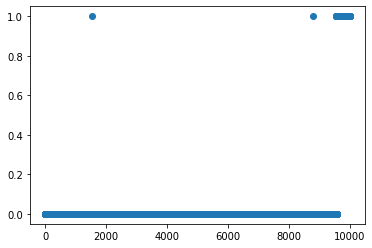

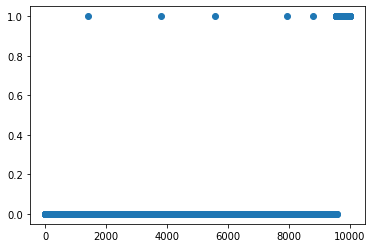

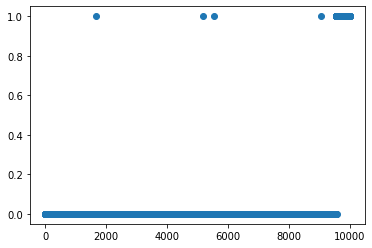

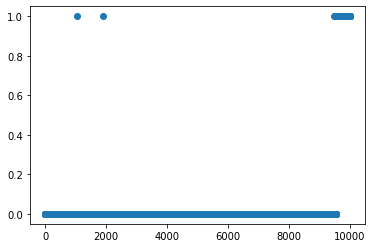

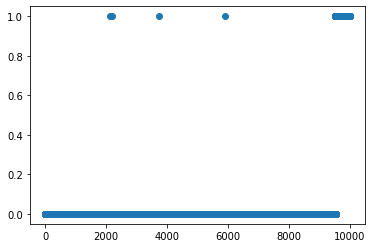

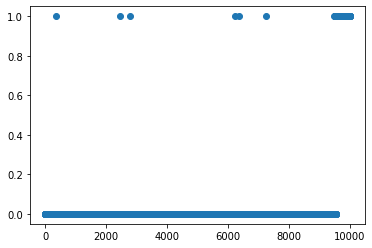

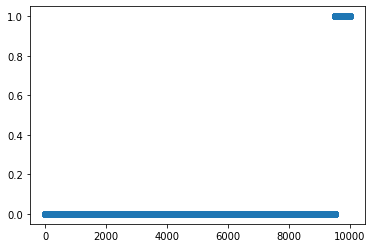

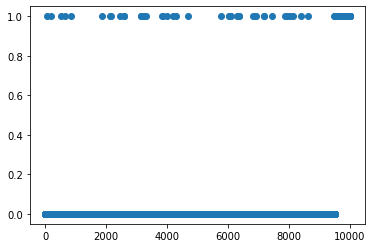

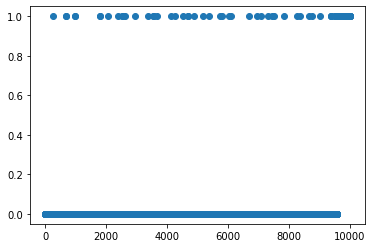

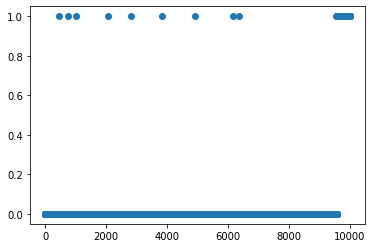

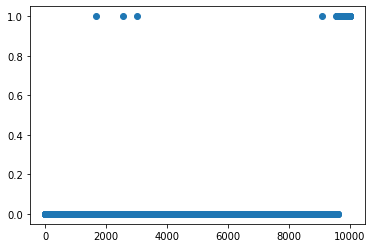

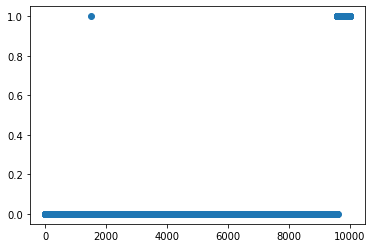

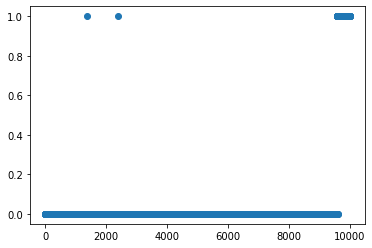

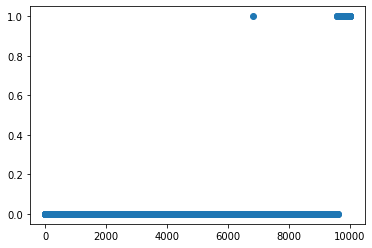

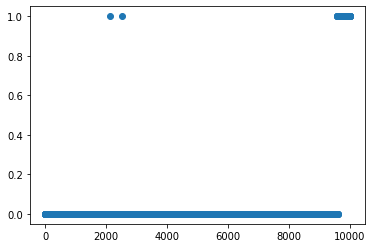

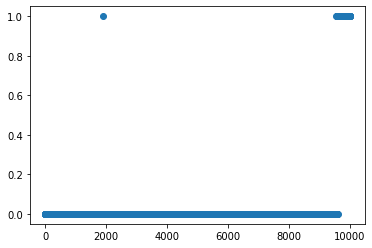

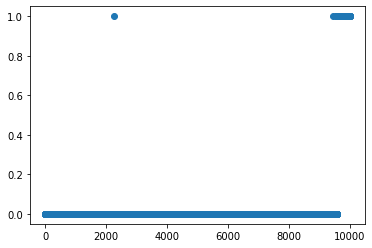

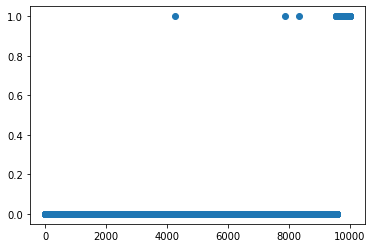

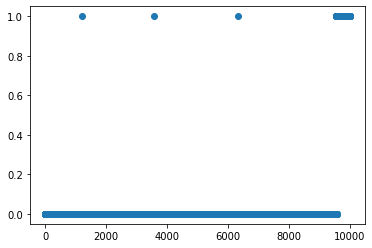

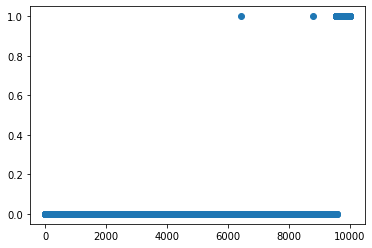

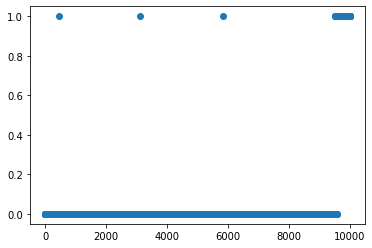

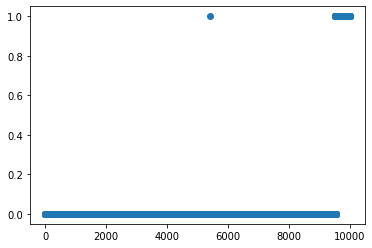

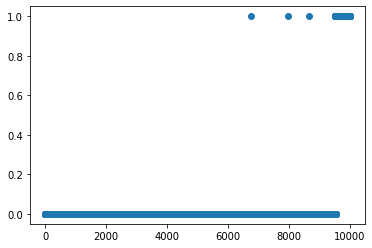

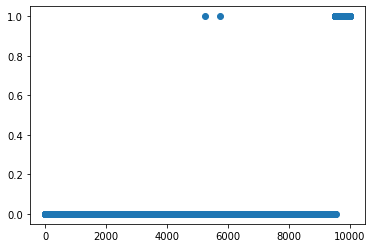

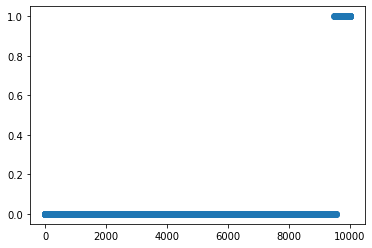

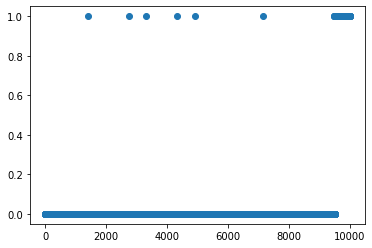

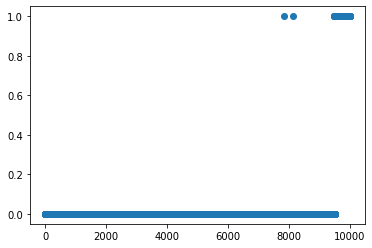

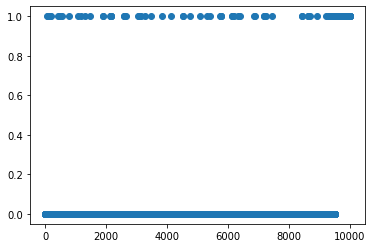

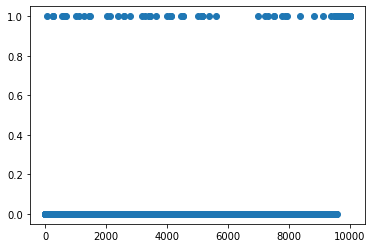

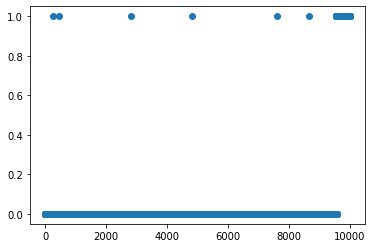

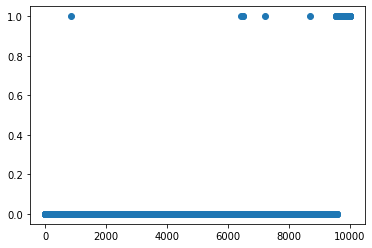

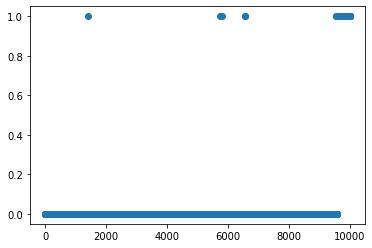

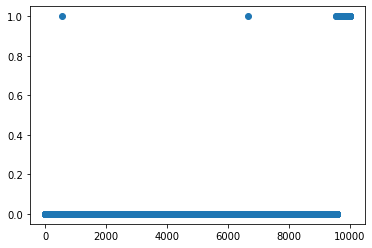

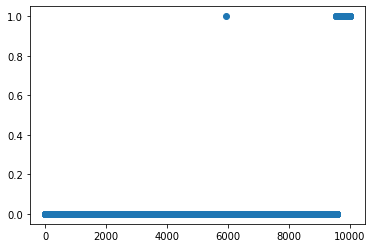

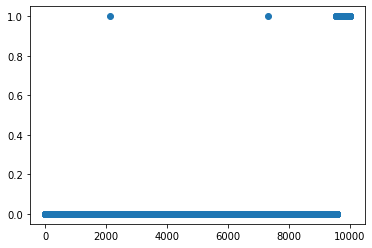

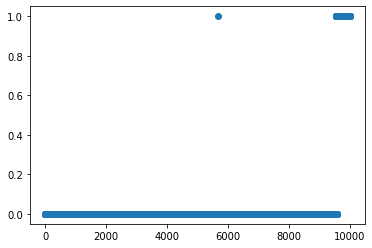

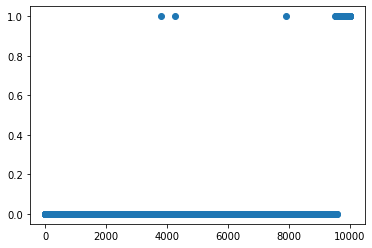

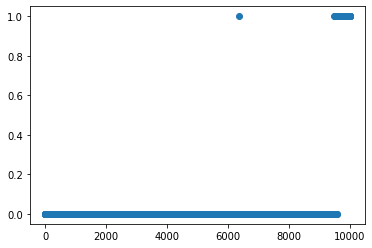

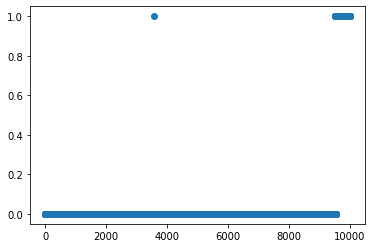

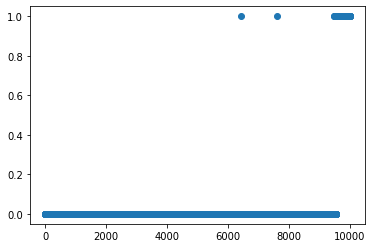

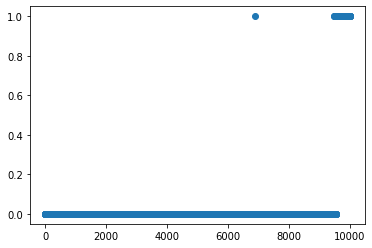

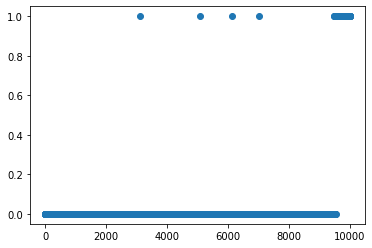

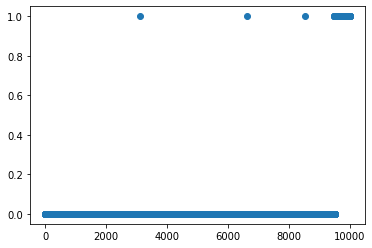

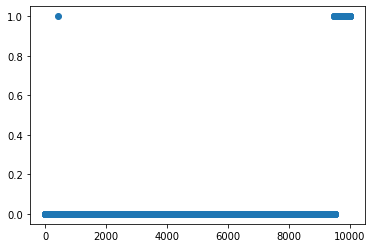

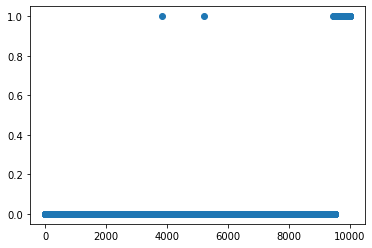

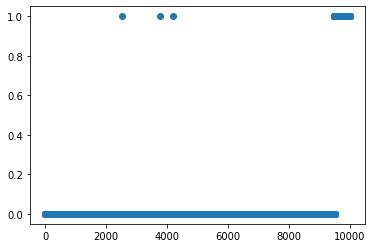

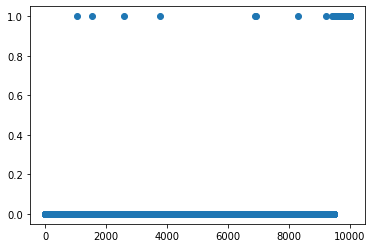

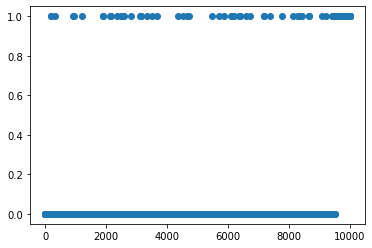

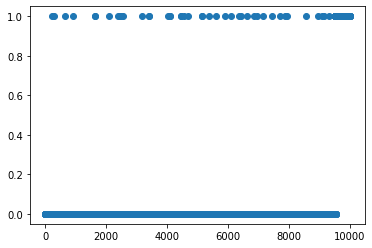

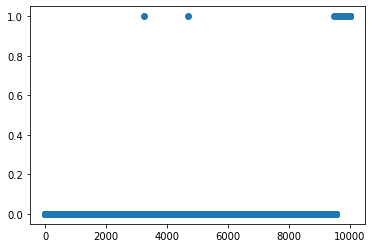

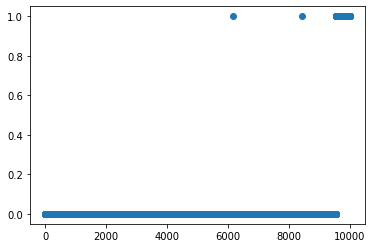

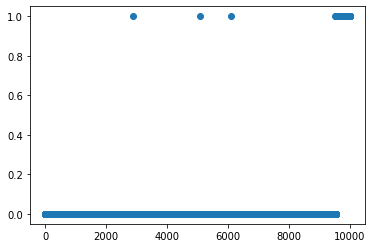

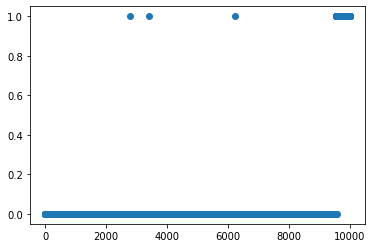

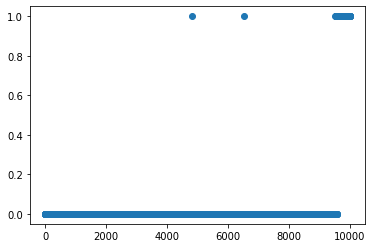

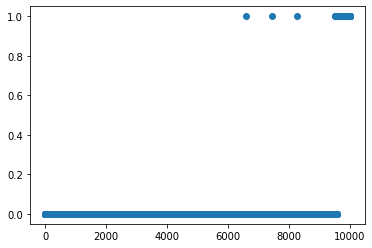

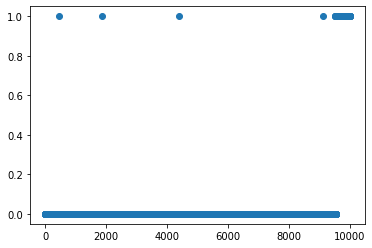

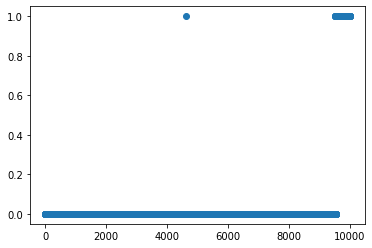

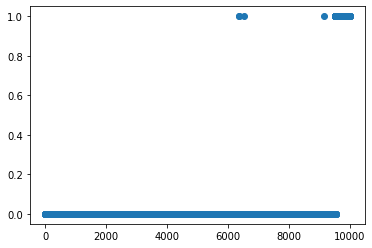

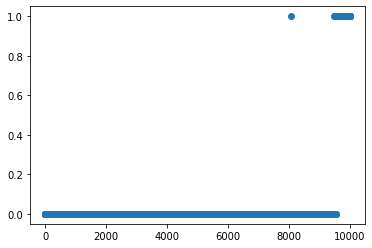

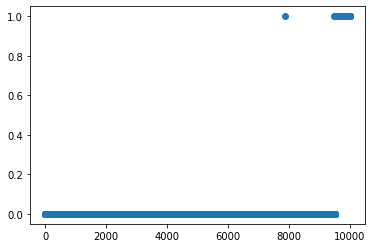

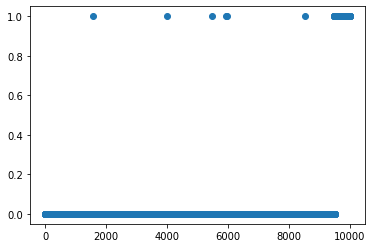

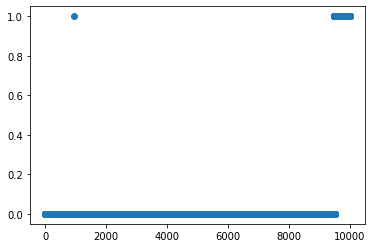

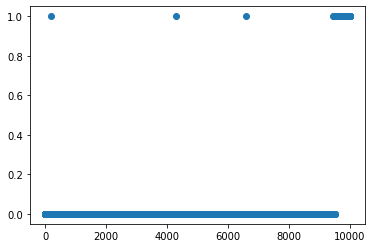

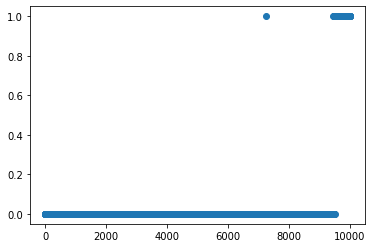

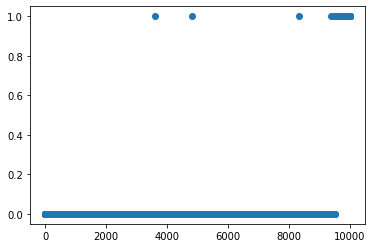

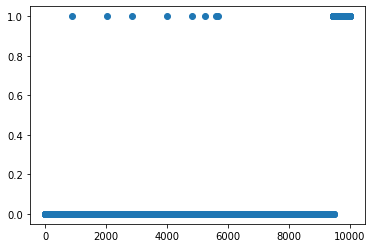

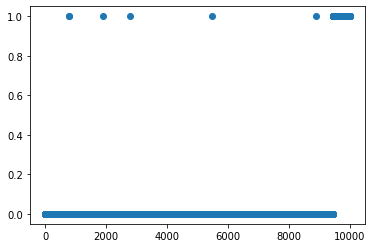

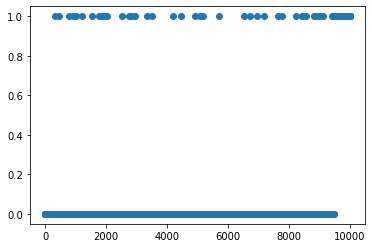

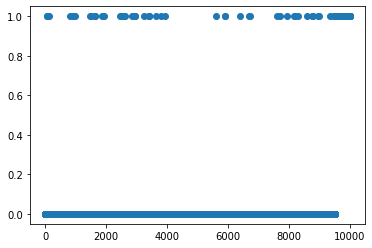

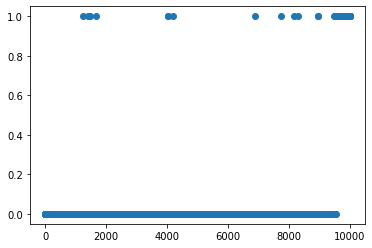

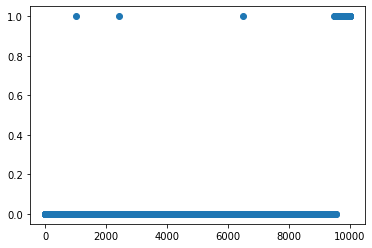

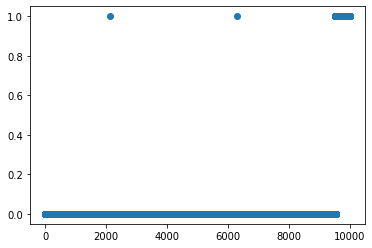

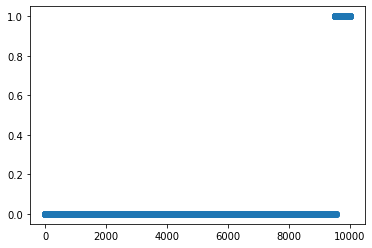

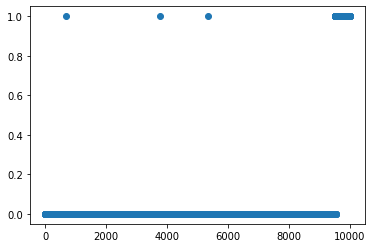

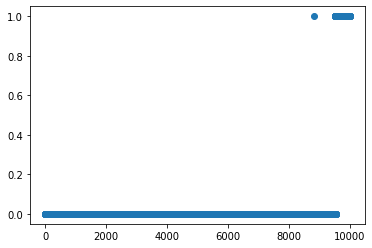

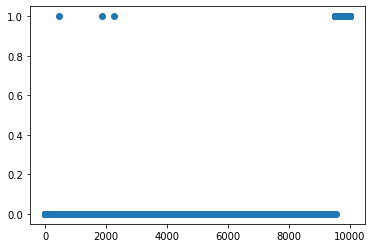

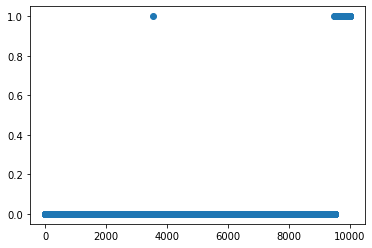

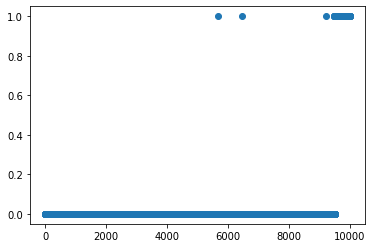

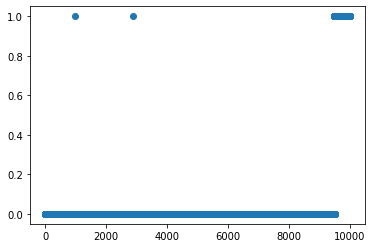

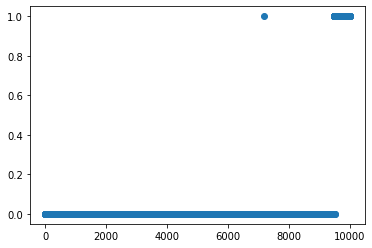

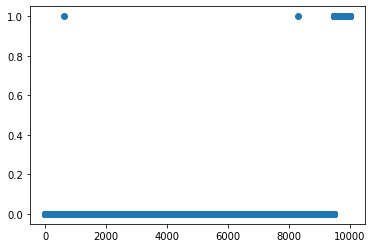

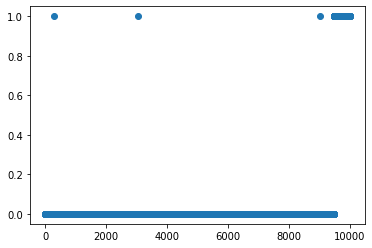

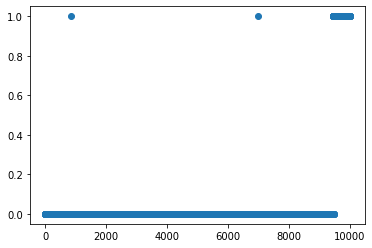

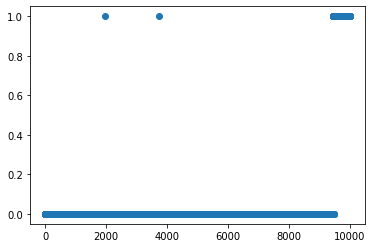

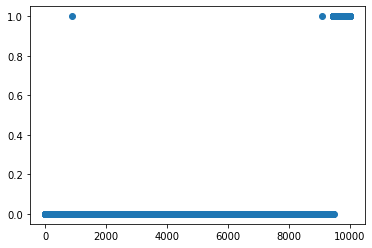

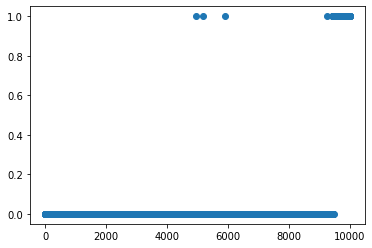

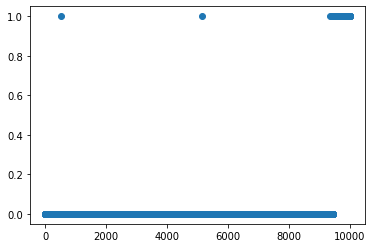

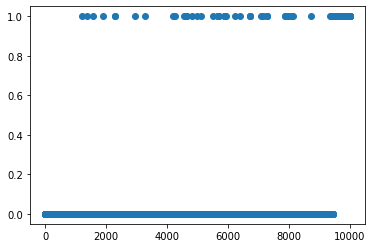

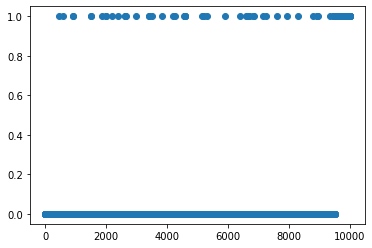

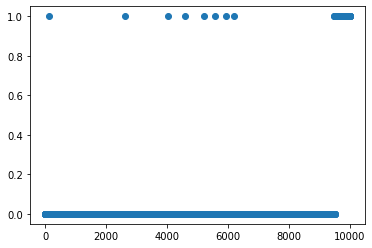

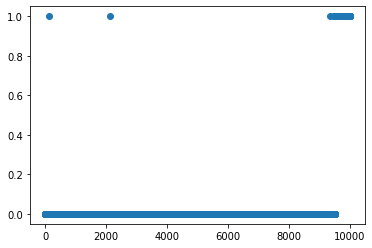

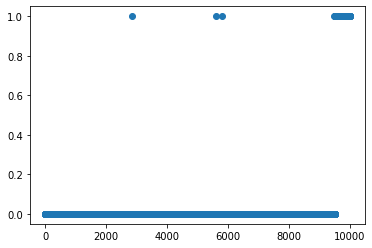

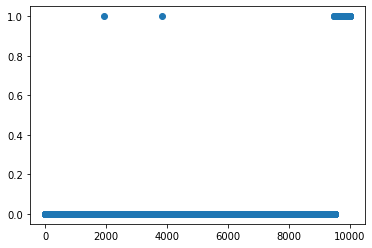

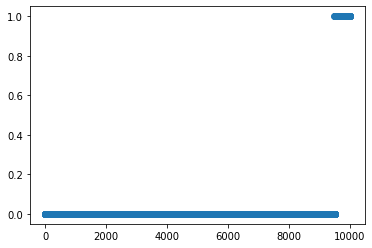

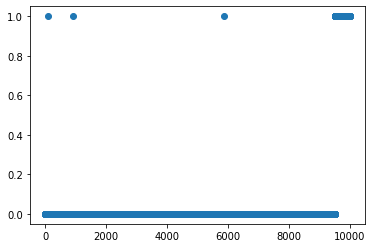

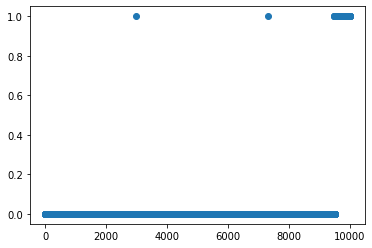

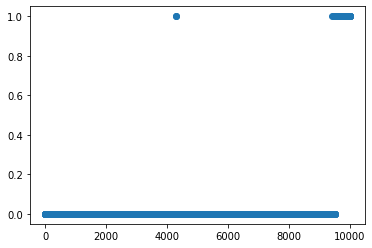

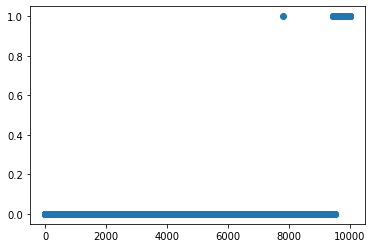

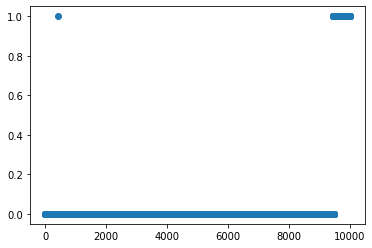

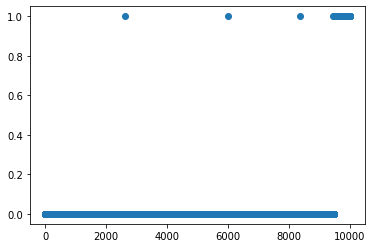

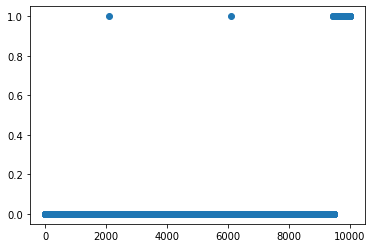

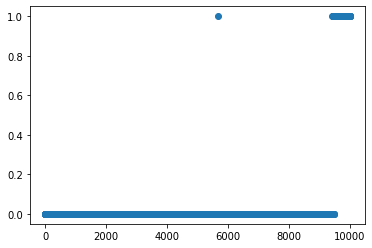

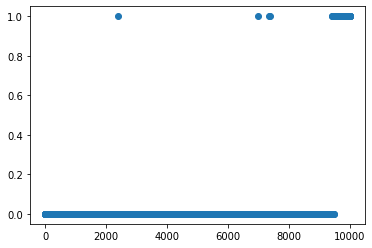

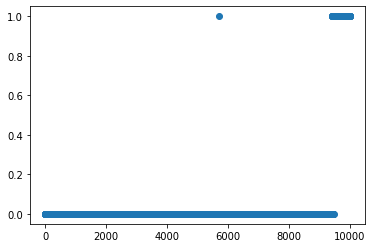

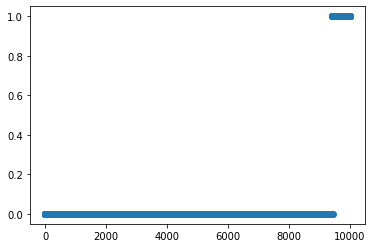

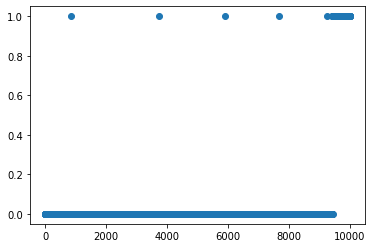

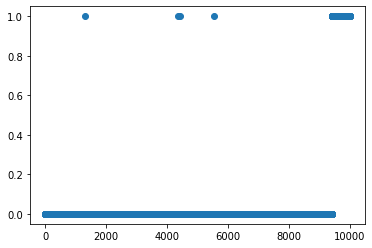

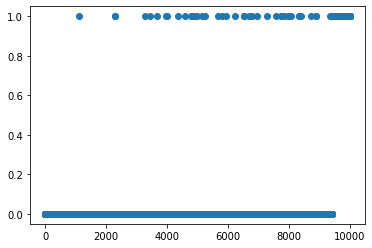

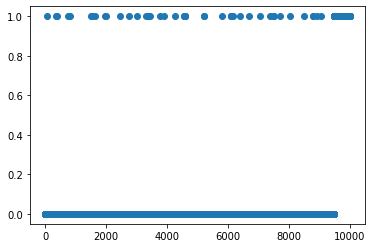

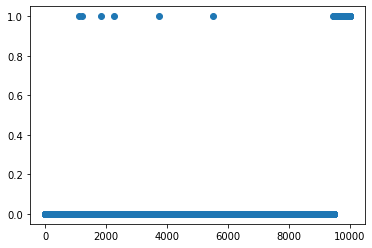

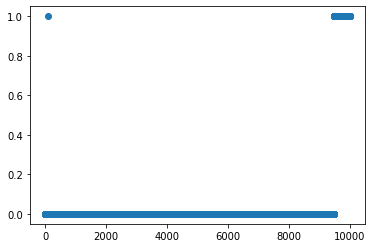

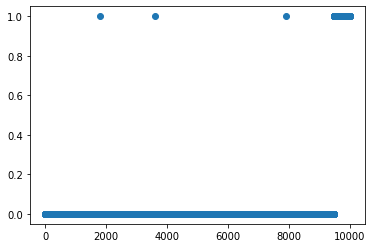

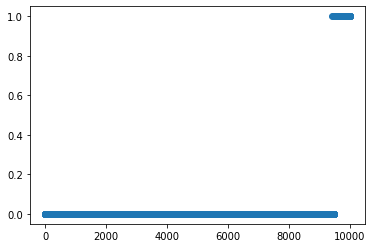

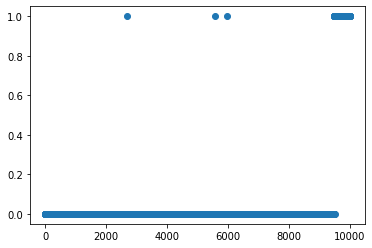

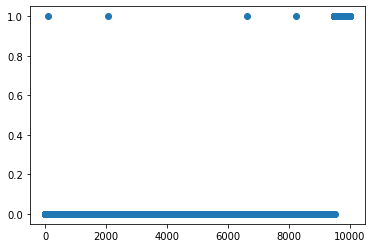

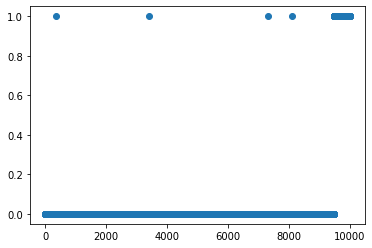

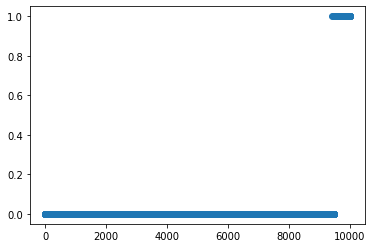

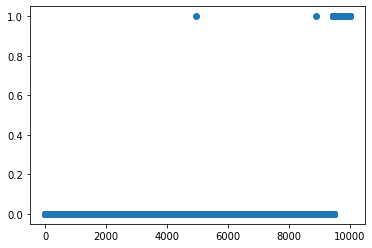

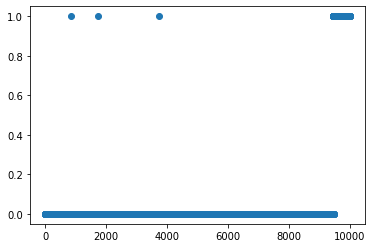

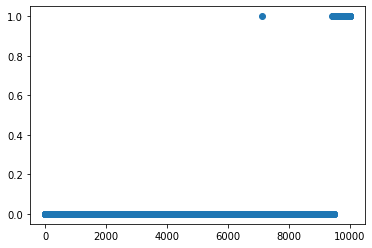

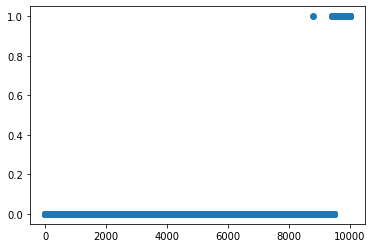

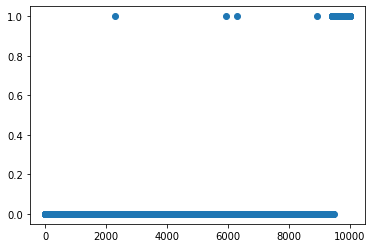

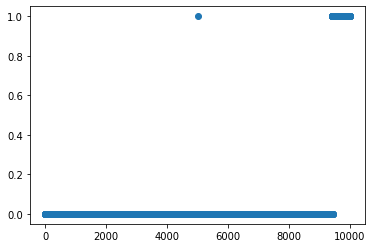

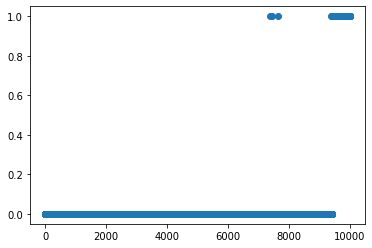

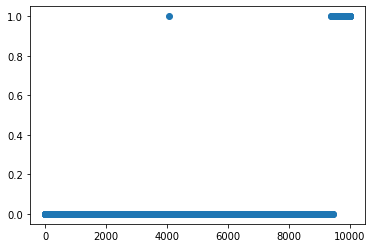

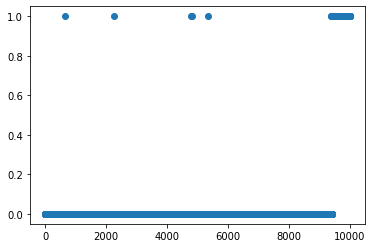

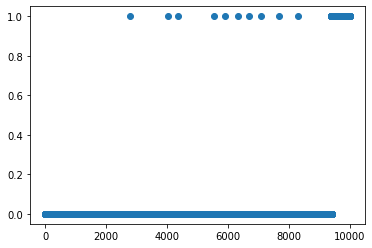

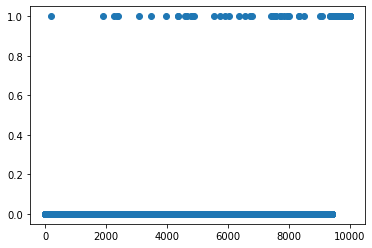

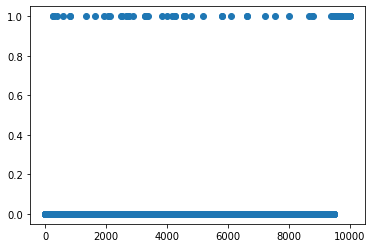

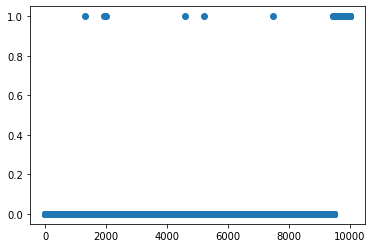

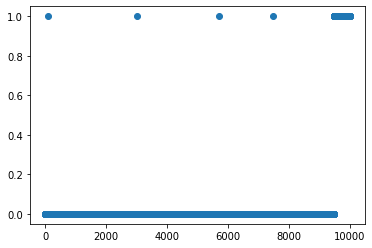

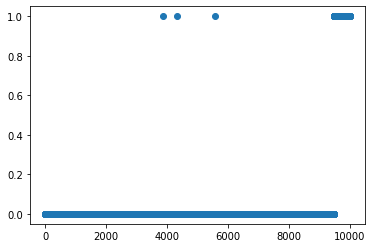

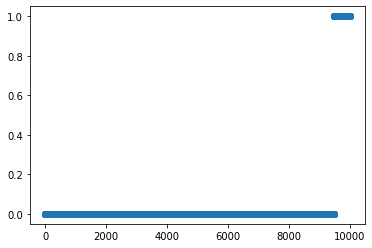

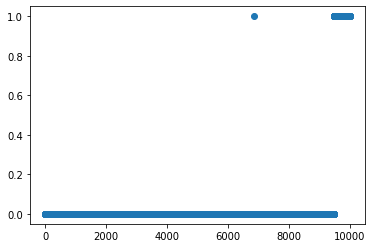

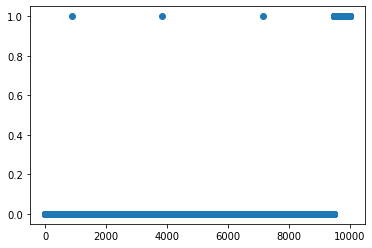

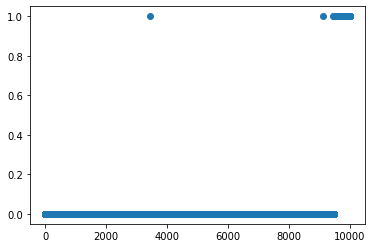

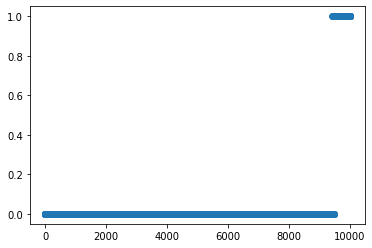

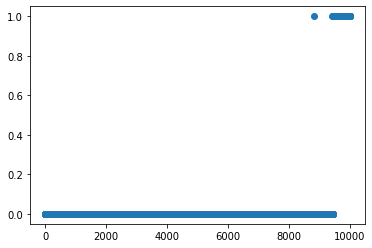

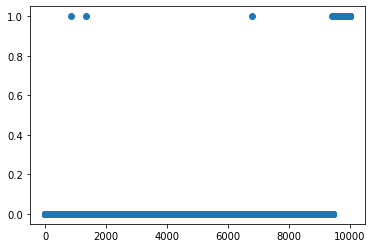

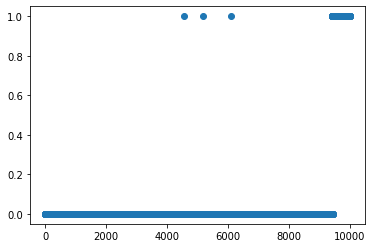

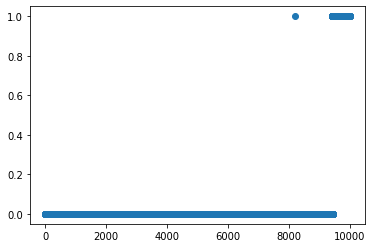

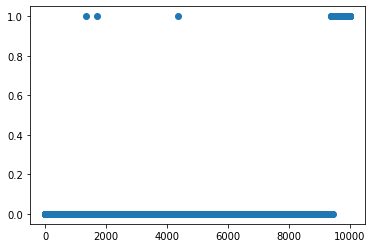

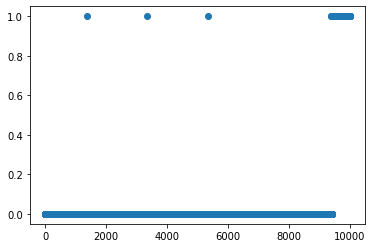

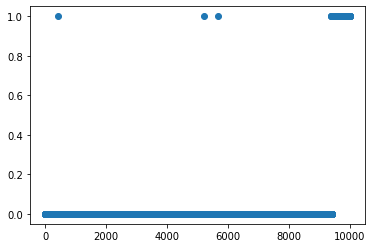

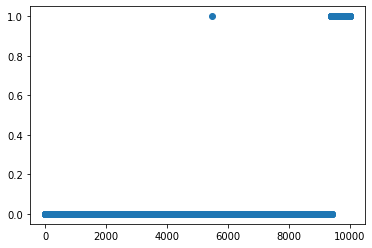

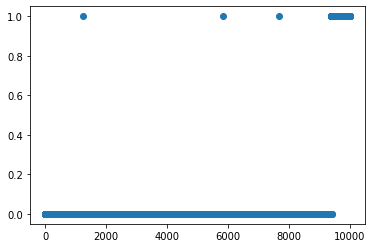

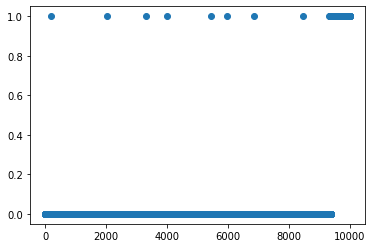

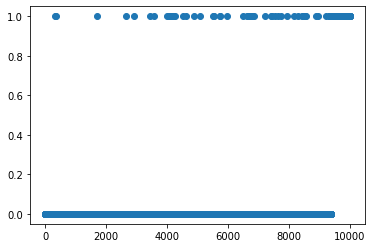

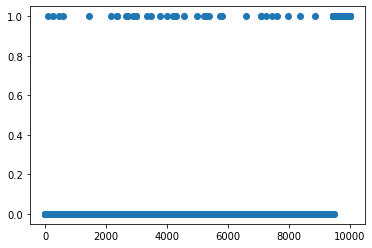

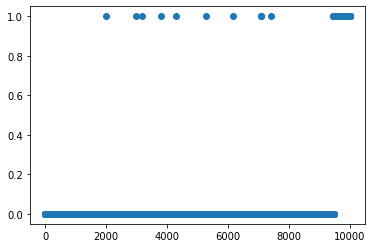

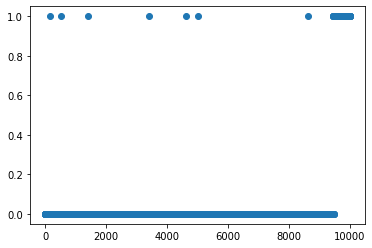

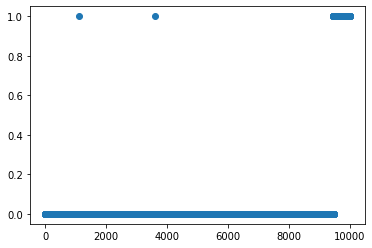

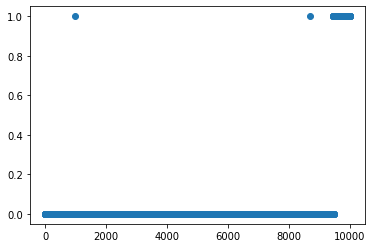

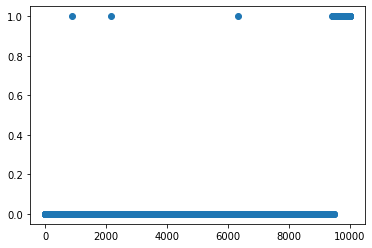

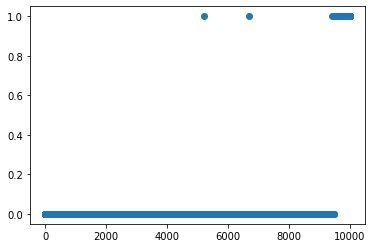

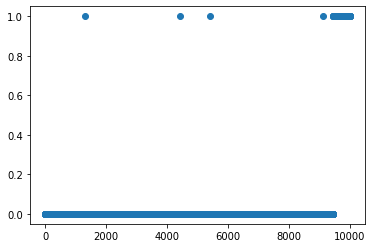

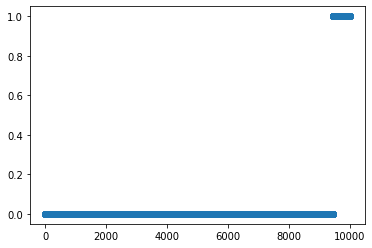

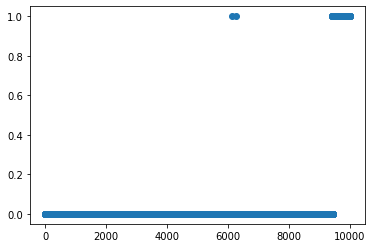

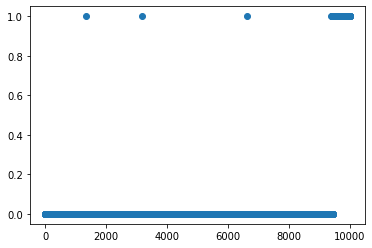

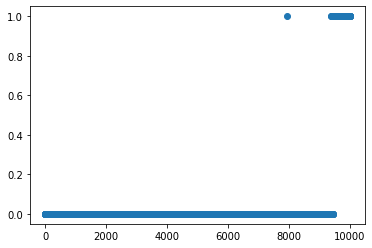

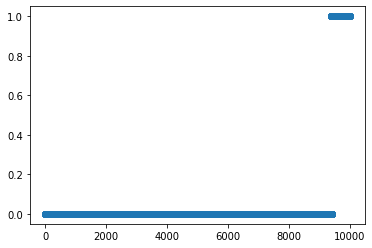

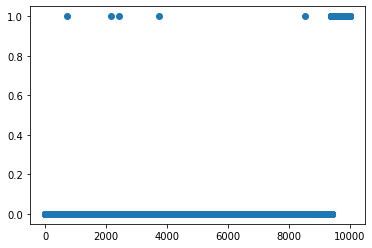

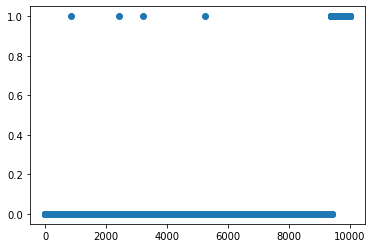

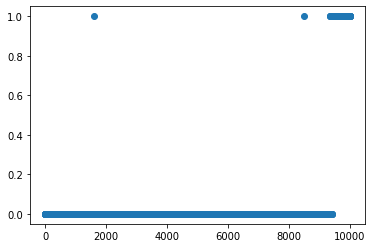

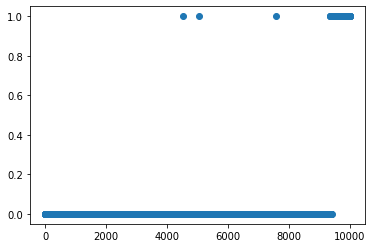

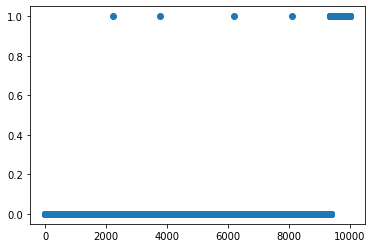

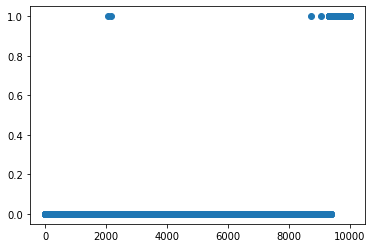

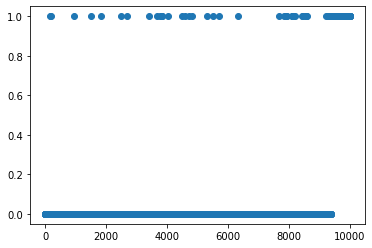

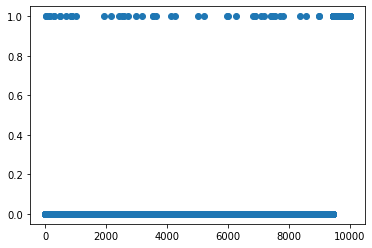

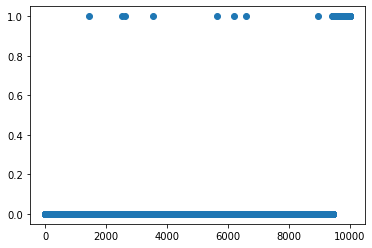

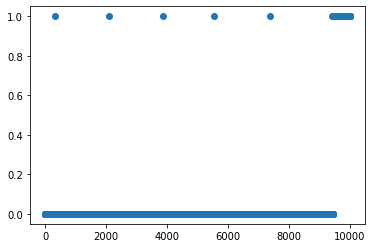

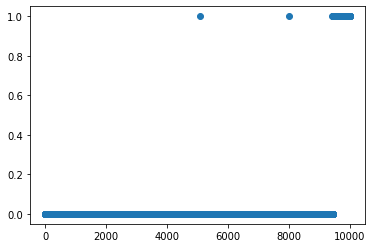

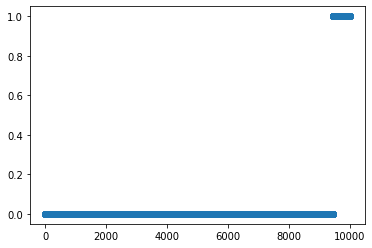

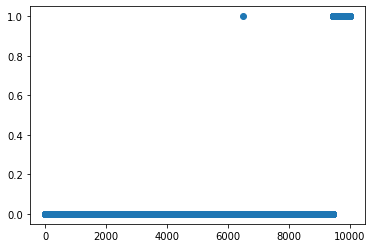

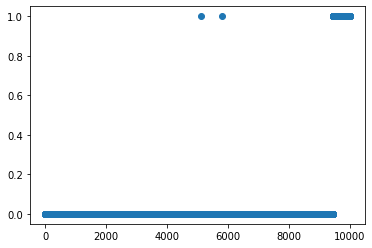

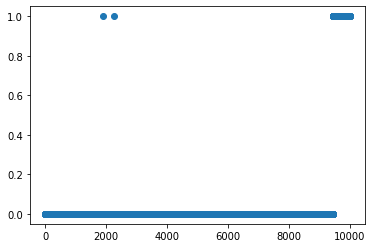

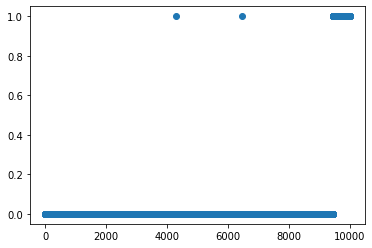

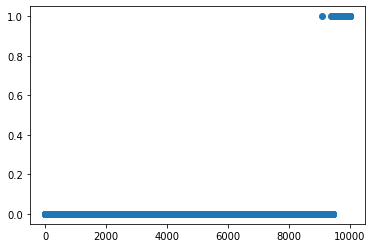

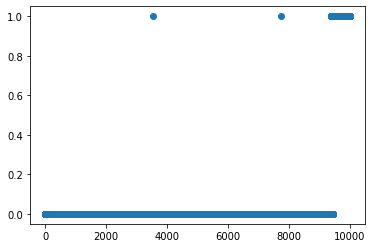

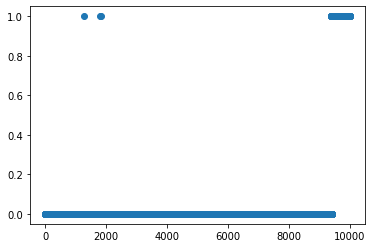

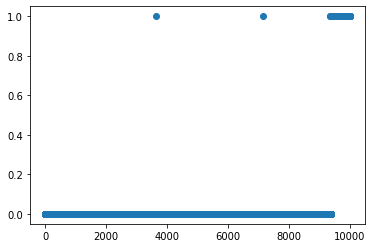

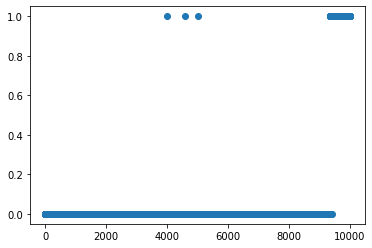

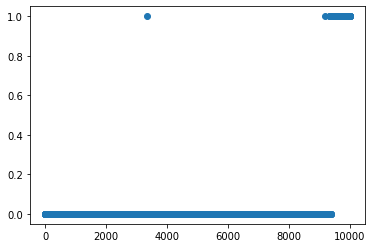

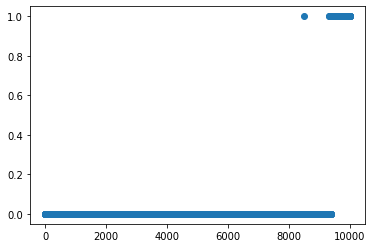

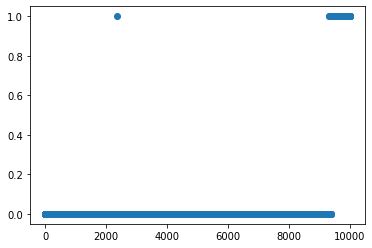

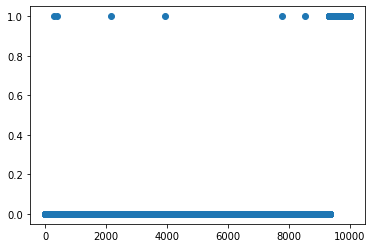

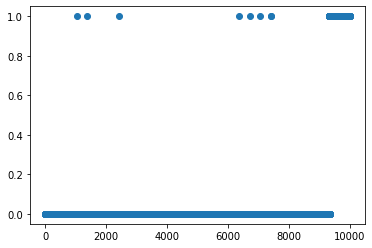

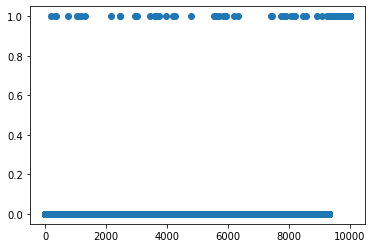

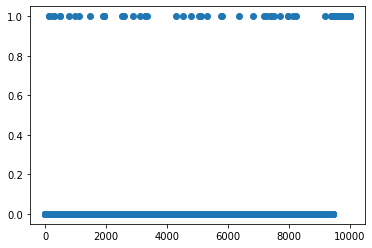

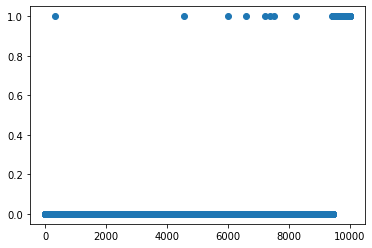

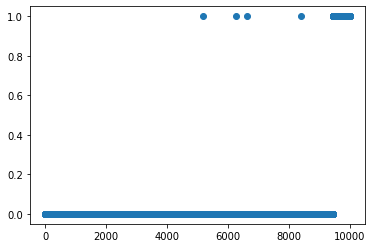

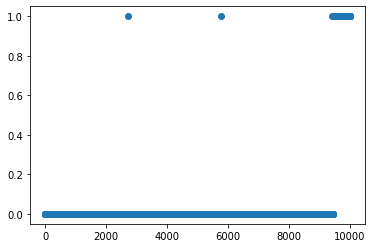

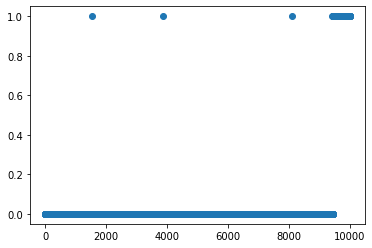

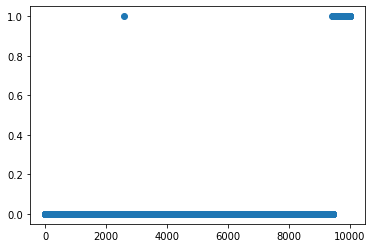

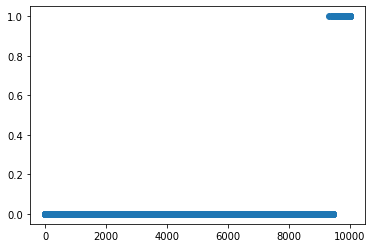

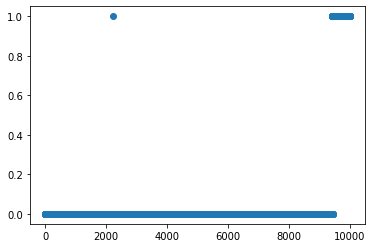

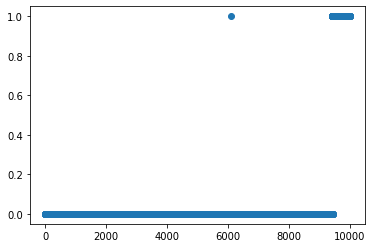

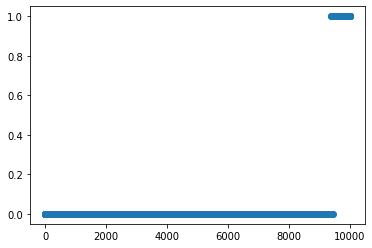

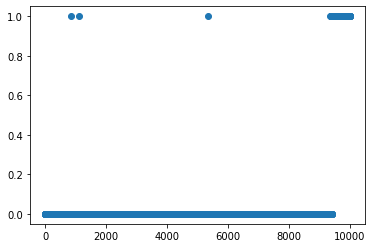

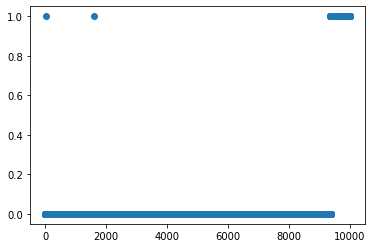

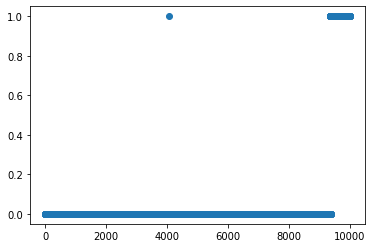

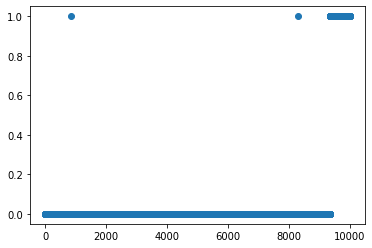

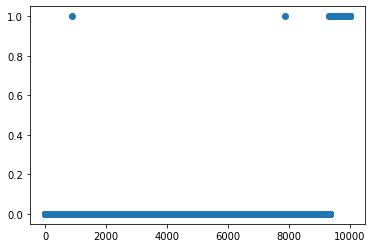

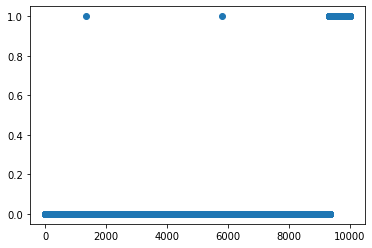

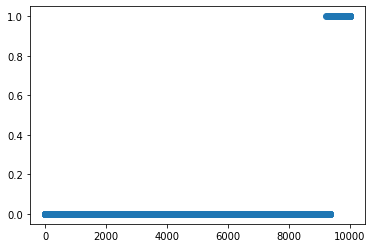

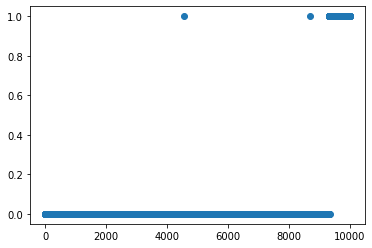

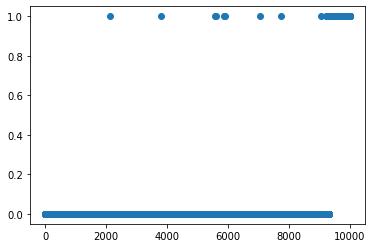

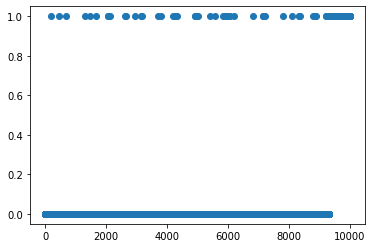

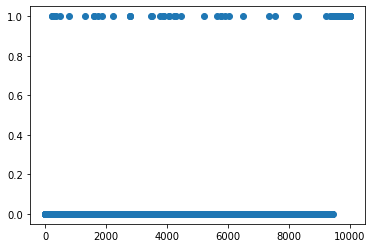

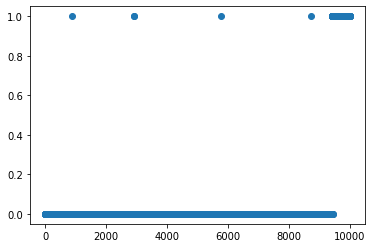

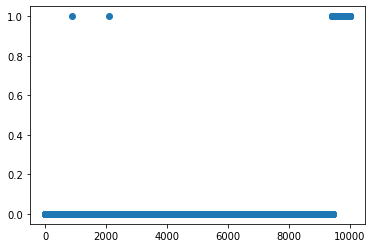

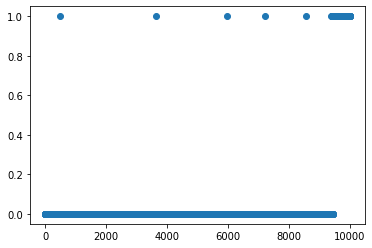

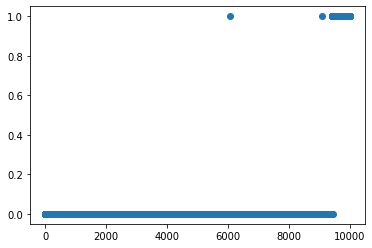

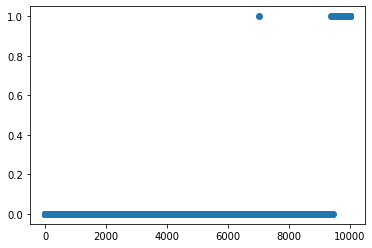

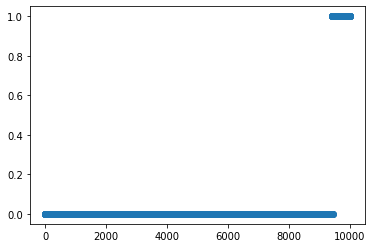

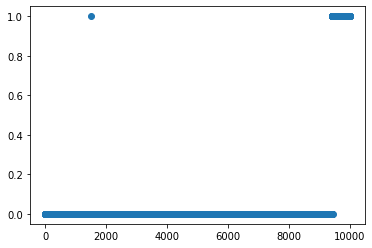

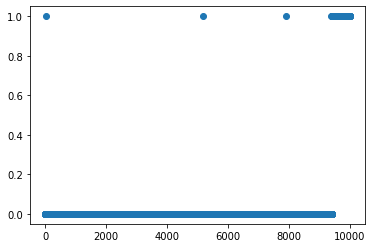

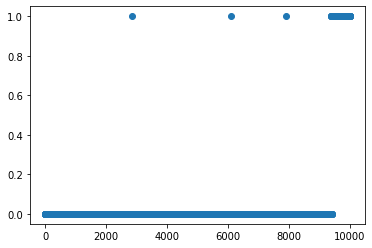

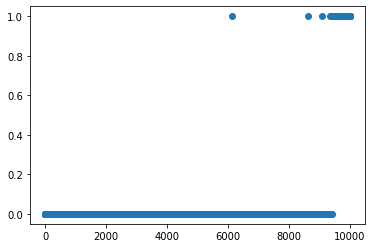

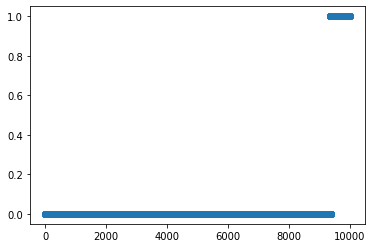

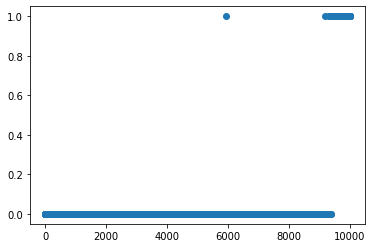

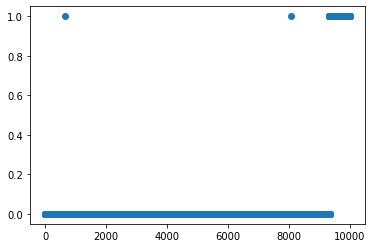

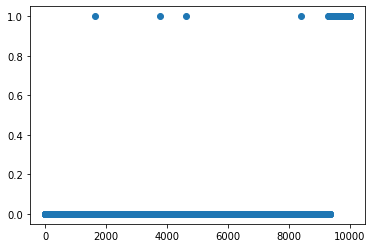

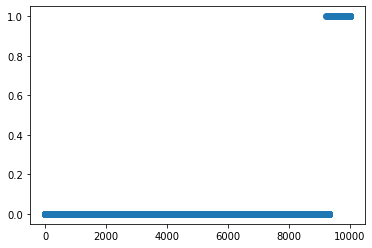

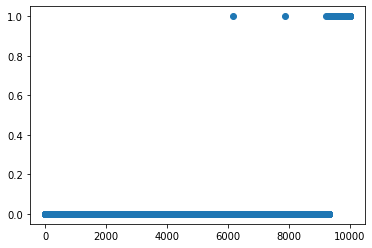

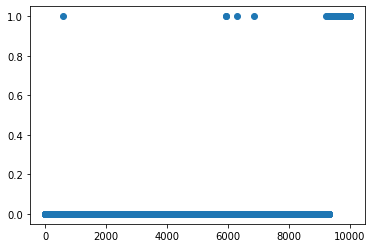

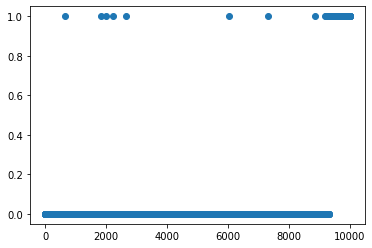

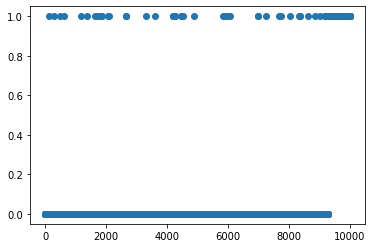

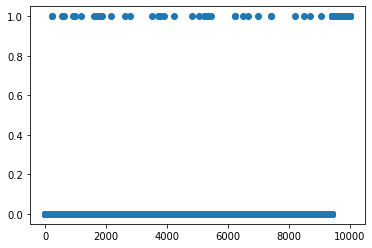

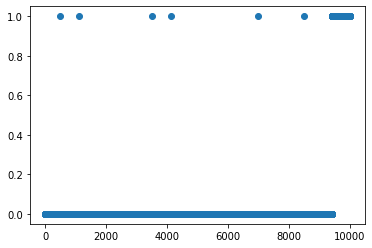

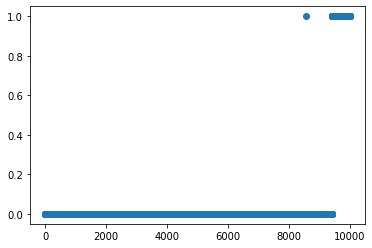

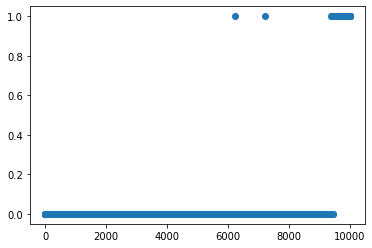

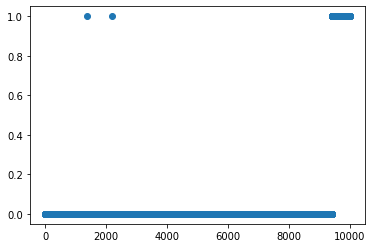

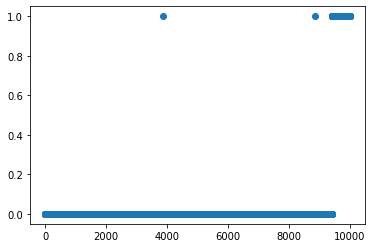

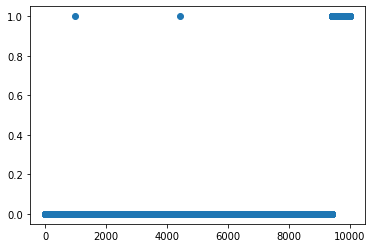

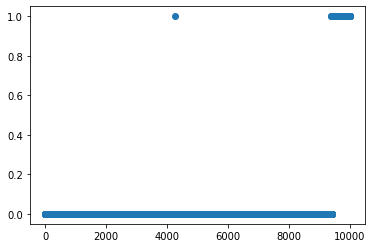

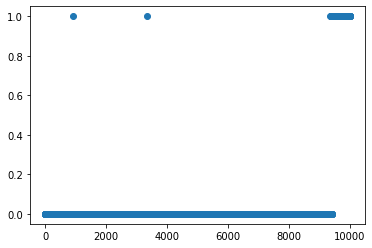

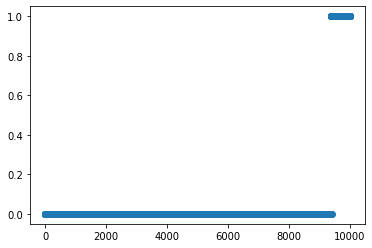

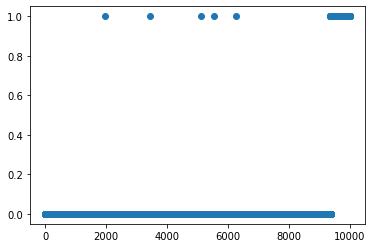

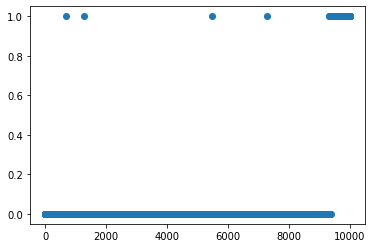

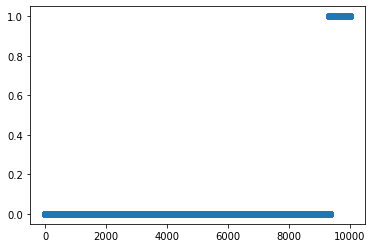

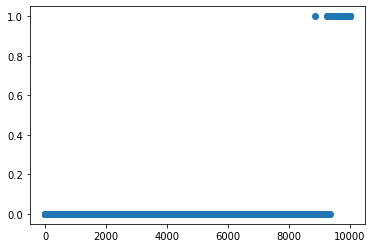

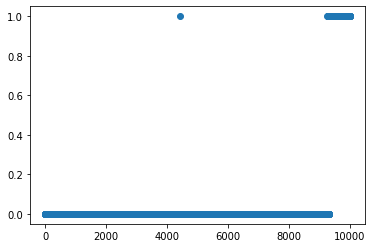

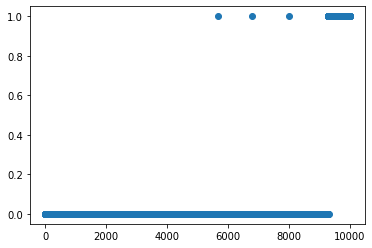

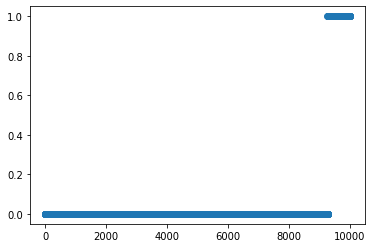

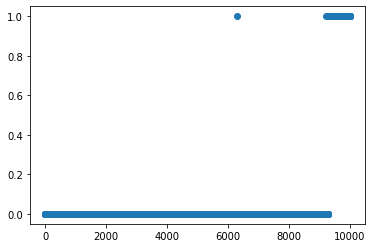

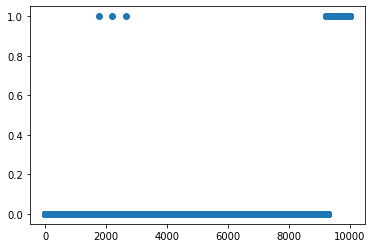

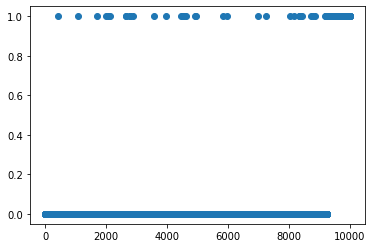

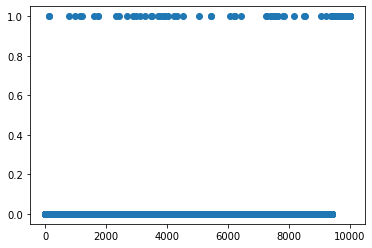

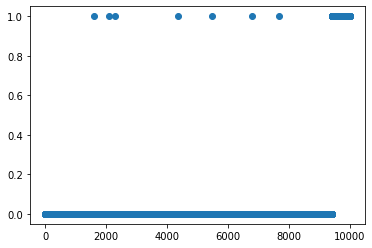

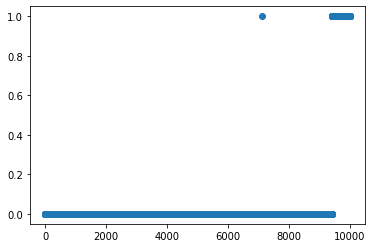

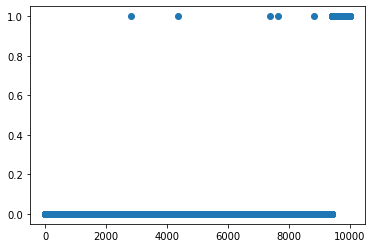

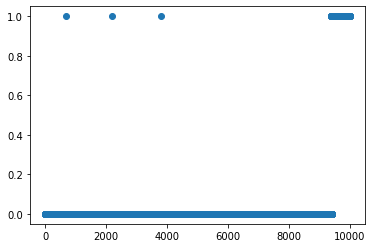

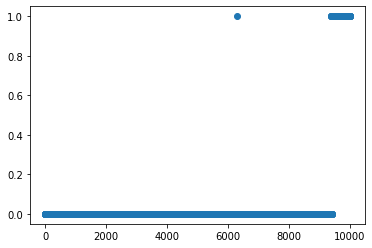

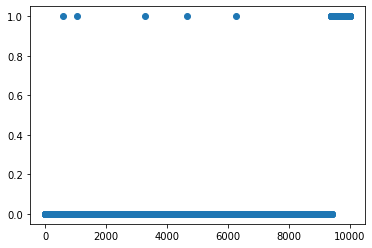

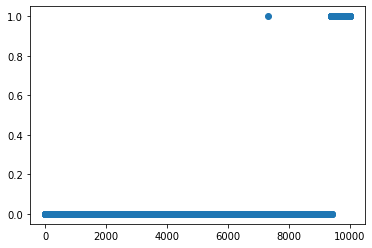

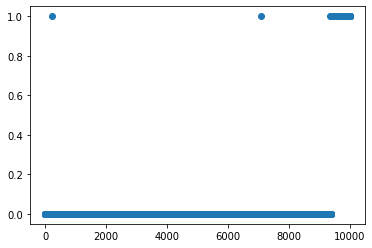

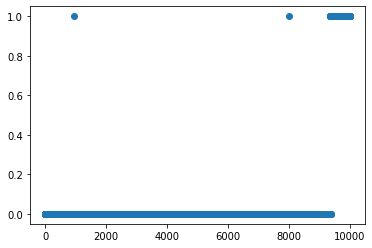

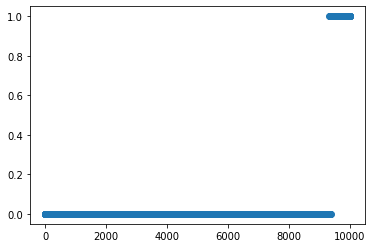

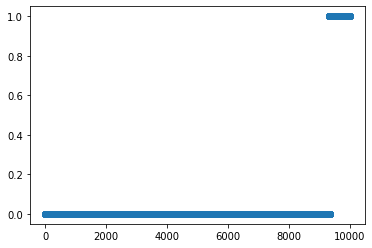

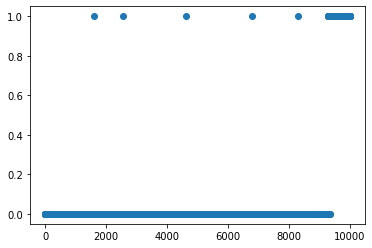

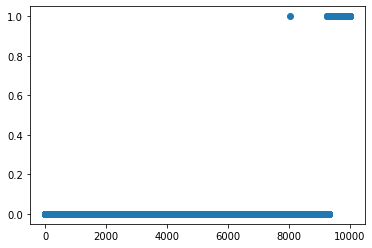

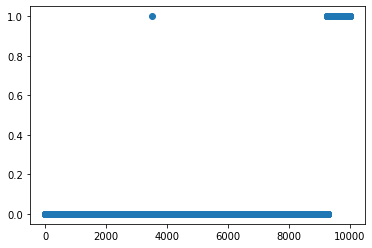

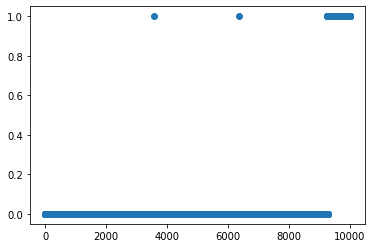

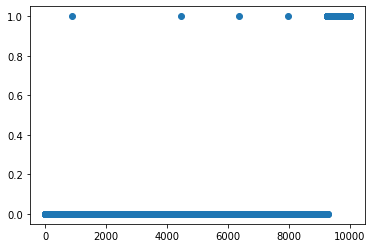

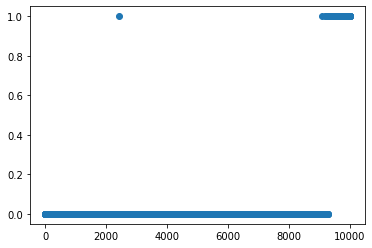

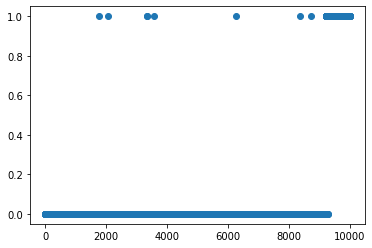

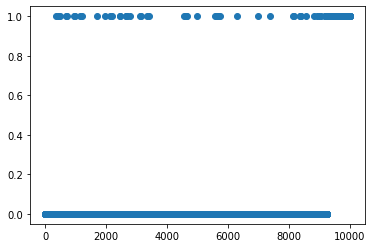

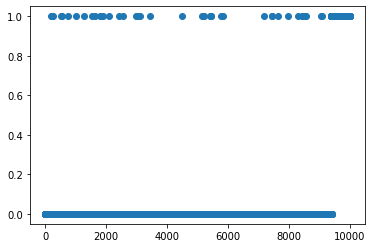

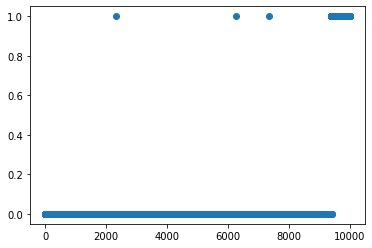

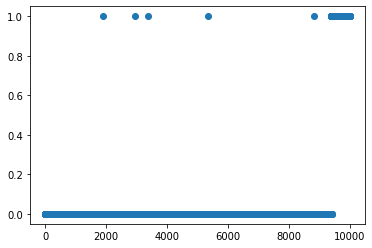

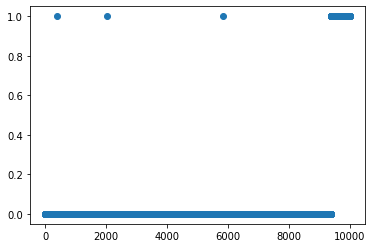

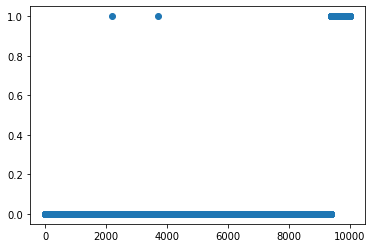

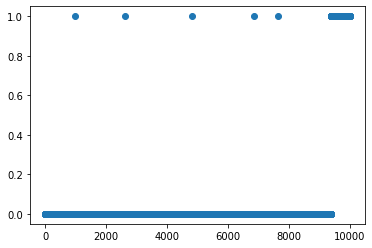

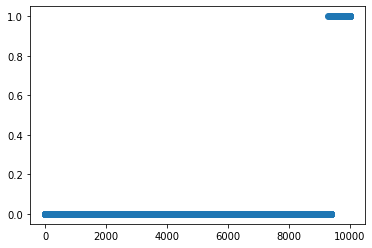

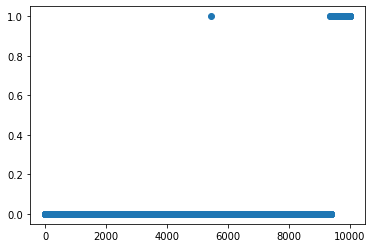

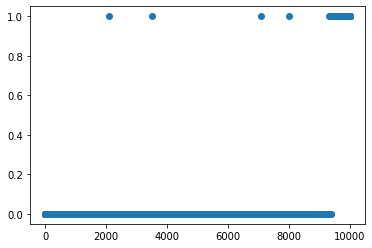

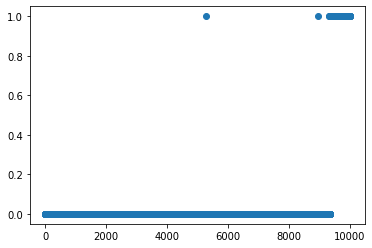

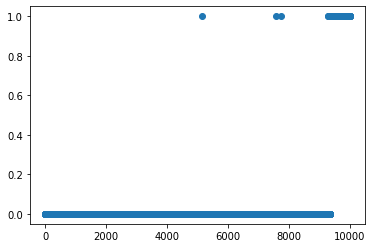

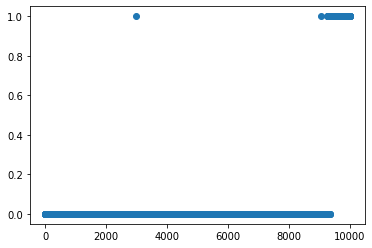

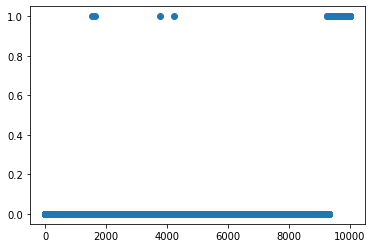

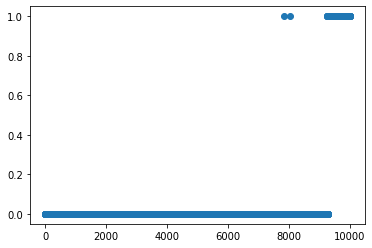

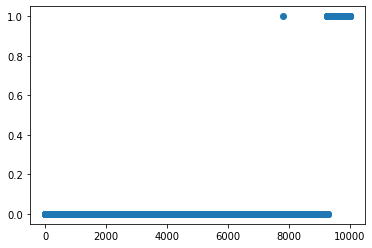

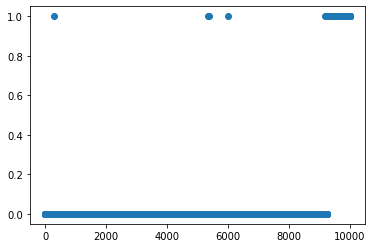

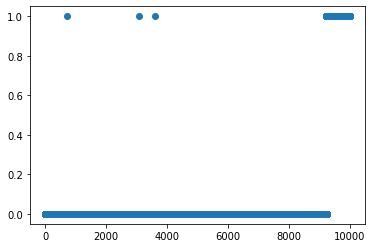

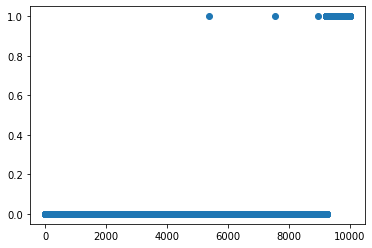

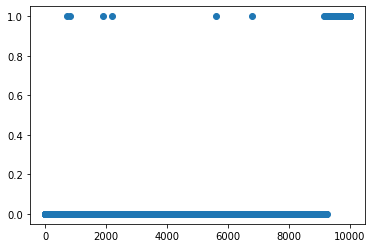

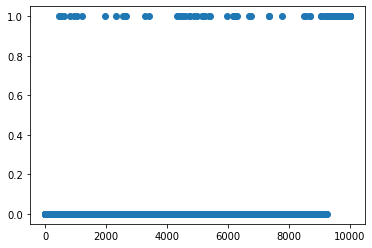

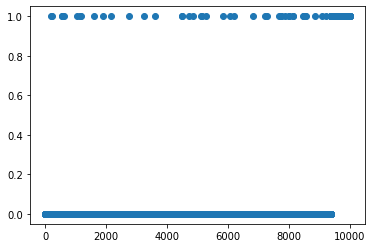

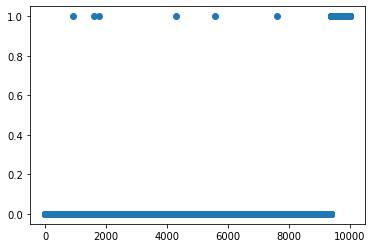

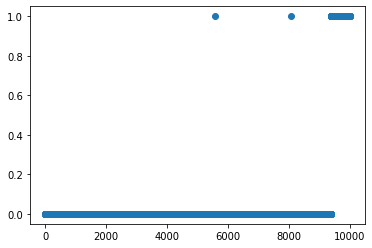

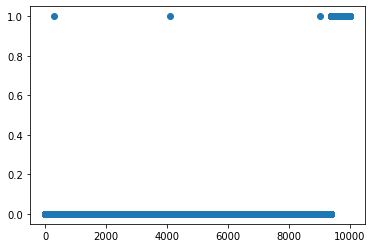

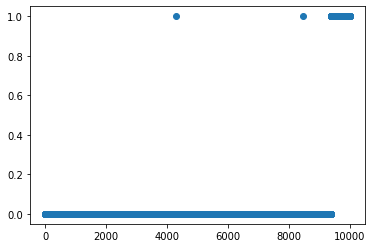

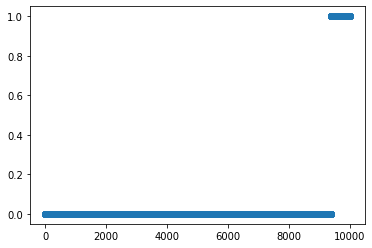

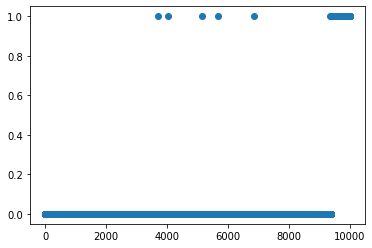

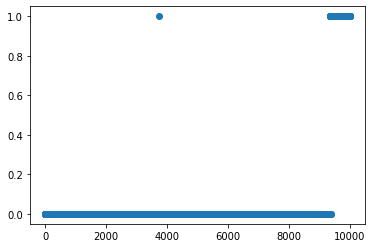

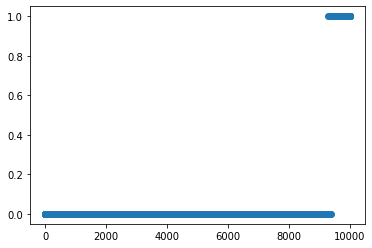

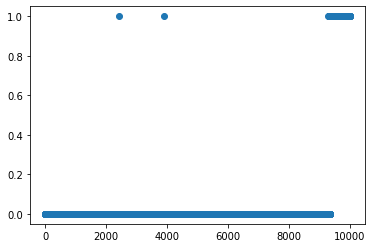

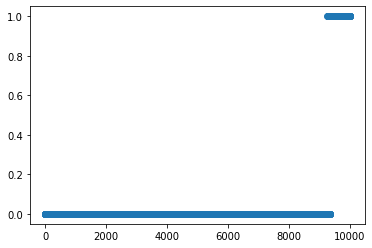

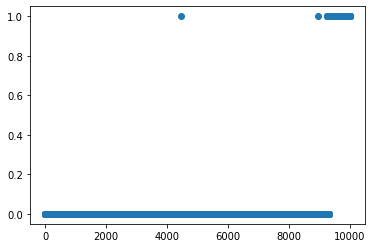

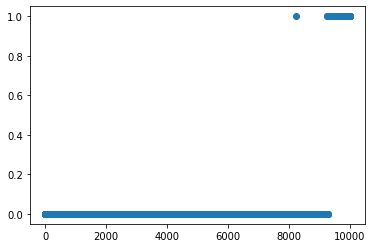

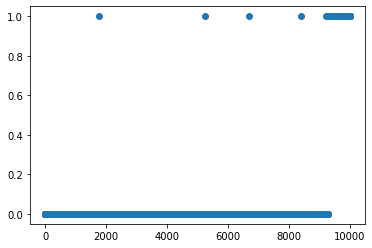

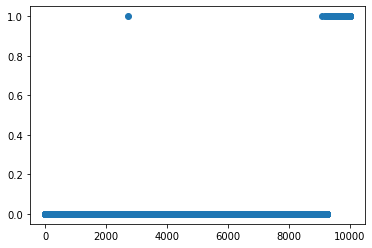

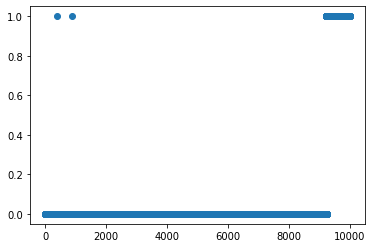

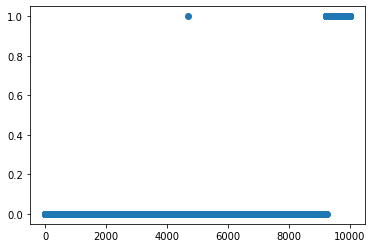

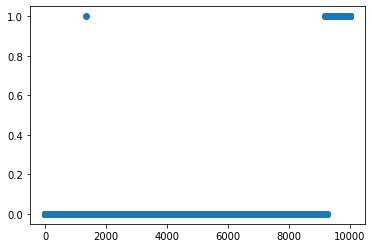

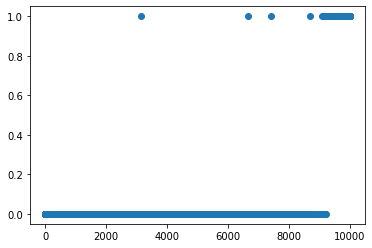

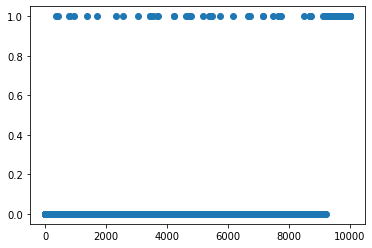

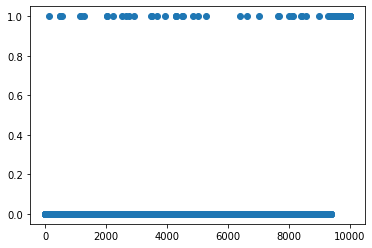

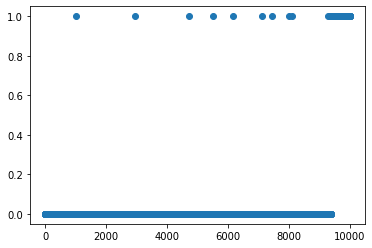

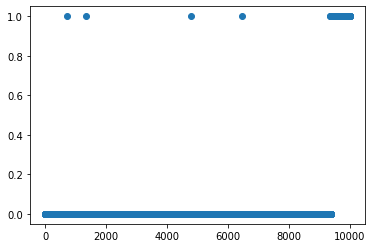

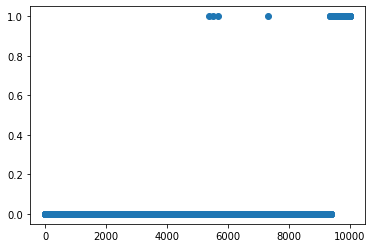

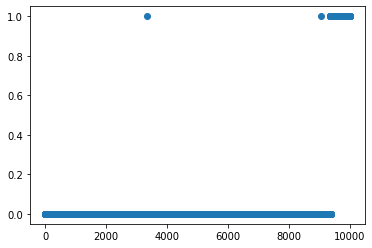

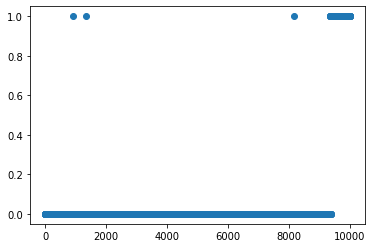

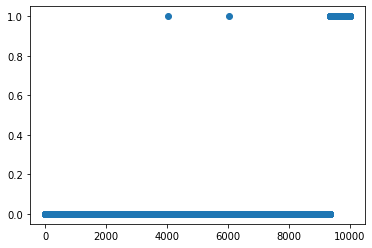

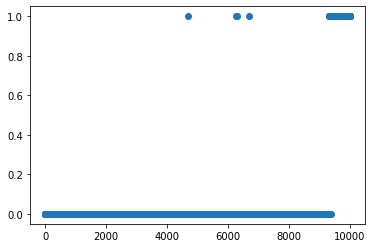

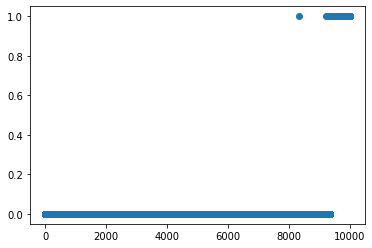

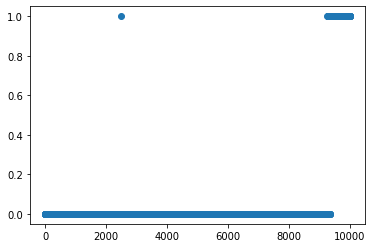

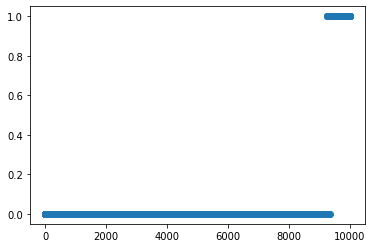

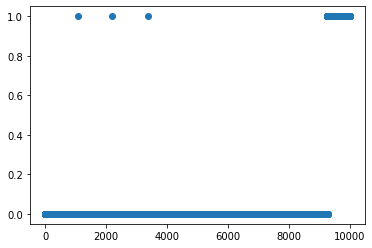

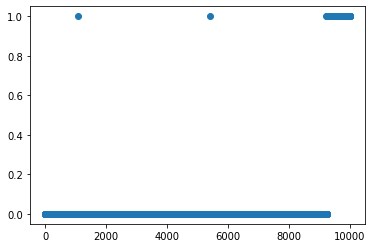

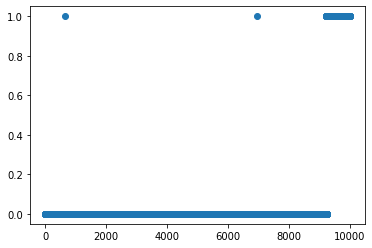

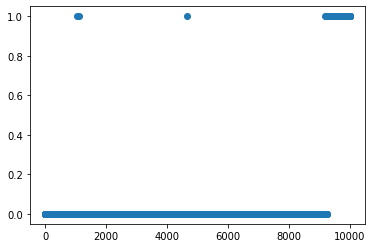

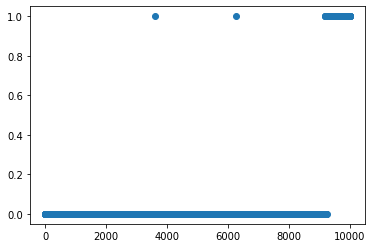

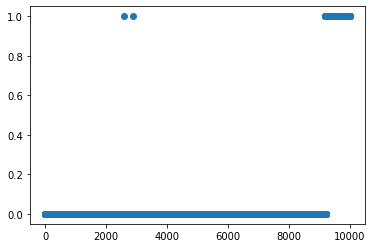

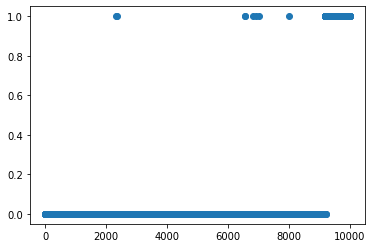

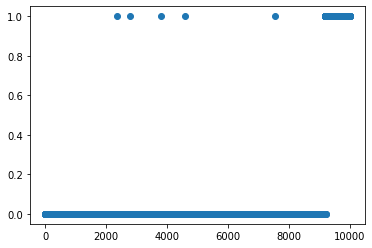

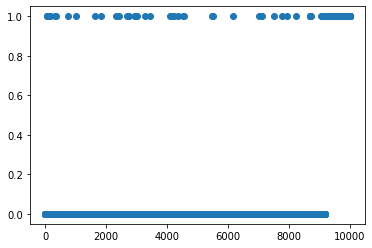

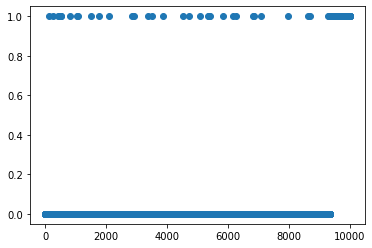

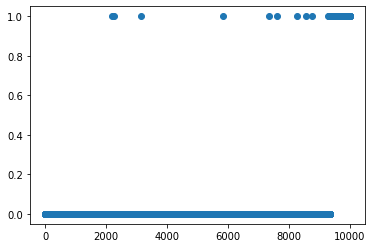

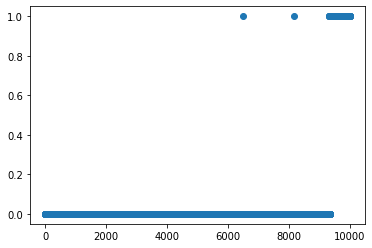

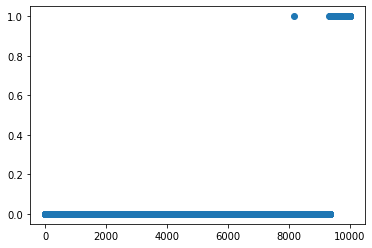

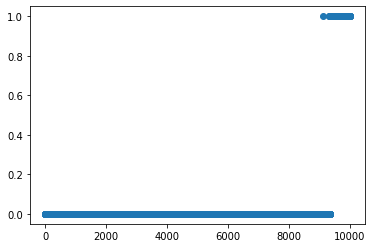

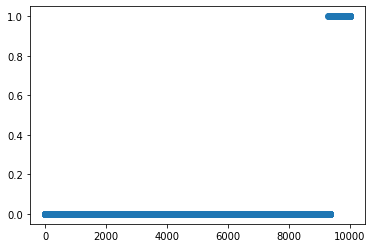

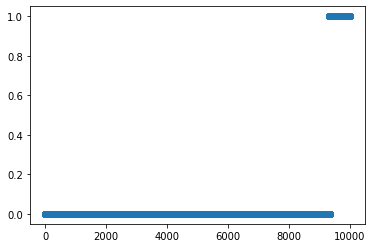

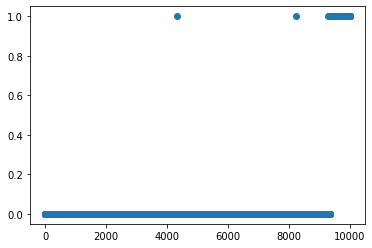

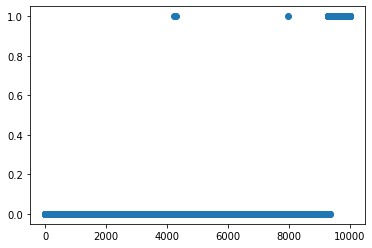

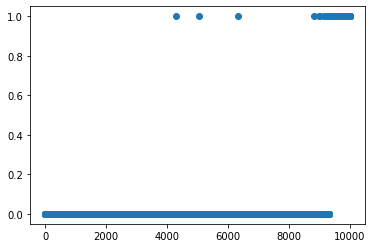

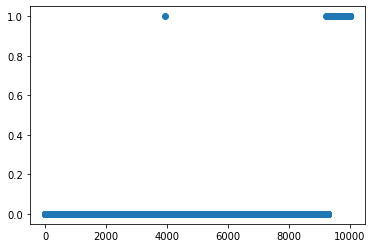

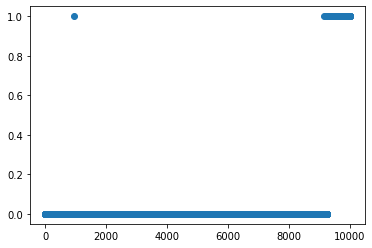

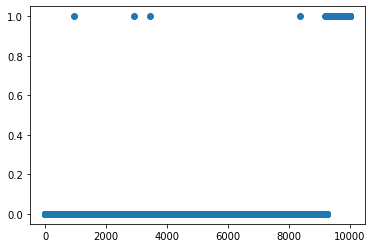

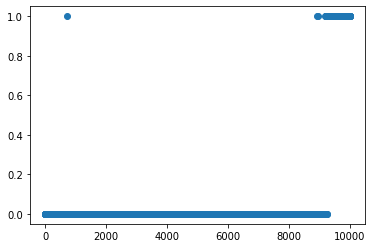

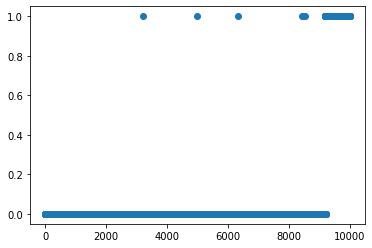

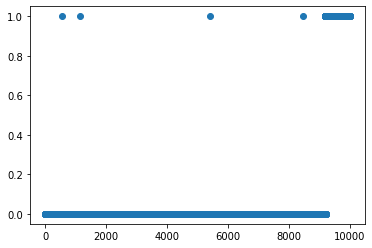

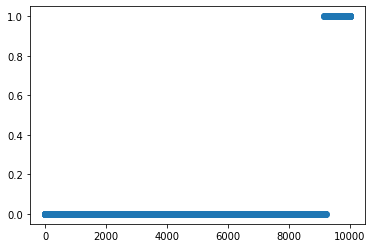

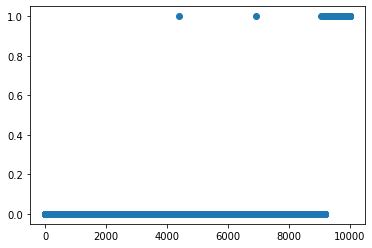

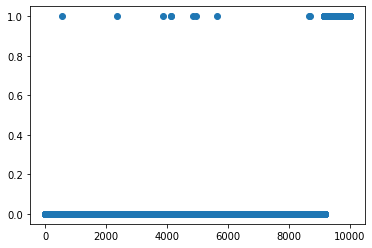

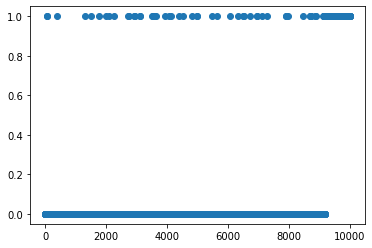

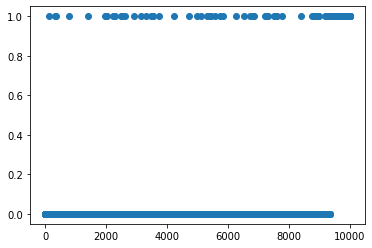

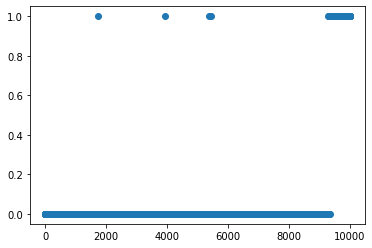

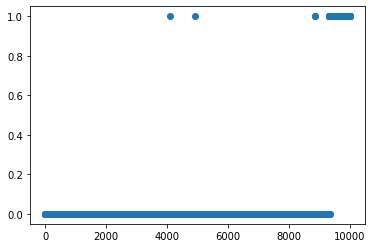

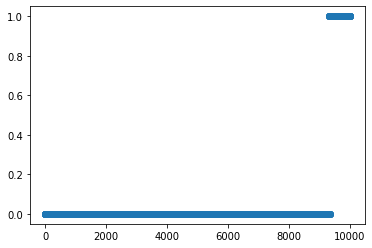

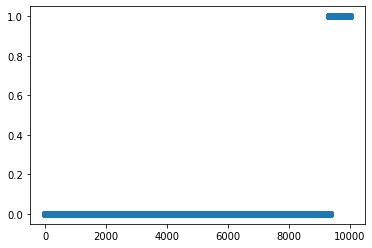

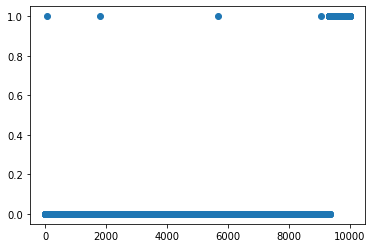

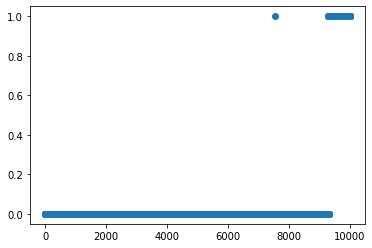

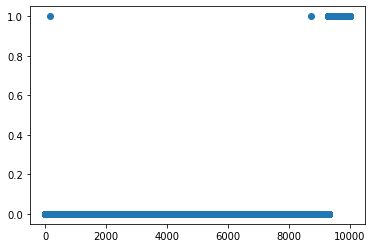

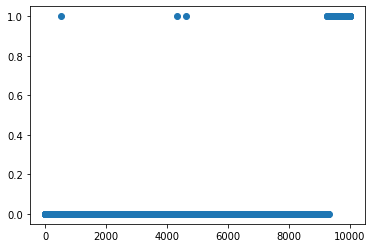

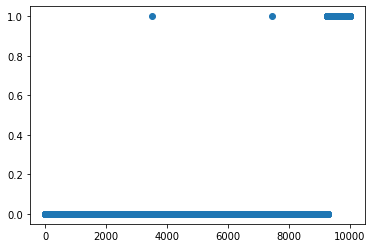

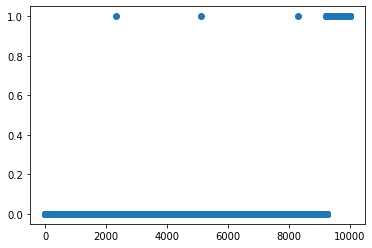

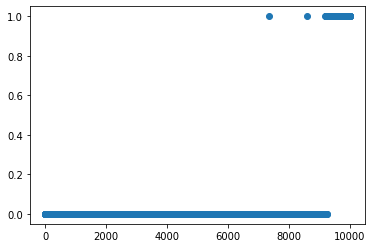

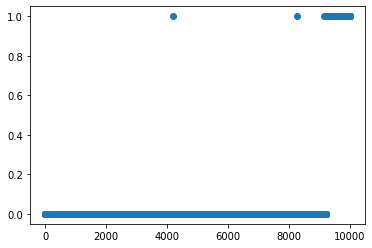

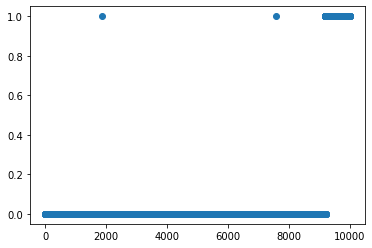

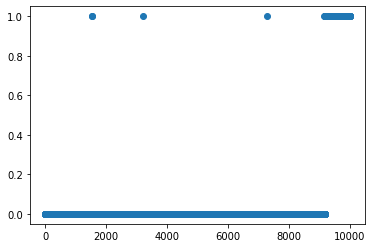

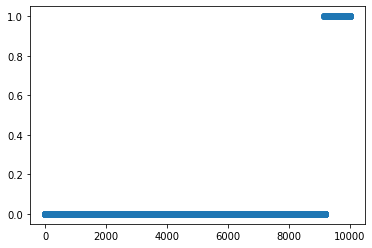

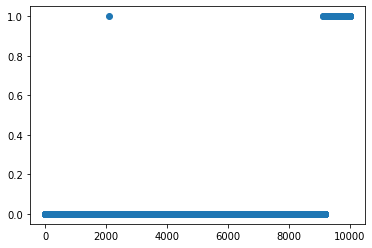

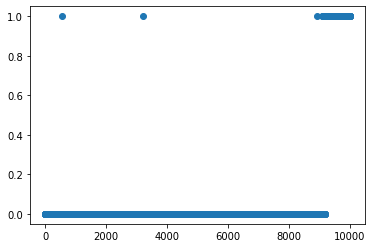

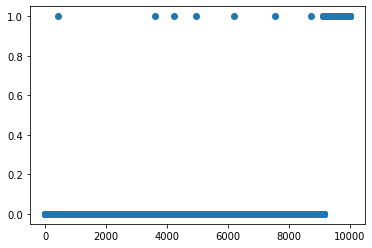

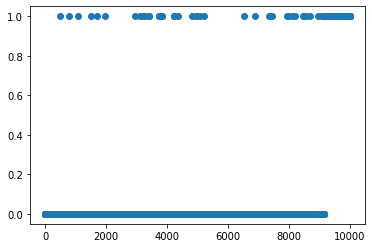

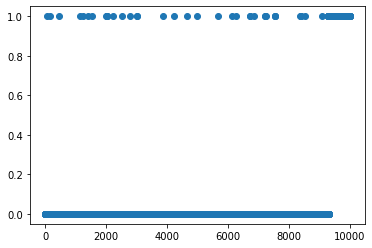

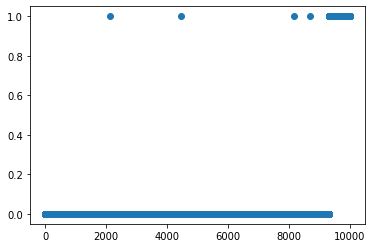

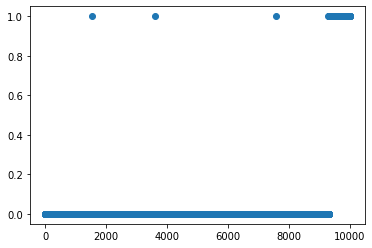

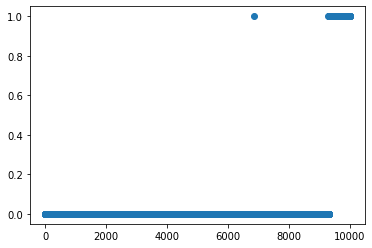

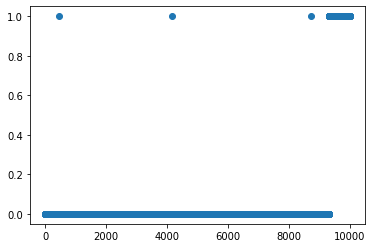

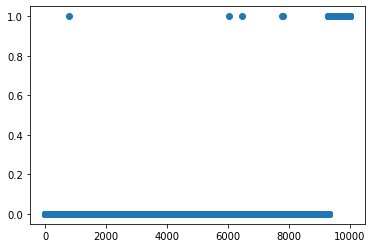

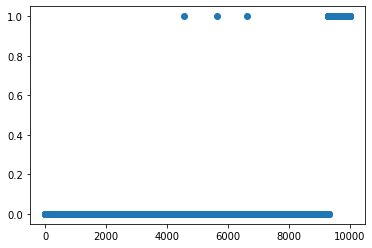

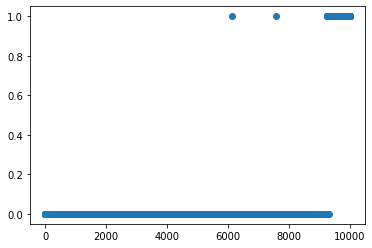

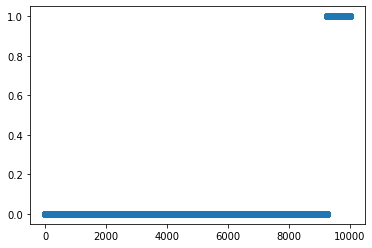

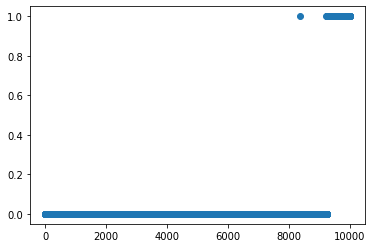

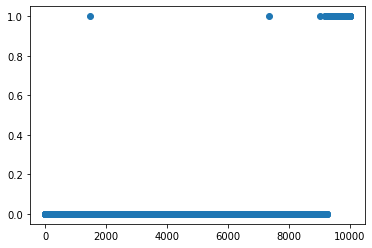

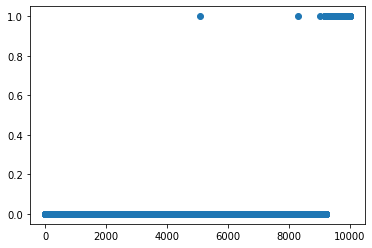

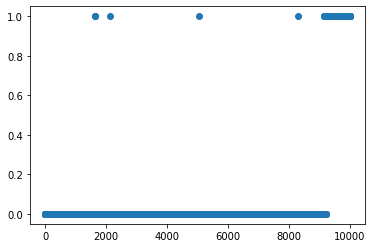

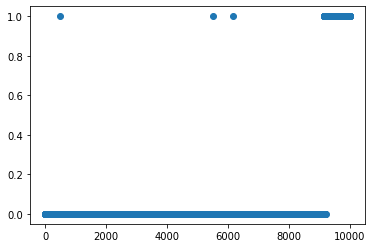

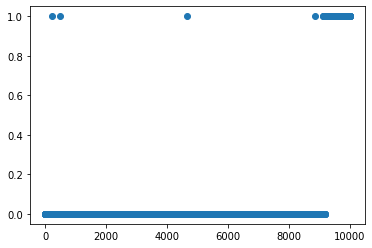

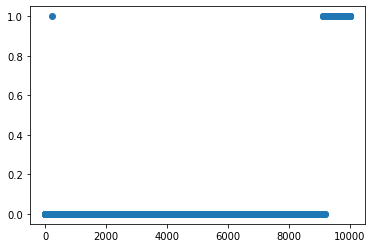

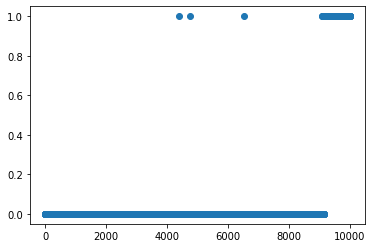

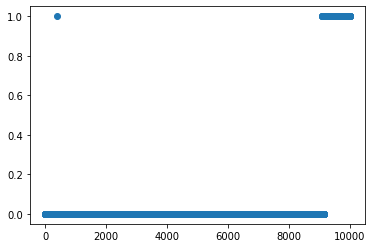

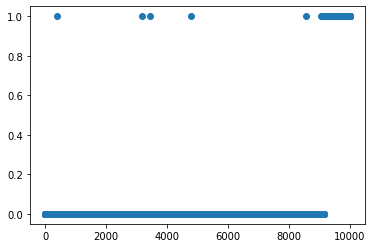

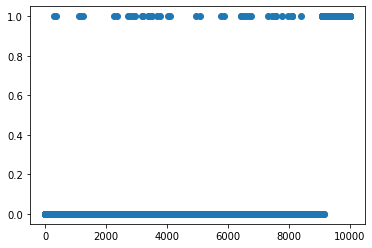

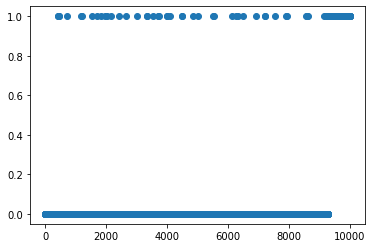

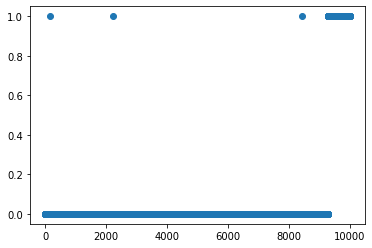

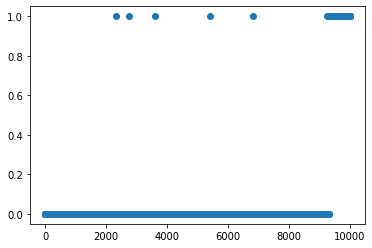

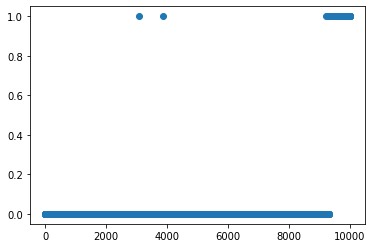

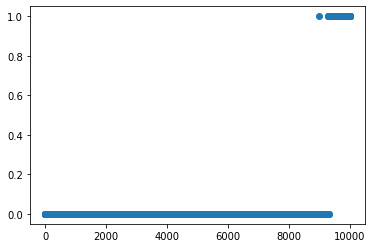

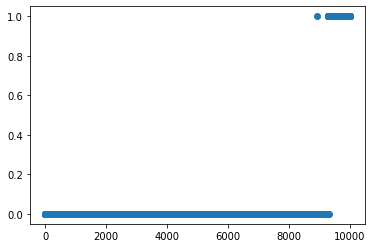

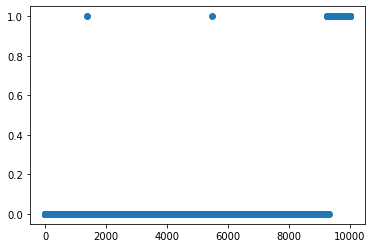

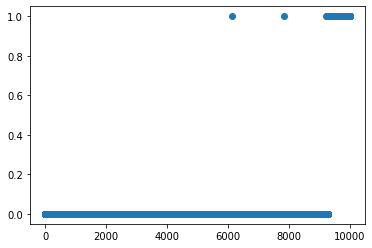

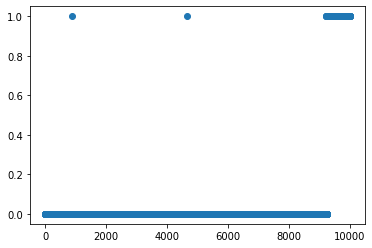

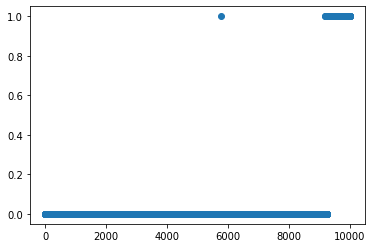

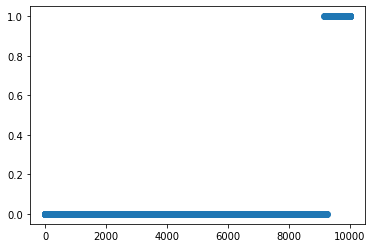

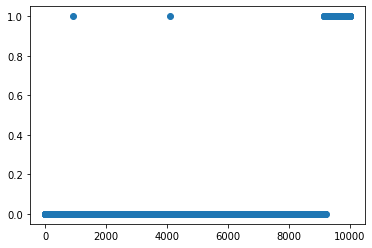

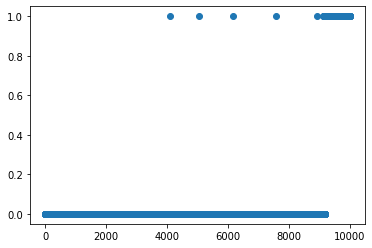

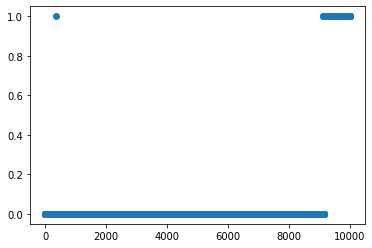

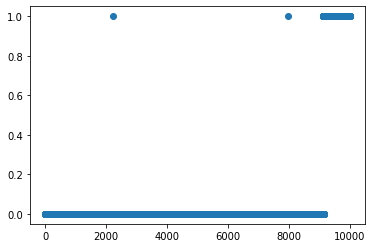

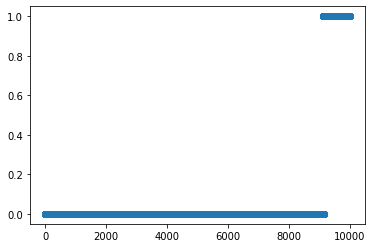

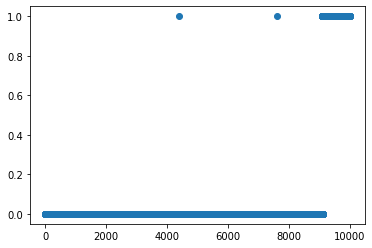

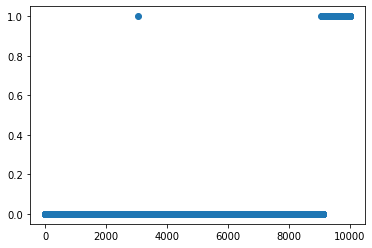

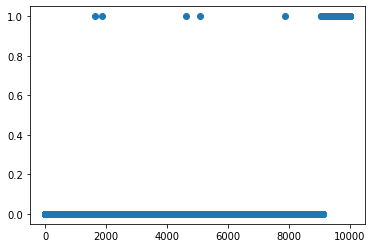

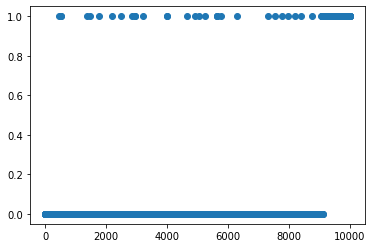

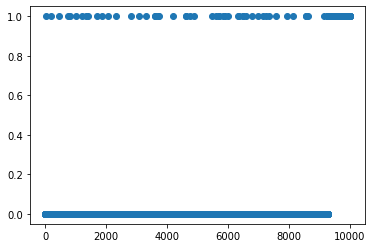

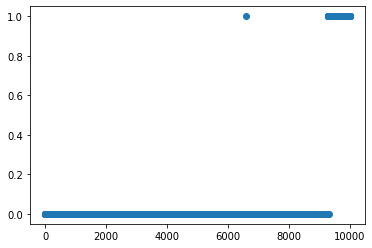

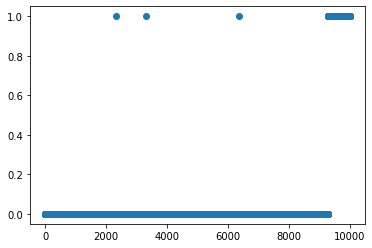

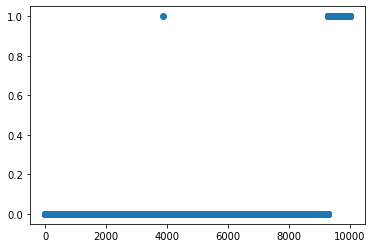

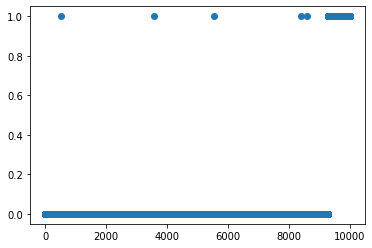

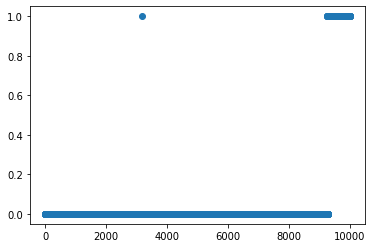

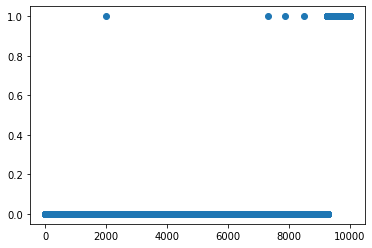

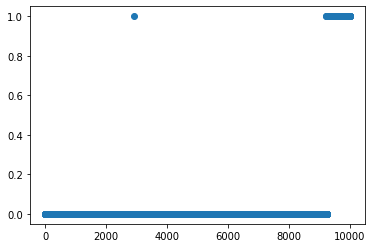

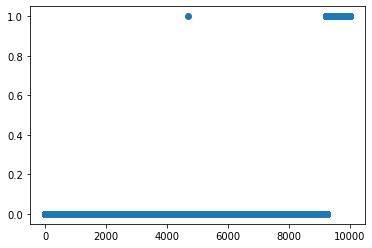

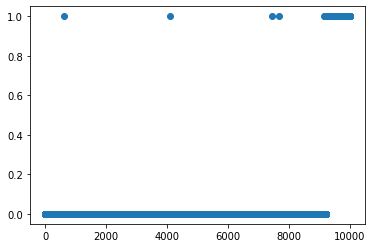

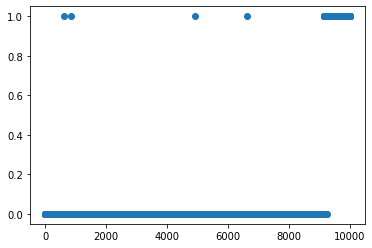

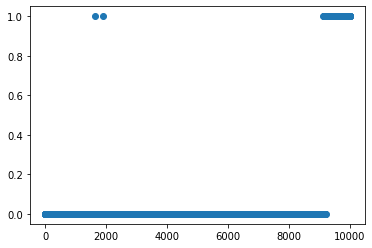

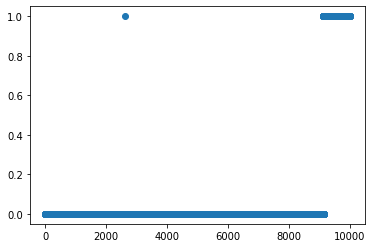

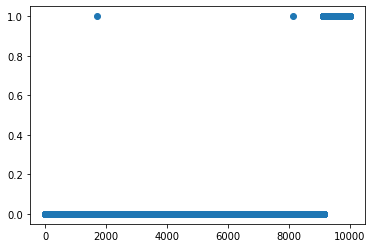

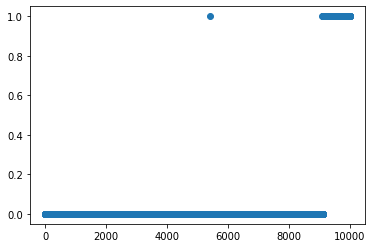

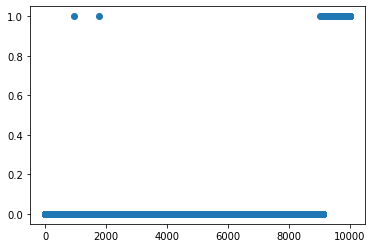

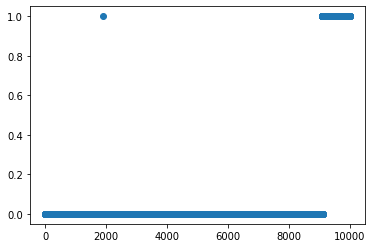

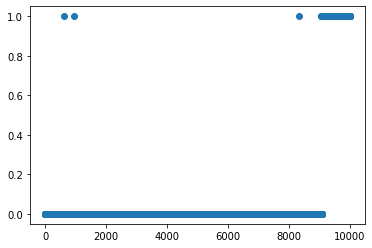

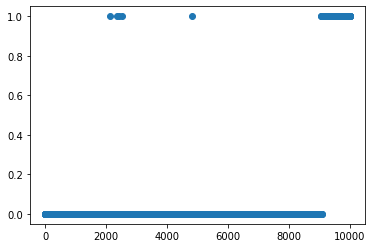

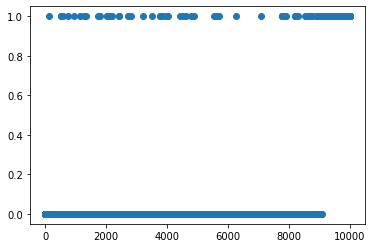

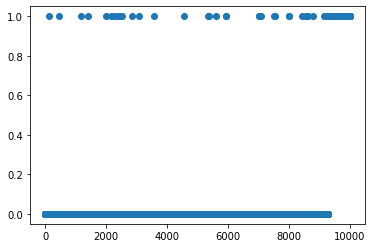

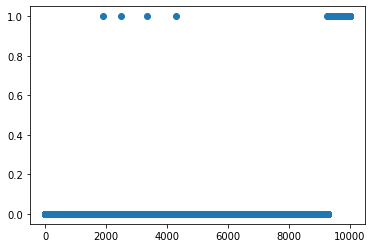

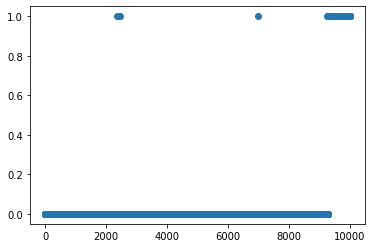

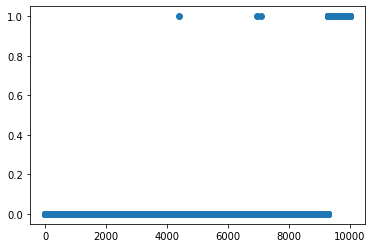

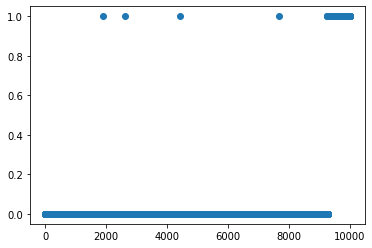

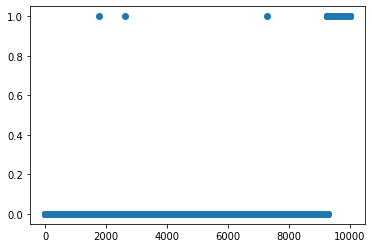

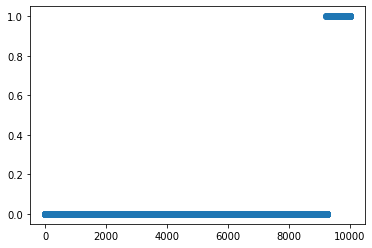

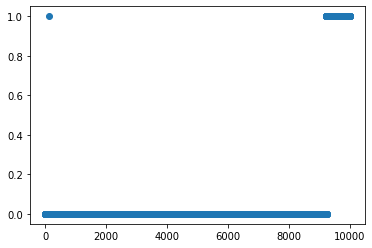

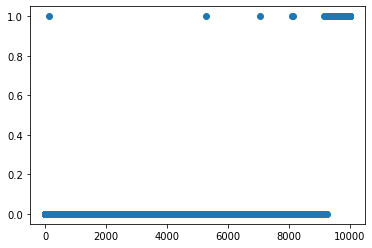

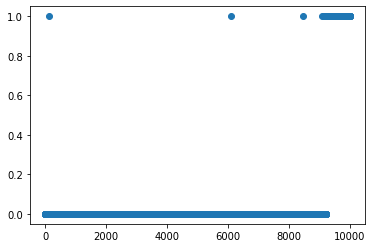

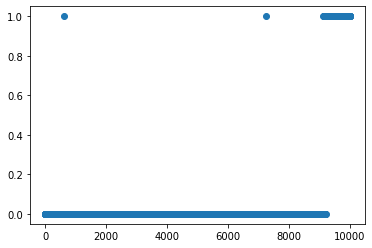

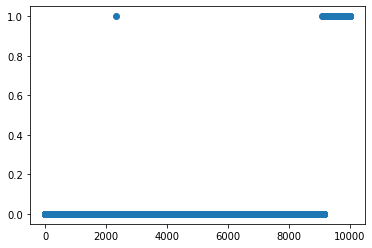

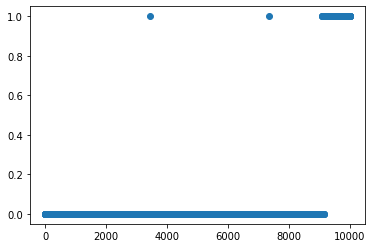

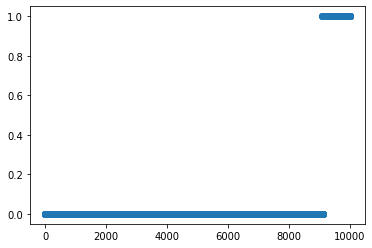

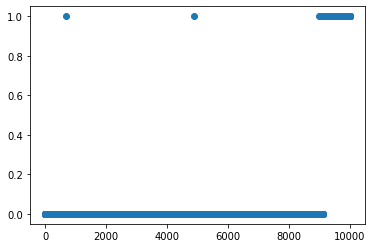

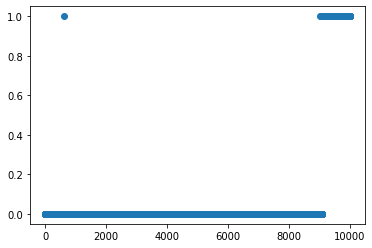

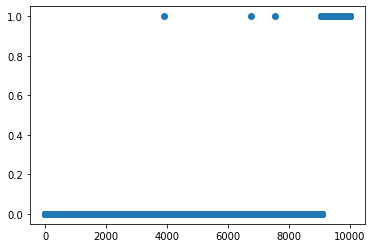

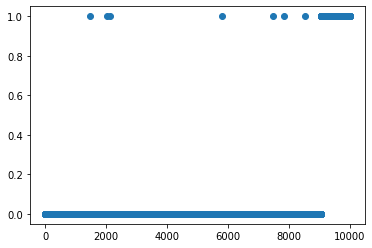

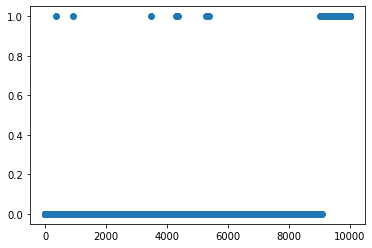

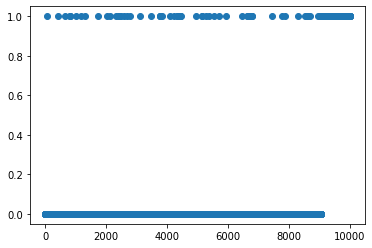

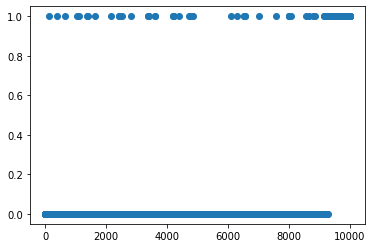

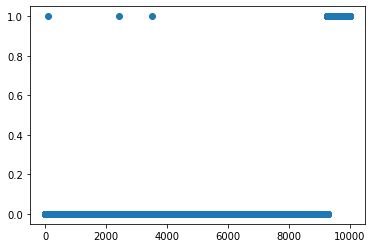

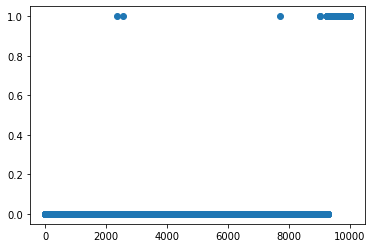

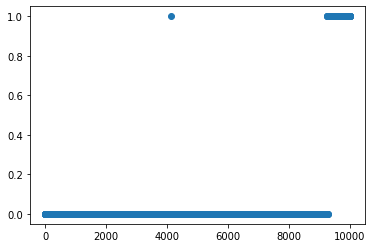

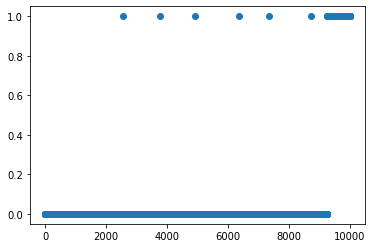

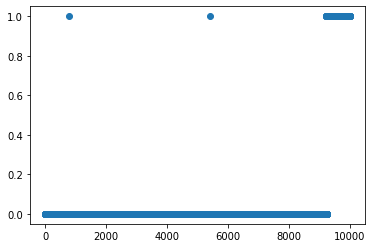

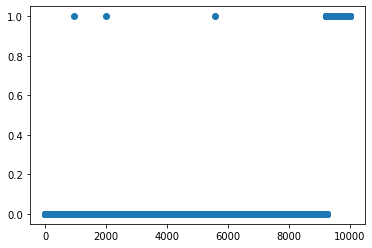

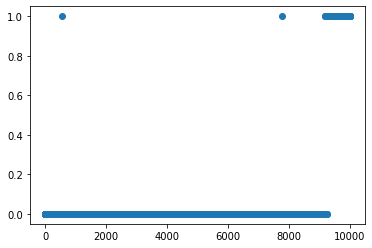

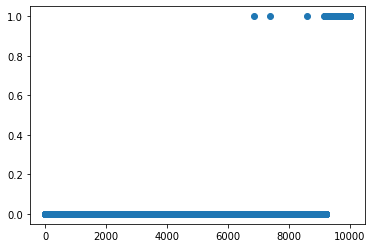

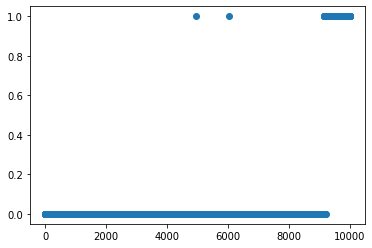

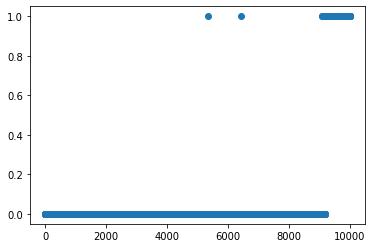

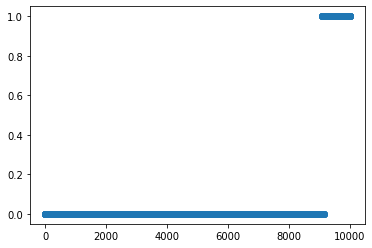

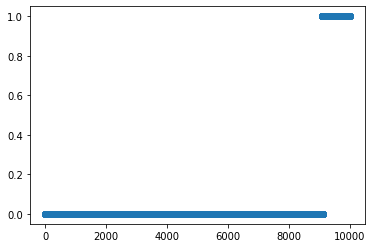

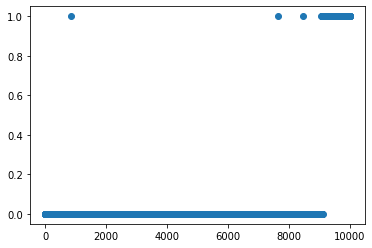

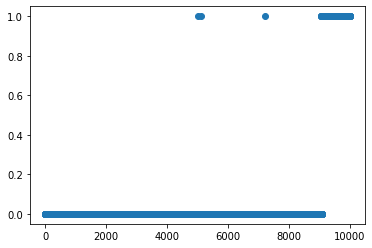

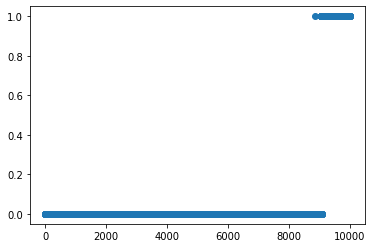

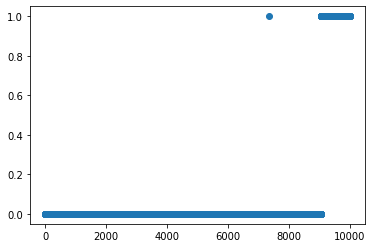

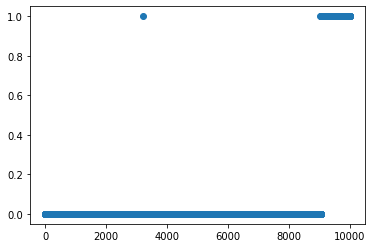

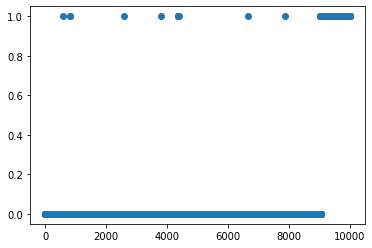

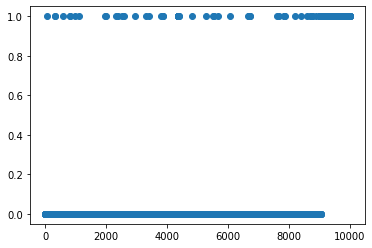

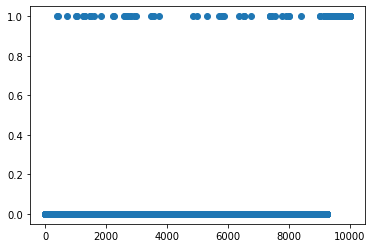

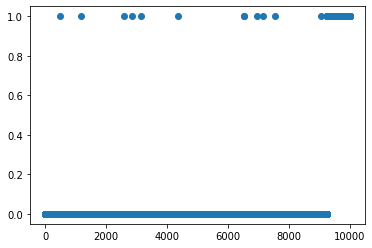

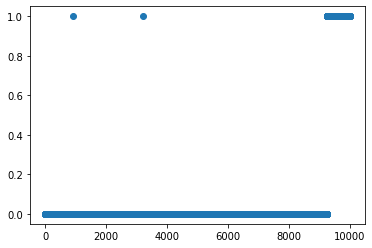

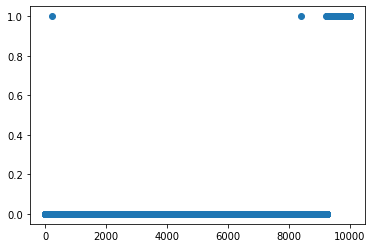

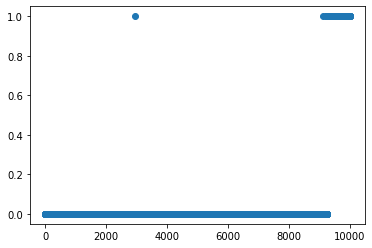

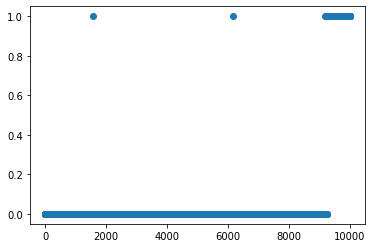

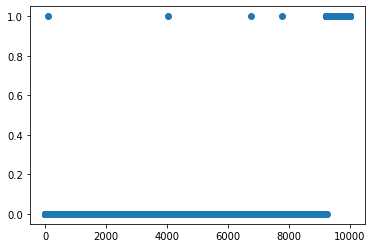

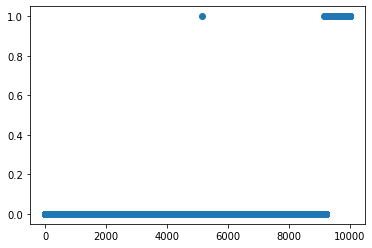

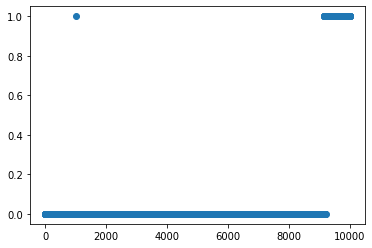

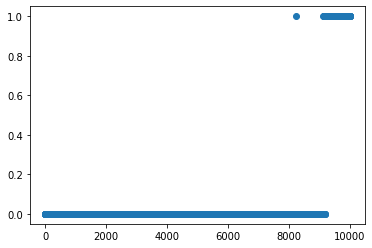

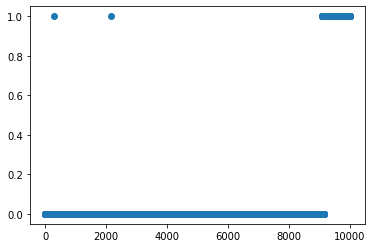

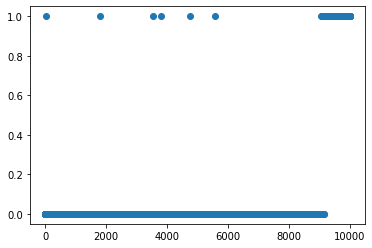

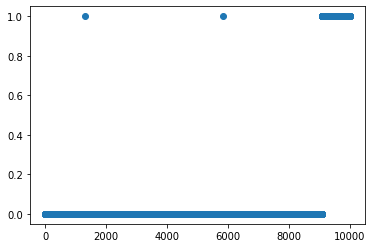

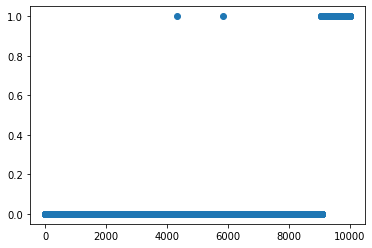

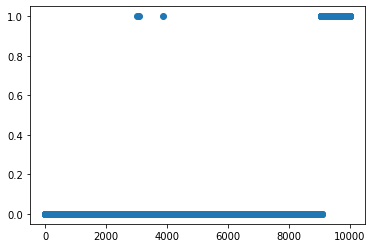

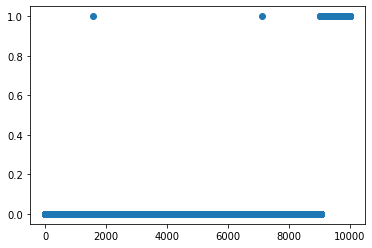

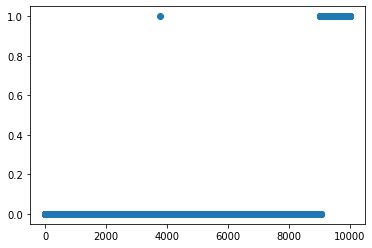

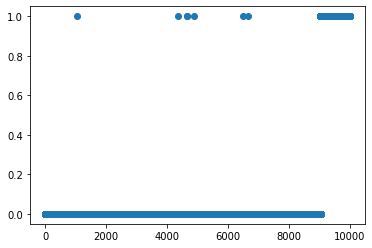

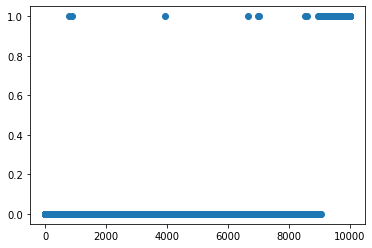

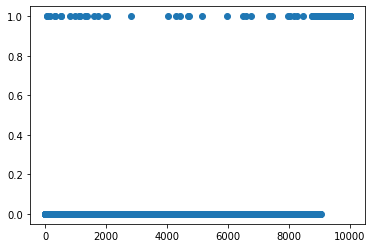

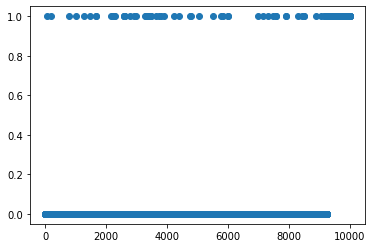

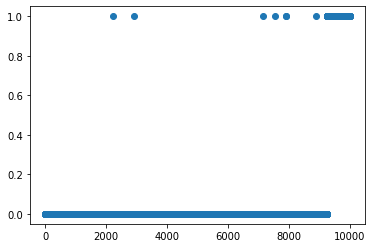

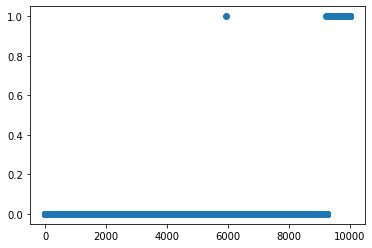

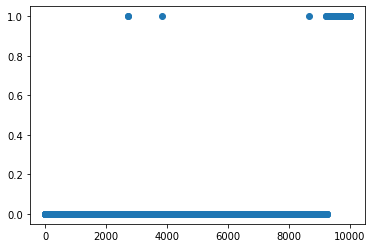

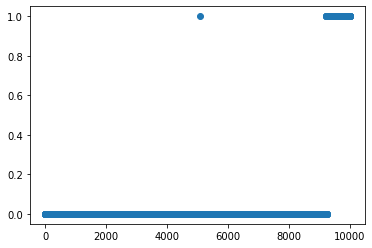

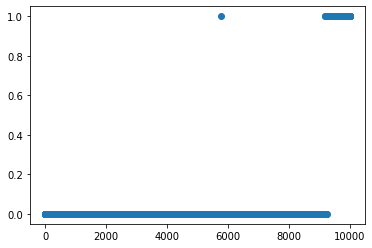

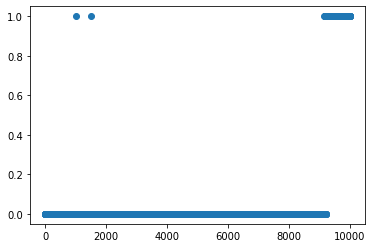

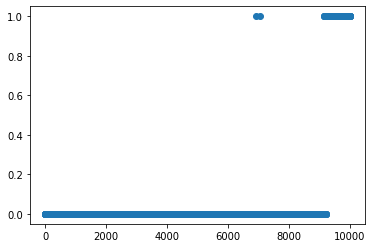

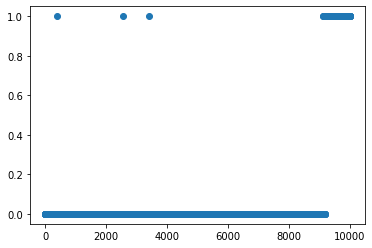

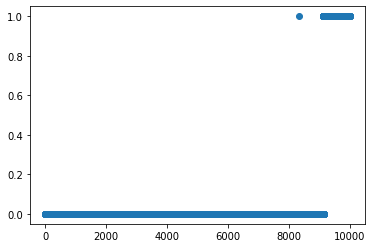

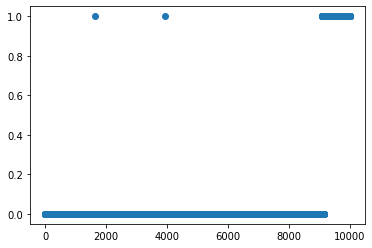

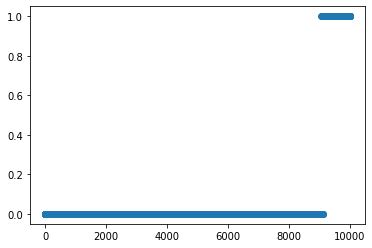

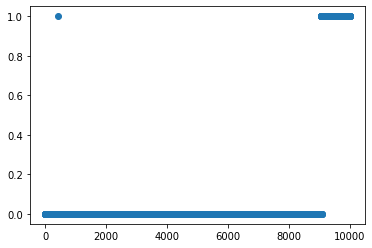

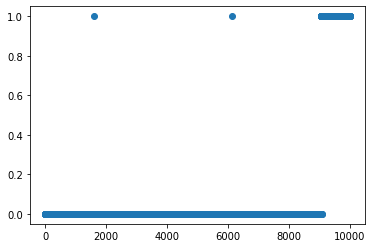

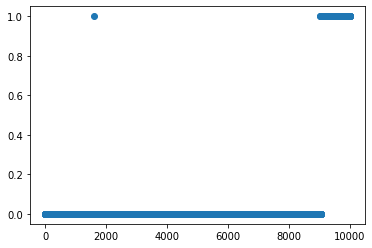

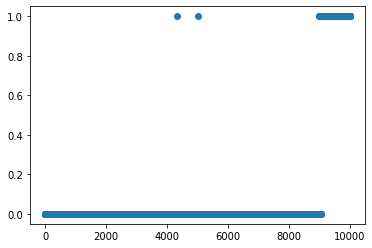

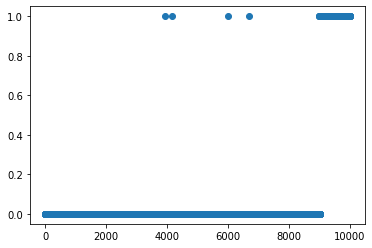

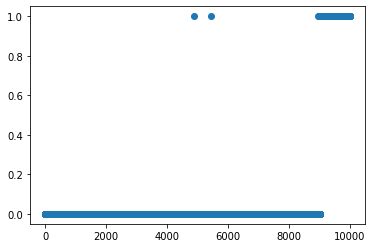

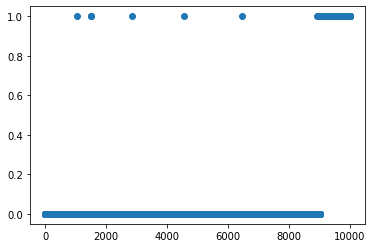

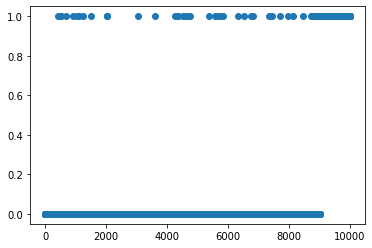

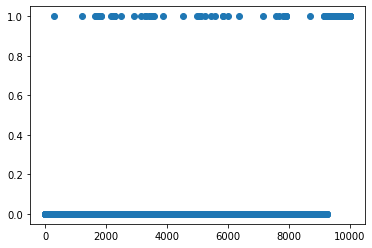

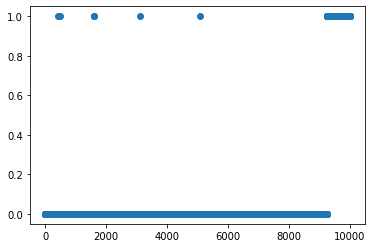

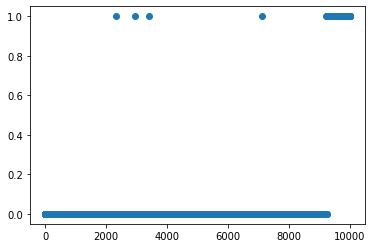

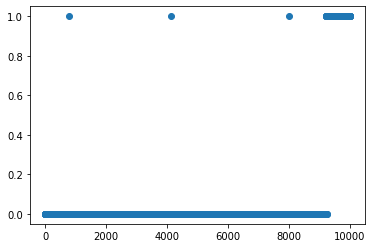

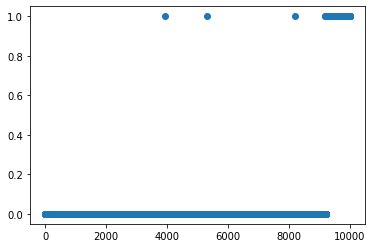

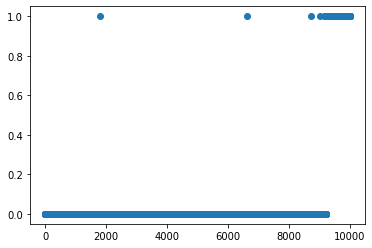

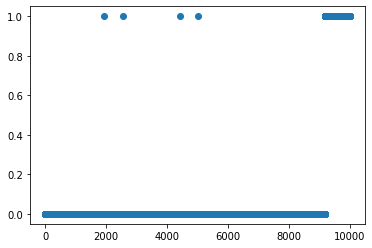

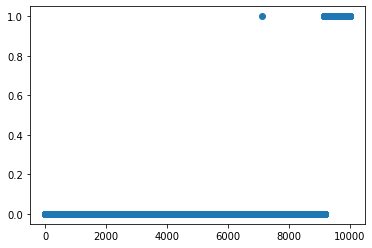

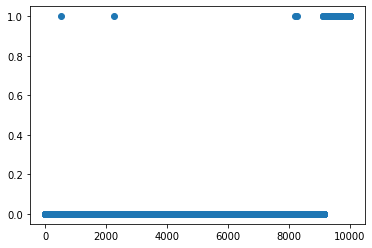

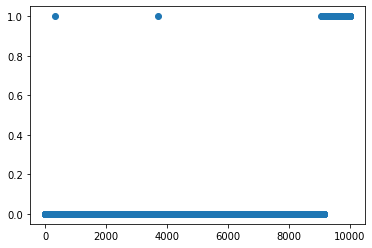

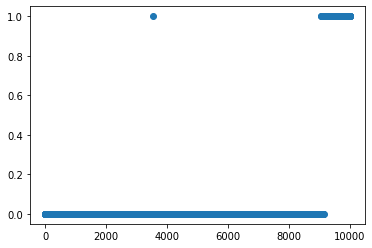

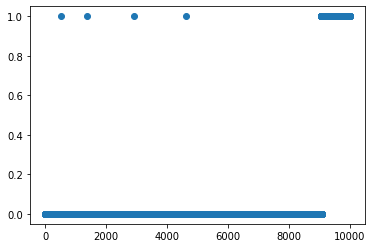

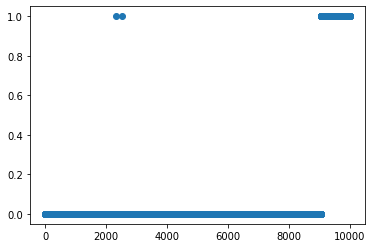

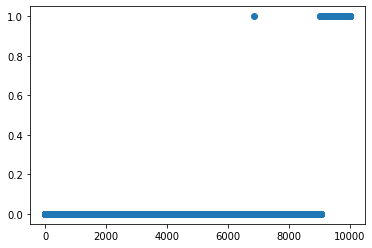

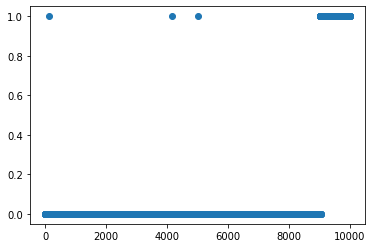

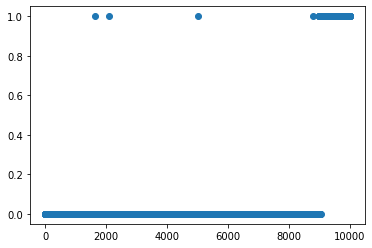

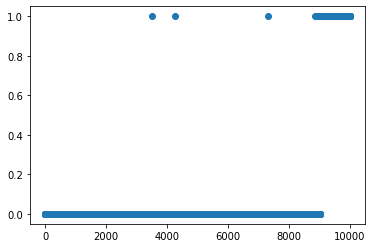

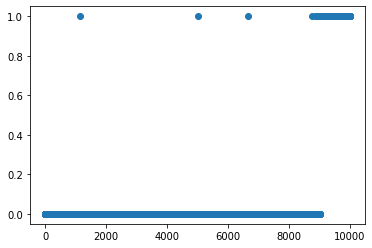

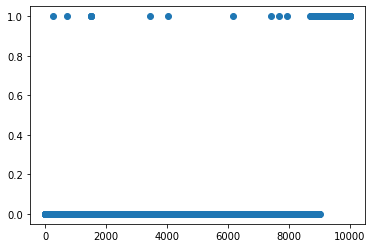

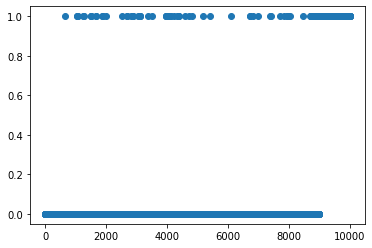

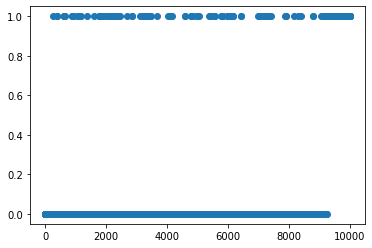

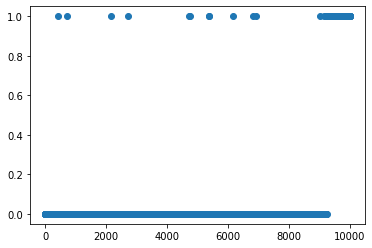

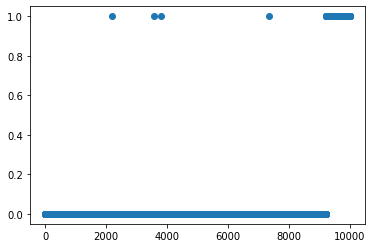

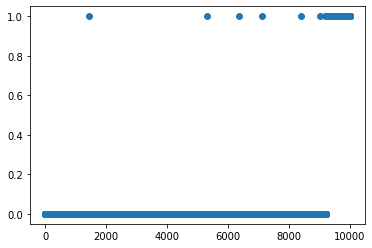

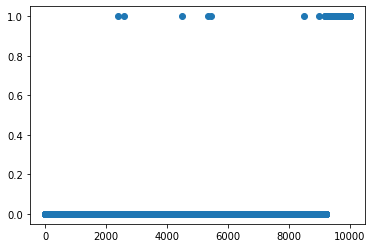

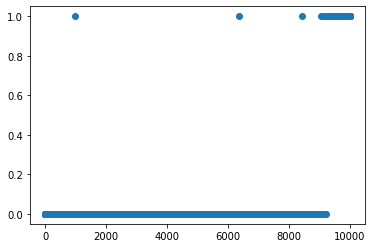

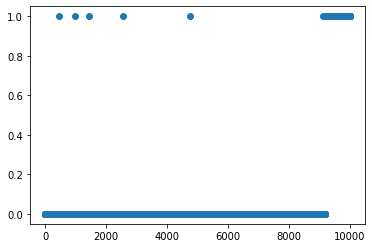

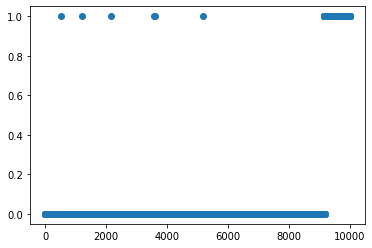

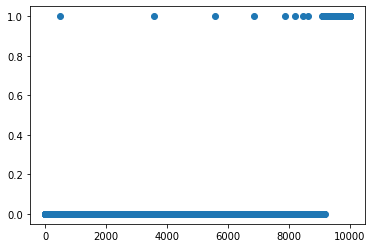

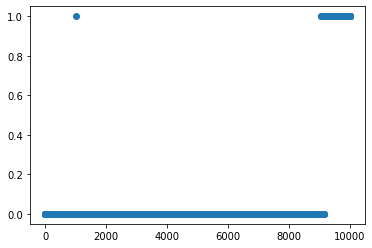

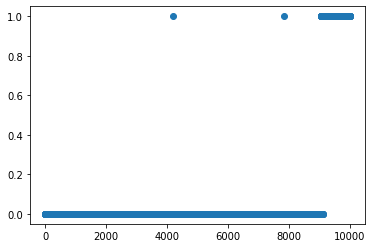

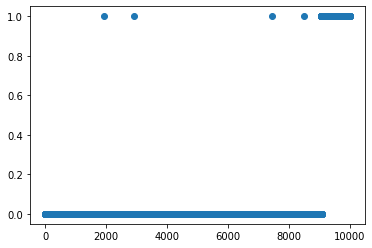

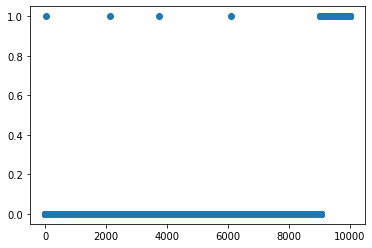

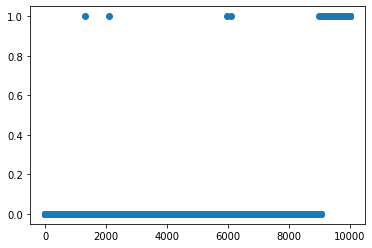

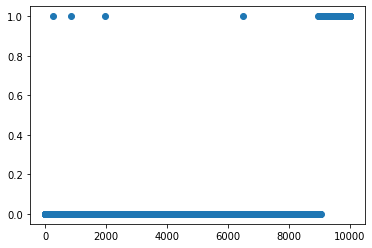

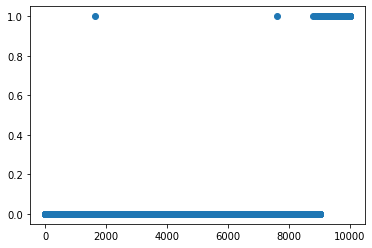

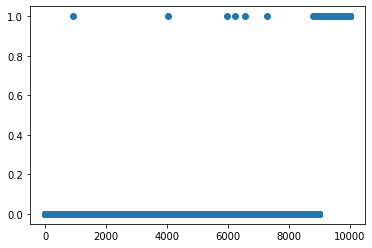

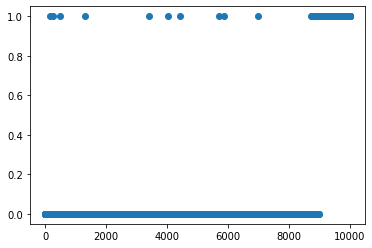

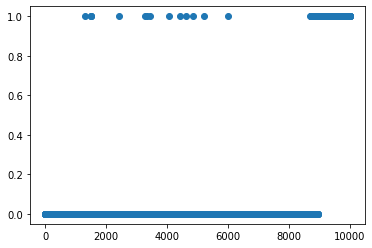

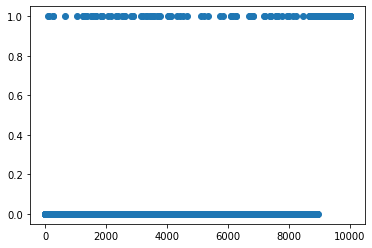

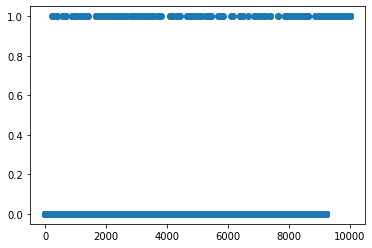

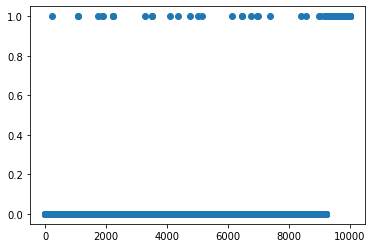

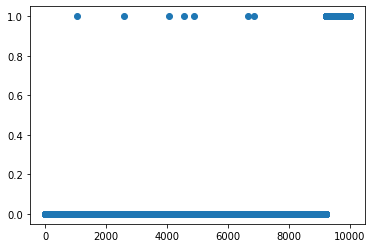

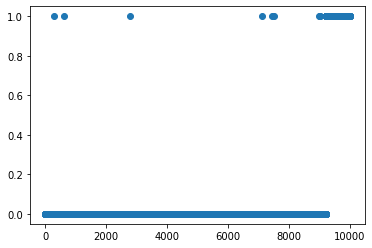

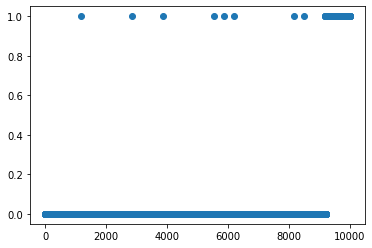

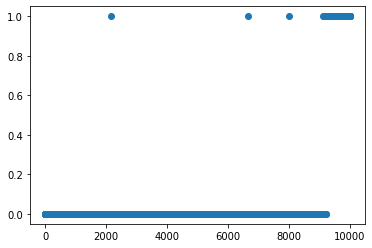

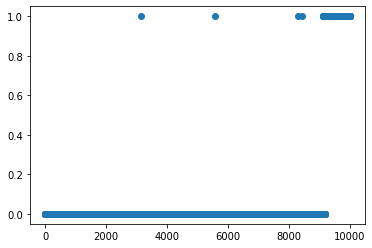

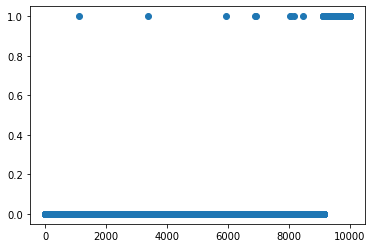

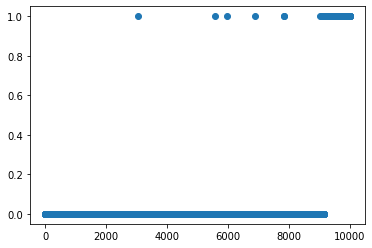

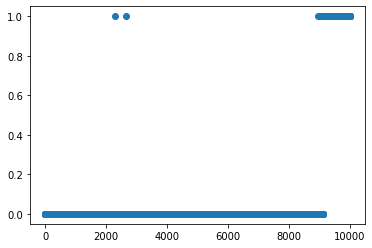

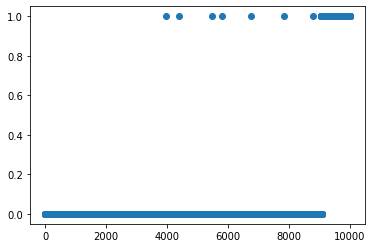

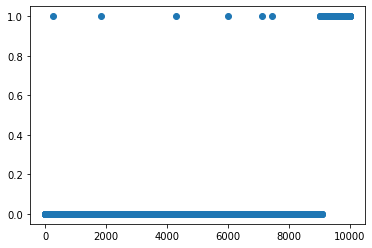

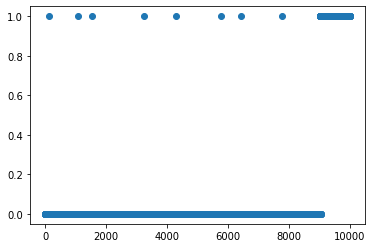

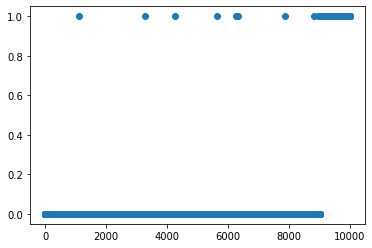

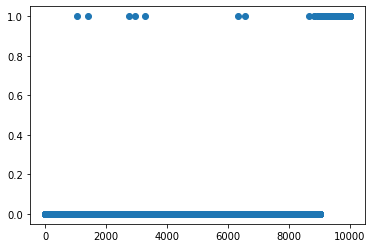

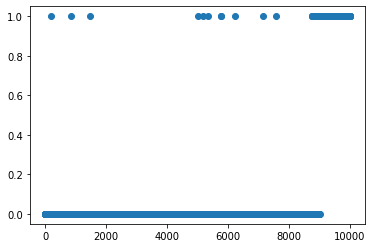

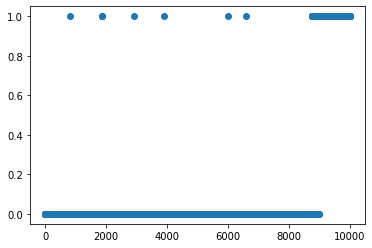

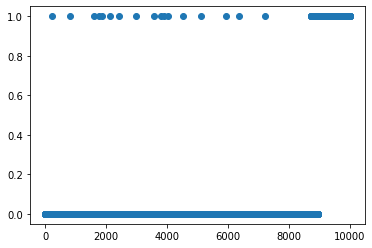

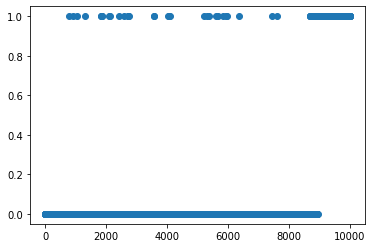

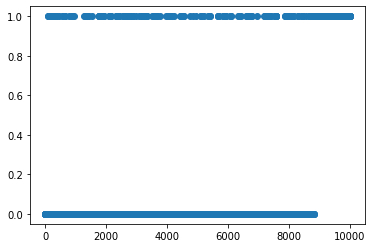

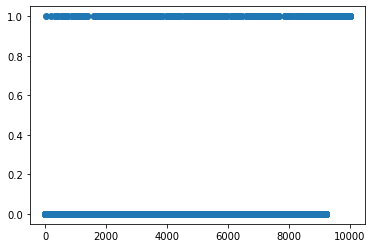

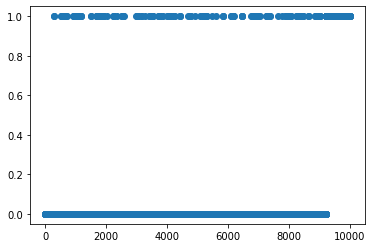

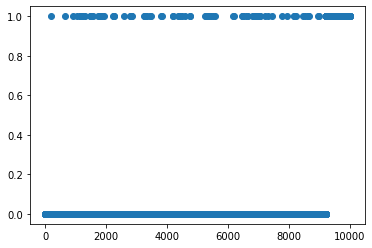

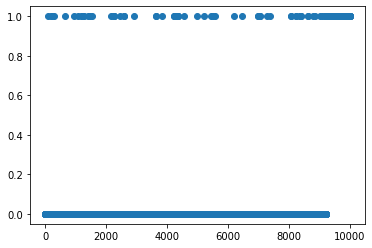

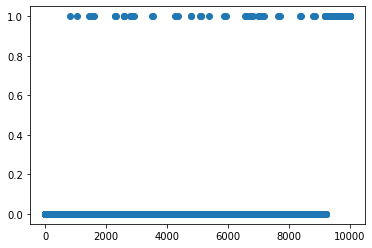

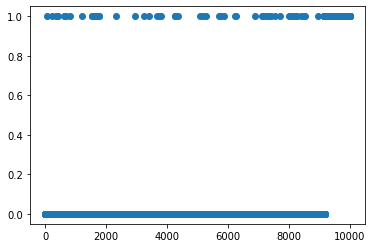

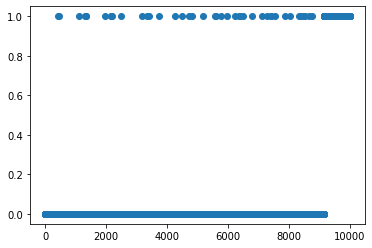

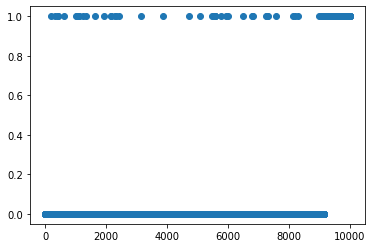

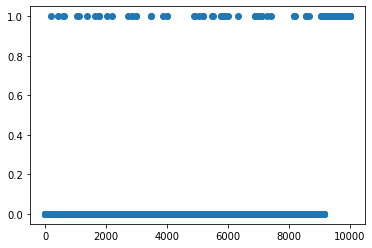

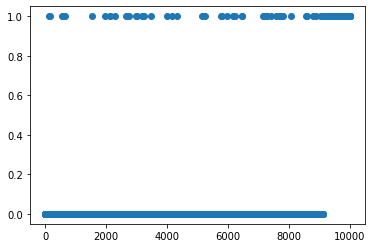

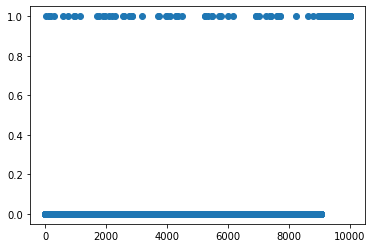

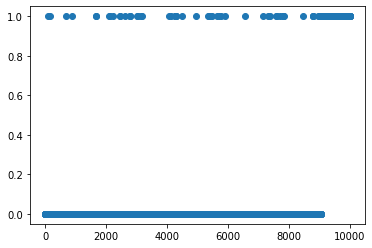

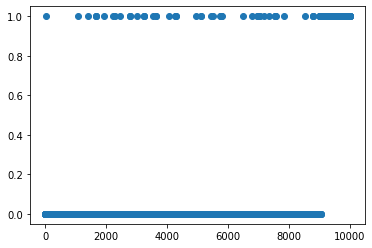

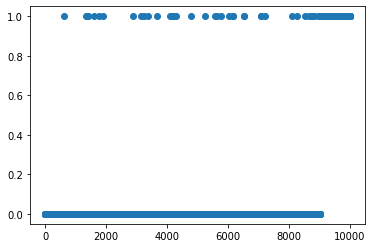

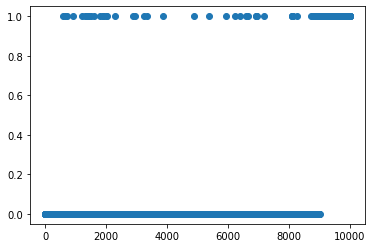

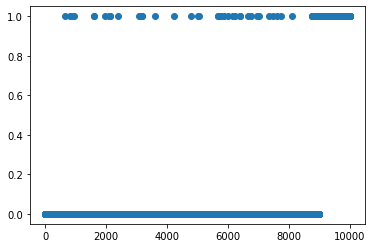

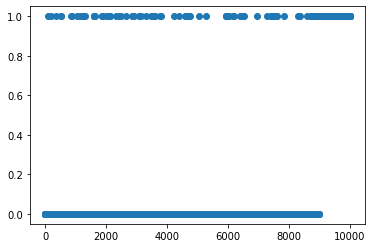

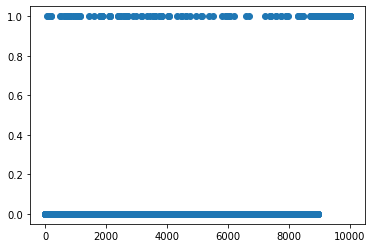

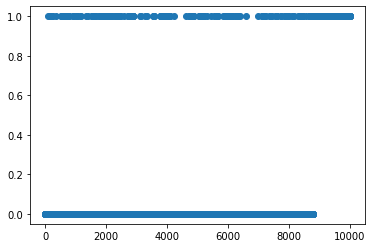

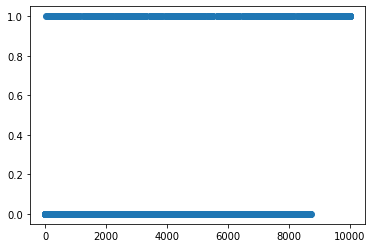

In [ ]:
for i in range(nodes):
  plt.scatter(np.arange(10000),arr[::,i])
  plt.show()

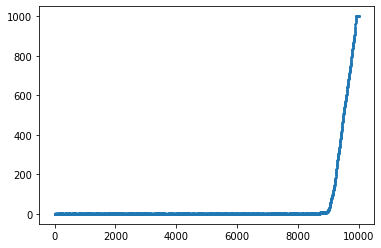

In [ ]:
s=arr.sum(1) #[ 390,  774,  827, 1271, 2650, 3543, 4275, 5547, 6477, 7777, 8800, 9223, 9235, 9318, 9659, 9895
plt.scatter(np.arange(10000),s,s=1)

In [ ]:
df=pd.DataFrame(arr)

In [ ]:
df.to_csv("arr.csv")

'ax.text(11,10000,"|")\nax.text(64,10000,"|")\nax.text(563,10000,"|")\nax.text(1091,10000,"|")\nax.text(1113,10000,"|")\nax.text(1117,10000,"|")\nax.text(11,10400,"1")\nax.text(64,10400,"2")\nax.text(563,10400,"3")\nax.text(1091,10400,"4")\nax.text(1113,10400,"5")\nax.text(1117,10400,"6")\n#ax.set(xticks=[0,500,1071],yticks=[0,5000,10000])'

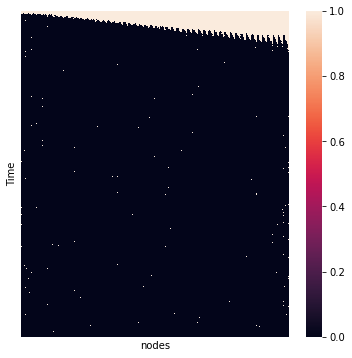

In [ ]:
#dff=pd.DataFrame(arr)
fig = plt.figure(figsize=(6,6))   
ax = fig.gca()
sn.heatmap(arr, annot = False,xticklabels=False, yticklabels=False)
#ax.set_xlabel("k")
#ax.set_xticks([0,3,6])
font_d = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 26}
ax.set(xlabel="nodes", ylabel="Time")

"""ax.text(11,10000,"|")
ax.text(64,10000,"|")
ax.text(563,10000,"|")
ax.text(1091,10000,"|")
ax.text(1113,10000,"|")
ax.text(1117,10000,"|")
ax.text(11,10400,"1")
ax.text(64,10400,"2")
ax.text(563,10400,"3")
ax.text(1091,10400,"4")
ax.text(1113,10400,"5")
ax.text(1117,10400,"6")
#ax.set(xticks=[0,500,1071],yticks=[0,5000,10000])"""

[Text(120.5, 0.5, 'Country Name'),
 Text(0.5, 77.0, 'Years'),
 Text(0.5, 1.0, 'Heatmap')]

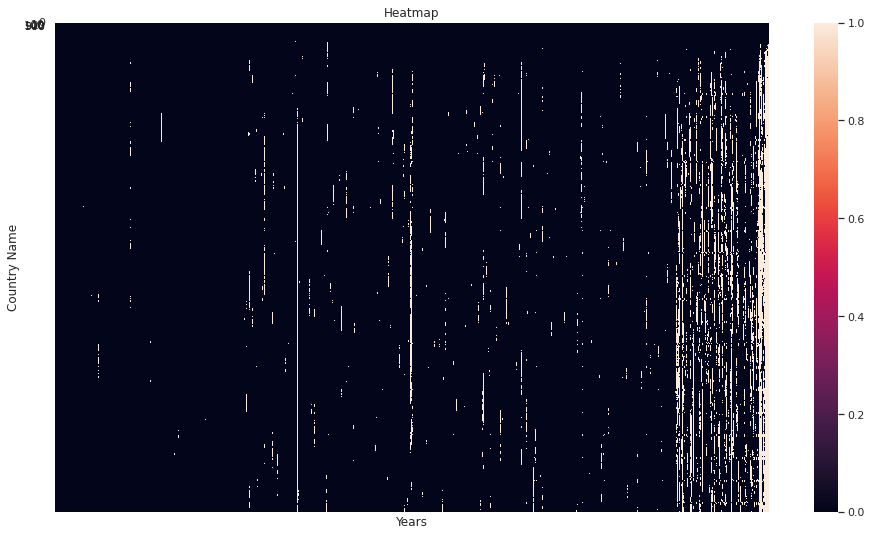

In [ ]:
plt.figure(figsize=(16,9))
 
ax = sn.heatmap(dff,xticklabels=False, yticklabels=[0,"","","",10,20,100,500,900])
 
ax.set(title="Heatmap",
      xlabel="Years",
      ylabel="Country Name",)

In [ ]:
t=Each_node_TimeS[0][1000:]
len(t)

9000

In [ ]:
new_TimeS={}
for i in Each_node_TimeS:
  new_TimeS[i]=Each_node_TimeS[i][1000:]

In [ ]:
import Stats_EE_recurr_cal

In [ ]:
mean_walkers_dic,std_walkers_dic=Stats_EE_recurr_cal.walkers_statistic_nodewise(new_TimeS,nodes)

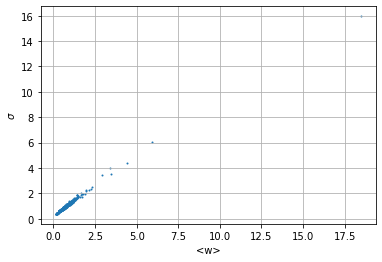

In [ ]:
plt.scatter([mean_walkers_dic[i] for i in mean_walkers_dic],[std_walkers_dic[j] for j in std_walkers_dic],s=1)
plt.xlabel("<w>")
plt.ylabel(r"$\sigma$")
plt.grid()

In [ ]:
nodes_with_same_degrees=Graph_functions.nodes_with_same_Degree(nodes_degree_dict)

In [ ]:
Avg_walk_degreewise,Std_walk_degreewise=Stats_EE_recurr_cal.walkers_statistic_degreewise(nodes_with_same_degrees,mean_walkers_dic ,std_walkers_dic)

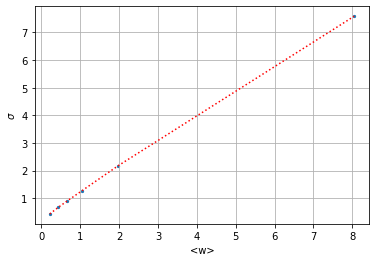

In [ ]:
plt.scatter(Avg_walk_degreewise[::,1],Std_walk_degreewise[::,1],s=5)
plt.plot(Avg_walk_degreewise[::,1],Std_walk_degreewise[::,1],ls=':',c='r')
plt.ylabel(r"$\sigma$")
plt.xlabel("<w>")
plt.grid()

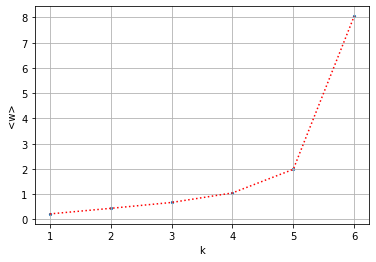

In [ ]:
plt.scatter(Avg_walk_degreewise[::,0],Avg_walk_degreewise[::,1],s=5)
plt.plot(Avg_walk_degreewise[::,0],Avg_walk_degreewise[::,1],ls=':',c='r')
plt.xlabel("k")
plt.ylabel("<w>")
plt.grid()

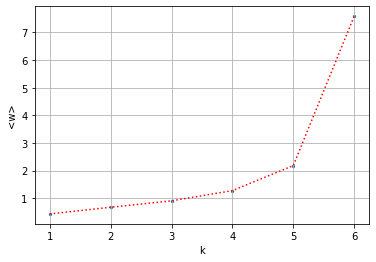

In [ ]:
plt.scatter(Std_walk_degreewise[::,0],Std_walk_degreewise[::,1],s=5)
plt.plot(Std_walk_degreewise[::,0],Std_walk_degreewise[::,1],ls=':',c='r')
plt.xlabel("k")
plt.ylabel(r"$\sigma$")
plt.grid()

In [ ]:
plt.scatter

In [ ]:
thresh_hold_Arr,Extreme_event_nodewise,Extreme_event_prob_degreewise=Stats_EE_recurr_cal.EE_Prob(nodes,nodes_with_same_degrees,4,new_TimeS,mean_walkers_dic ,std_walkers_dic)

In [ ]:
Extreme_event_prob_degreewise

{1: 0.0034694444444444443,
 2: 0.005434547908232119,
 3: 0.005942036463708291,
 4: 0.006314207650273224,
 5: 0.005638888888888889,
 6: 0.0033055555555555555}

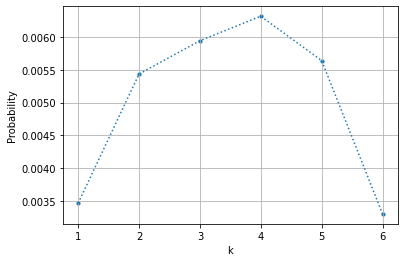

In [ ]:
plt.scatter(Degrees,[Extreme_event_prob_degreewise[i] for i in Extreme_event_prob_degreewise],s=10)
plt.plot(Degrees,[Extreme_event_prob_degreewise[i] for i in Extreme_event_prob_degreewise],ls=':')
plt.xlabel("k")
plt.ylabel("Probability")
plt.grid()

In [ ]:
new_tt=np.zeros(9000)
for node in range(nodes):
      new_tt+=np.array(new_TimeS[node])

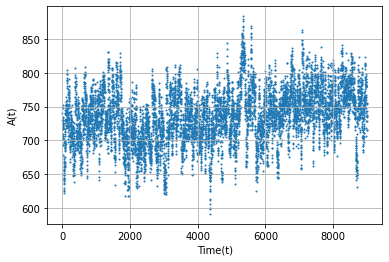

In [ ]:
plt.scatter(np.arange(9000),new_tt,s=1)
plt.xlabel("Time(t)")
plt.ylabel("A(t)")
plt.grid()

In [ ]:
birt_prob=np.array([i/100 for i in range(1,42)])
birt_prob

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41])

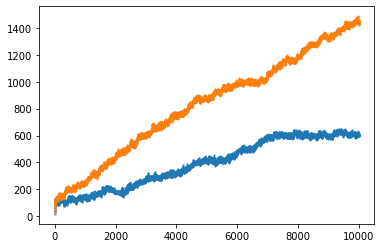

In [ ]:
plt.scatter(np.arange(Time),df["TimeS_"+str(0.020)],s=1)
plt.scatter(np.arange(Time),df["TimeS_"+str(0.022)],s=1)
#plt.yscale('log')

In [ ]:
df.drop(["TimeS_0.001"],axis=1, index=None, columns=None, level=None, inplace=True, errors='raise')


KeyError: ignored

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/outflux_1_cap_10/Mumbai_TimeS_deadP_p2_rejP_p"+str(0)+".csv")

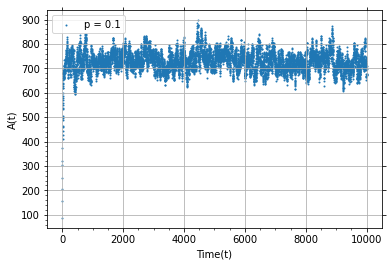

In [ ]:
fig = plt.figure()
ax = fig.gca()
for p in [0.1]:
  plt.scatter(np.arange(10000),df["TimeS_"+str(p)],s=1,label='p = '+str(p))
ax.set_xlabel("Time(t)")
ax.set_ylabel("A(t)")
ax.grid()
ax.legend(loc='best')  
ax.tick_params(bottom=True, top=True, left=True, right=True)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.show()
#plt.show()

In [ ]:
import Stats_EE_recurr_cal

In [ ]:
mean_walkers_dic,std_walkers_dic=Stats_EE_recurr_cal.walkers_statistic_nodewise(DTRW_time_series_dict,nodes):


In [ ]:
nodes=1000

In [ ]:
birt_prob=np.round_(np.arange(0.02,0.98,0.02),2)
birt_prob

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96])

#Different rejection probability

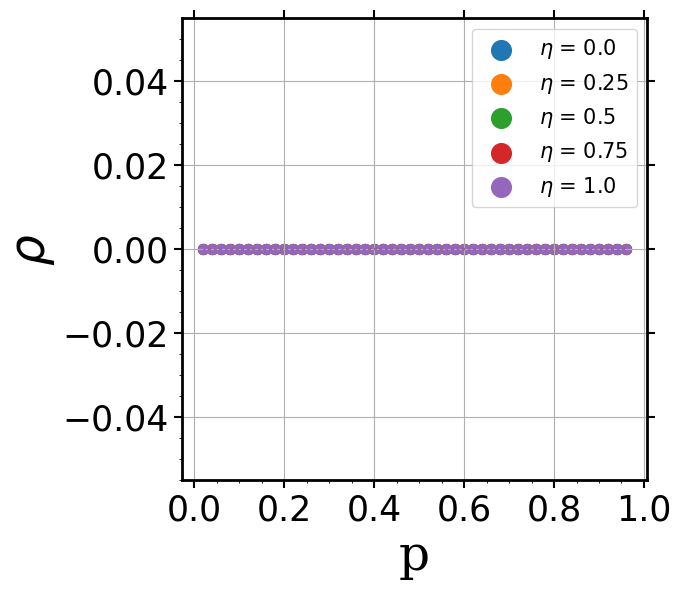

In [ ]:
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 35}
fig = plt.figure(figsize=(6,6))   
ax = fig.gca()
for i,j in zip([0,25,50,75,100],["0","0.25","0.5","0.75","1"]):  #2D_latticeTimeS_OutF_Deg_cap_3Deg_deadP_p2_rejP_p25.csv
  df=pd.read_csv("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/outflux_cap_/SF_1000_nodes_m_5_seed_6TimeS_OutF_1Deg_cap_1Deg_deadP_p2_rejP_"+str(j)+".csv")
  order_para=[] 
  for p in birt_prob: #SF_1000_nodes_m_5_seed_6TimeS_OutF_2_cap_10_deadP_p2_rejP_1
    order_para.append(order_para3(df["TimeS_"+str(p)],p,nodes))
  order_para=np.round_(np.array(order_para),3) 
  plt.scatter(birt_prob,order_para,s=50,label=r"$\eta$ = "+str(i/100)) 
  plt.plot(birt_prob,order_para,ls=':') 
ax.set_xlabel("p",font)
ax.set_ylabel(r"$\rho$",font)
ax.grid()
ax.legend(loc='best',fontsize=15,markerscale=2,frameon=True)  
ax.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
ax.have applied for thespines[['left','right','bottom','top']].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
birt_prob=np.round_(np.arange(0.01,0.42,0.01),2)
birt_prob

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41])

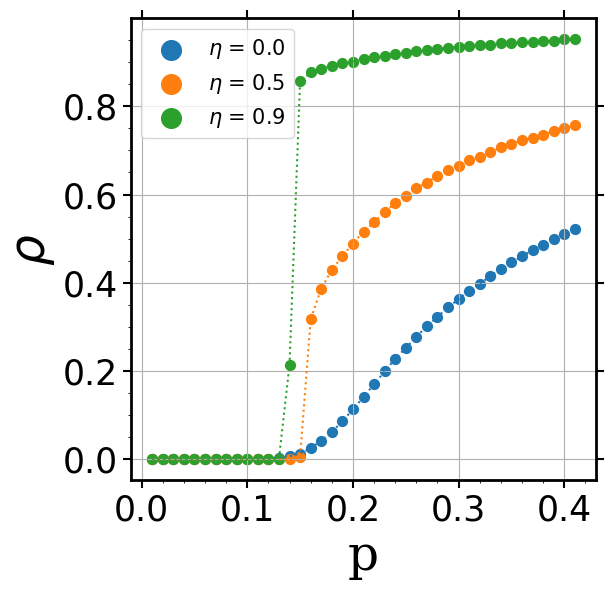

In [ ]:
nodes=1071
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 35}
fig = plt.figure(figsize=(6,6))   
ax = fig.gca()
for i,j in zip([0,50,90],["p0","p5","p9"]):  #Ahmedabad_TimeS_deadP_p2_rejP_p5
  df=pd.read_csv("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/outflux_1_cap_10/Mumbai_TimeS_deadP_p2_rejP_"+str(j)+".csv")
  order_para=[] 
  for p in birt_prob: #SF_1000_nodes_m_5_seed_6TimeS_OutF_2_cap_10_deadP_p2_rejP_1
    order_para.append(order_para3(df["TimeS_"+str(p)],p,nodes))
  order_para=np.round_(np.array(order_para),3) 
  plt.scatter(birt_prob,order_para,s=50,label=r"$\eta$ = "+str(i/100)) 
  plt.plot(birt_prob,order_para,ls=':') 
ax.set_xlabel("p",font)
ax.set_ylabel(r"$\rho$",font)
ax.grid()
ax.legend(loc='best',fontsize=15,markerscale=2,frameon=True)  
ax.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
ax.spines[['left','right','bottom','top']].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.xticks([0,0.10,0.20,0.30,0.40],fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 20}
fig = plt.figure(figsize=(6,6))   
ax = fig.gca()
for i in [1,2,4,6,8,10]:  #2D_latticeTimeS_OutF_Deg_cap_3Deg_deadP_p2_rejP_p25.csv
  df=pd.read_csv("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/outflux_cap_/2D_latticeTimeS_OutF_"+str(i)+"_cap_10_deadP_p2_rejP_1.csv")
  order_para=[]
  for p in birt_prob: 
    order_para.append(order_para3(df["TimeS_"+str(p)],p,nodes))
  order_para=np.round_(np.array(order_para),3) 
  plt.scatter(birt_prob,order_para,s=5,label="r = "+str(i)) 
  plt.plot(birt_prob,order_para,ls=':') 
ax.set_xlabel("p",font)
ax.set_ylabel(r"$\rho$",font)
ax.grid()
ax.legend(loc='best',fontsize=15,markerscale=2)  
ax.tick_params(bottom=True, top=True, left=True, right=True,)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
df

Unnamed: 0  TimeS_0.02  TimeS_0.04  TimeS_0.06  TimeS_0.08  TimeS_0.1  \
0               0          17          28          47          60         88   
1               1          30          56          77         120        157   
2               2          49          77         102         152        201   
3               3          54          83         136         190        225   
4               4          62          91         149         226        258   
...           ...         ...         ...         ...         ...        ...   
99995       99995          92         165         248         316        424   
99996       99996          97         177         255         312        430   
99997       99997          92         165         260         312        430   
99998       99998          88         171         260         297        438   
99999       99999          83         171         260         290        418   

       TimeS_0.12  TimeS_0.14  TimeS_0.16  TimeS_0.18  ...  TimeS_0.78  \
0              98         102         133         133  ...         622   
1             180         195         253         248  ...        1121   
2             241         298         329         351  ...        1544   
3             295         338         395         450  ...        1861   
4             341         392         454         534  ...        2100   
...           ...         ...         ...         ...  ...         ...   
99995         516         600         635         720  ...        3139   
99996         517         599         625         728  ...        3138   
99997         497         571         634         735  ...        3146   
99998         511         574         618         746  ...        3158   
99999         496         574         625         725  ...        3188   

       TimeS_0.8  TimeS_0.82  TimeS_0.84  TimeS_0.86  TimeS_0.88  TimeS_0.9  \
0            640         639         667         695         699        721   
1           1148        1171        1234        1251        1235       1273   
2           1546        1605        1697        1678        1698       1723   
3           1840        1954        2022        2045        2042       2096   
4           2101        2189        2299        2323        2312       2411   
...          ...         ...         ...         ...         ...        ...   
99995       3154        3270        3349        3474        3485       3508   
99996       3180        3273        3348        3433        3514       3547   
99997       3175        3226        3340        3435        3510       3554   
99998       3150        3220        3360        3482        3539       3534   
99999       3148        3253        3352        3474        3543       3551   

       TimeS_0.92  TimeS_0.94  TimeS_0.96  
0             744         757         770  
1            1368        1337        1352  
2            1838        1812        1820  
3            2222        2258        2238  
4            2476        2544        2574  
...           ...         ...         ...  
99995        3614        3772        3876  
99996        3652        3821        3873  
99997        3692        3816        3878  
99998        3657        3816        3883  
99999        3669        3750        3925  

[100000 rows x 49 columns]

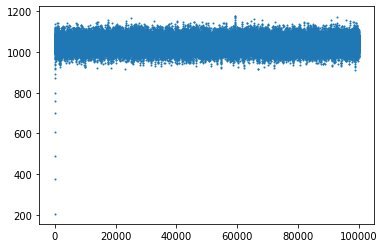

In [ ]:
plt.scatter(np.arange(0,100000,1),df["TimeS_0.26"],s=1)

In [ ]:
df["TimeS_0.12"]

0        100
1        160
2        229
3        271
4        325
        ... 
99995    502
99996    486
99997    488
99998    481
99999    491
Name: TimeS_0.12, Length: 100000, dtype: int64

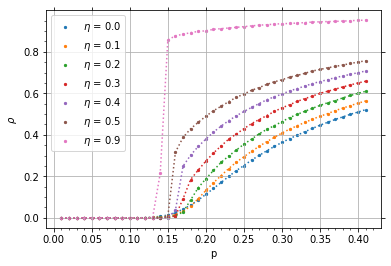

In [ ]:
fig = plt.figure()
ax = fig.gca()
for i in [0,1,2,3,4,5,9]:  
  df=pd.read_csv("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/Mumbai_TimeS_deadP_p2_rejP_p"+str(i)+".csv")
  order_para=[]
  for p in birt_prob:
    order_para.append(order_para3(df["TimeS_"+str(p)],p,nodes))
  plt.scatter(birt_prob,order_para,s=5,label=r"$\eta$ = "+str(i/10)) 
  plt.plot(birt_prob,order_para,ls=':')  
ax.set_xlabel("p")
ax.set_ylabel(r"$\rho$")
ax.grid()
ax.legend(loc='best')  
ax.tick_params(bottom=True, top=True, left=True, right=True)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.spines[['left','right','bottom','top']].set_linewidth(2)
plt.show()

In [ ]:
df=pd.read_csv("/content/Ahmedabad_TimeS_OutF_3Deg_cap_3Deg_deadP_p2_rejP_1.csv")
order_para=[]
for p in birt_prob:
  order_para.append(order_para3(df["TimeS_"+str(p)],p,1064))

In [ ]:
def order_para1(TimeS,p,tau,N):
  max_len=len(TimeS)
  value=0
  x=max_len-int(max_len/10)
  y=int(x+tau)
  count=0
  while y<max_len:
     value+=(TimeS[y]-TimeS[x])/tau
     x=y
     y=int(y+tau)
     count+=1
  value=value/(count*N*p)
  return value 
def order_para(TimeS,p,tau,N):
  max_len=len(TimeS)
  value=0
  x=max_len-int(max_len/10)
  y=int(x+tau)
  count=0
  while y<max_len:
     value+=(TimeS[y]-TimeS[x])/tau
     x=y
     y=int(y+tau)
     count+=1
  value=value/(count*N*p)
  return value  
def order_para3(TimeS,p,N):
   max_len=len(TimeS)
   order_para=[]
   for tau in np.array(np.arange(5,50,5)):
      value=0
      x=int(max_len/2)#-int(max_len/10)
      y=int(x+tau)
      count=0
      while y<max_len:
        value+=(TimeS[y]-TimeS[x])/tau
        x=y
        y=int(y+tau)
        count+=1
      value=value/(count*N*p)
      order_para.append(value) 
   return np.mean(order_para)  

In [ ]:
class M_Queue:
    def __init__(self):
        self.items = []
    def is_empty(self):
        return self.items == []
    def enqueue(self, array_data):
      for i in array_data:
        self.items.append(i)
    def dequeue(self,item_no):
        return self.items.pop(item_no)
    def show(self):
        return self.items
    def queue_size(self):
        return len(self.items)

In [ ]:
q=M_Queue()
q.enqueue([8])
q.show()

[8]

In [ ]:
Degrees=list(set(nodes_degree_dict.values()))
Degrees

[2, 3, 4]

In [ ]:
rejection_prob=1
node_capacity={}
out_flux={}
for deg in Degrees:
  node_capacity[deg]=10*deg
  out_flux[deg]=10*deg
dead_prob=0.200

In [ ]:
df=pd.DataFrame()

#Without queue implementation



In [ ]:
def creat_particles_prob_arr_Without_Q(nodes,p,walkers_on_nodes_arr):
    arr=np.array([1 if np.round(np.random.rand(1)[0],3)<=p else 0 for i in range(nodes) ],dtype=int)
    walkers_on_nodes_arr+=arr
    return walkers_on_nodes_arr 

In [ ]:
def creat_particles_prob_Without_Q(nodes,p,walkers_on_nodes_dict):
    for node in range(nodes):
          rnum1=np.round(np.random.rand(1)[0],3)
          if rnum1<=p:
              walkers_on_nodes_dict[node]+=1
    return walkers_on_nodes_dict 

In [ ]:
%%time
Time=10000
for p in np.array([1]):
  walkers_on_nodes_arr=np.zeros(nodes,dtype=int)
  Each_node_TimeS=np.zeros((Time,nodes),dtype=int)     
  for time in range(Time):
    #print("time",time)
    walkers_on_nodes_arr+=np.array([1 if np.round(np.random.rand(1)[0],3)<=p else 0 for i in range(nodes) ],dtype=int)
    #walkers_on_nodes_dummy={i:Each_node_queue[node].queue_size() for i in range(nodes)}
    walkers_on_nodes_arr_dummy=np.zeros(nodes,dtype=int)
    for node in range(nodes):
      #print("current node",node)
      #print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
      #print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
      if walkers_on_nodes_arr[node]>0:
        n_1=out_flux[nodes_degree_dict[node]]
        q_s=walkers_on_nodes_arr[node]             
        if q_s<=n_1:
            for w in range(q_s):
              neighbours=adjacency_list[node]
              choosen_node=np.random.choice(neighbours)
              #print("chosen node",choosen_node)
              if walkers_on_nodes_arr[choosen_node]<=node_capacity[nodes_degree_dict[choosen_node]]:
                #print("Not congested")
                rnum1=np.round(np.random.rand(1)[0],3)
                if rnum1<=dead_prob:
                    walkers_on_nodes_arr_dummy[node]-=1
                    #print("walker destroyed")
                else:
                    walkers_on_nodes_arr_dummy[node]-=1
                    walkers_on_nodes_arr_dummy[choosen_node]+=1
                    #print("walker transfered",node,choosen_node)      
              else:
                #print("congested")
                rnum2=np.round(np.random.rand(1)[0],3)
                if rnum2<=rejection_prob:
                  #print("walker rejected")
                  continue
                else:
                  #print("walker not rejected")
                  rnum3=np.round(np.random.rand(1)[0],3)
                  if rnum3<=dead_prob:
                    walkers_on_nodes_arr_dummy[node]-=1
                    #print("walker destroyed")
                  else:
                    walkers_on_nodes_arr_dummy[node]-=1
                    walkers_on_nodes_arr_dummy[choosen_node]+=1
        else:
            for w in range(n_1):
              neighbours=adjacency_list[node]
              choosen_node=np.random.choice(neighbours)
              #print("chosen node",choosen_node)
              if walkers_on_nodes_arr[choosen_node]<=node_capacity[nodes_degree_dict[choosen_node]]:
                #print("Not congested")
                rnum1=np.round(np.random.rand(1)[0],3)
                if rnum1<=dead_prob:
                    walkers_on_nodes_arr_dummy[node]-=1
                    #print("walker destroyed")
                else:
                    walkers_on_nodes_arr_dummy[node]-=1
                    walkers_on_nodes_arr_dummy[choosen_node]+=1
                    #print("walker transfered",node,choosen_node)      
              else:
                #print("congested")
                rnum2=np.round(np.random.rand(1)[0],3)
                if rnum2<=rejection_prob:
                  #print("walker rejected")
                  continue
                else:
                  #print("walker not rejected")
                  rnum3=np.round(np.random.rand(1)[0],3)
                  if rnum3<=dead_prob:
                     walkers_on_nodes_arr_dummy[node]-=1
                    #print("walker destroyed")
                  else:
                    walkers_on_nodes_arr_dummy[node]-=1
                    walkers_on_nodes_arr_dummy[choosen_node]+=1

      #print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])   #print("walker transfered",node,choosen_node)
      else:
        #print(node,"Node is empty")
        continue
      #print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
      #print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])  
    walkers_on_nodes_arr+=walkers_on_nodes_arr_dummy
    #print("Final queue of node",node,Each_node_queue[node].show())
    Each_node_TimeS[time,::]=walkers_on_nodes_arr
    #print(Each_node_TimeS[node])
  df["TimeS_"+str(p)]= Each_node_TimeS.sum(1) 

CPU times: user 29min, sys: 1min 3s, total: 30min 4s
Wall time: 29min 4s


In [ ]:
order_para3(df["TimeS_"+str(0.2)],0.2,1000)

0.0308616411027215

In [ ]:
plt.scatter(np.arange(Time),df["TimeS_1"],label="0.2",s=3)
#plt.scatter(np.arange(Time),df["TimeS_0.19"],label="0.19")
plt.legend()

In [ ]:
%%time
Time=10000
for p in [0.50]:
  Each_node_queue={}
  Each_node_TimeS={}
  for node in range(nodes):
        Each_node_queue[node]=M_Queue()
        Each_node_TimeS[node]=[]     
  for time in range(Time):
    #print("time",time)
    creat_particles_probabilistically(nodes,p,Each_node_queue)
    #walkers_on_nodes_dummy={i:Each_node_queue[node].queue_size() for i in range(nodes)}
    Each_node_queue_dummy={i:Queue_methods.Queue_list() for i in range(nodes)}
    for node in range(nodes):
      #print("current node",node)
      #print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
      #print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
      if Each_node_queue[node].queue_size()>0:
        n_1=out_flux[nodes_degree_dict[node]]
        q_s=Each_node_queue[node].queue_size()             
        if q_s<=n_1:
            k=0
            for w in range(q_s):
              walker_out_dest=Each_node_queue[node].show()[k]
              neighbours=adjacency_list[node]
              choosen_node=np.random.choice(neighbours)
              #print("chosen node",choosen_node)
              if Each_node_queue[choosen_node].queue_size()<=node_capacity[nodes_degree_dict[choosen_node]]:
                #print("Not congested")
                rnum1=np.round(np.random.rand(1)[0],3)
                if rnum1<=dead_prob:
                    Each_node_queue[node].dequeue(k)
                    #print("walker destroyed")
                else:
                    Each_node_queue[node].dequeue(k)
                    Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                    #print("walker transfered",node,choosen_node)      
              else:
                #print("congested")
                rnum2=np.round(np.random.rand(1)[0],3)
                if rnum2<rejection_prob:
                  k=k+1
                  #print("walker rejected")
                  continue
                else:
                  #print("walker not rejected")
                  rnum3=np.round(np.random.rand(1)[0],3)
                  if rnum3<=dead_prob:
                    Each_node_queue[node].dequeue(k)
                    #print("walker destroyed")
                  else:
                    Each_node_queue[node].dequeue(k)
                    Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
        else:
            k=0
            for w in range(n_1):
              walker_out_dest=Each_node_queue[node].show()[k]
              neighbours=adjacency_list[node]
              choosen_node=np.random.choice(neighbours)
              #print("chosen node",choosen_node)
              if Each_node_queue[choosen_node].queue_size()<=node_capacity[nodes_degree_dict[choosen_node]]:
                #print("Not congested")
                rnum1=np.round(np.random.rand(1)[0],3)
                if rnum1<=dead_prob:
                    Each_node_queue[node].dequeue(k)
                    #print("walker destroyed")
                else:
                    Each_node_queue[node].dequeue(k)
                    Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                    #print("walker transfered",node,choosen_node)      
              else:
                #print("congested")
                rnum2=np.round(np.random.rand(1)[0],3)
                if rnum2<rejection_prob:
                  k=k+1
                  #print("walker rejected")
                  continue
                else:
                  #print("walker not rejected")
                  rnum3=np.round(np.random.rand(1)[0],3)
                  if rnum3<=dead_prob:
                    Each_node_queue[node].dequeue(k)
                    #print("walker destroyed")
                  else:
                    Each_node_queue[node].dequeue(k)
                    Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])

      #print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])   #print("walker transfered",node,choosen_node)
      else:
        #print(node,"Node is empty")
        continue
      #print("main queue",[[i,Each_node_queue[i].show()] for i in range(nodes)])
      #print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])  
    for node in range(nodes):
      Each_node_queue[node].enqueue(Each_node_queue_dummy[node].show())
      #print("Final queue of node",node,Each_node_queue[node].show())
      Each_node_TimeS[node].append(Each_node_queue[node].queue_size())
      #print(Each_node_TimeS[node])
  total_wal=np.zeros(Time)
  for node in range(nodes):
      total_wal+=np.array(Each_node_TimeS[node])
  df["TimeS_"+str(p)]= total_wal

In [ ]:
p=1
nodes=1092
#mat=-np.ones((4,4))
file_n="/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/outflux_9Deg_cap_9Deg/TS_400000s/Delhi_TimeS_max_OutF_9Deg_max_cap_9Deg_deadP_p2_rejP_1_birP_1.0_400000s.csv"
df=pd.read_csv(file_n)
mat=np.array([[np.nan for i in range(10)] for i in range(10)])
for i,a0 in enumerate(range(1,10)):
   for j,b0 in enumerate(range(1,a0+1)):
     print(order_para3(df["TS_%1d_%1d"%(b0,a0)],p,nodes))
     mat[9-i,j]=abs(np.round(order_para3(df["TS_%1d_%1d"%(b0,a0)],p,nodes),4))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.040711709844056525
0.02924289358801152
1.0
1.0
0.032538957341047114
0.022261040853952634
0.01138048802159828
1.0
1.0
0.03227906265637506
0.01168374419078837
0.00410182401695756
3.378397977861081e-07
1.0
1.0
0.02429163390413852
0.010315933086433297
-2.3659961808561727e-07
-6.186916906345171e-07
-2.4015236065964065e-07
1.0
1.0
0.024226443109784144
2.2846191149353835e-07
3.663331469625197e-07
-5.123522883049347e-07
-2.442220475809041e-07
-7.6822292799709e-08
1.0
1.0
0.024197409267098277
1.8215004536208618e-07
6.817761843507102e-08
1.6128370535907057e-07
9.361771306707203e-08
-2.1877318717292976e-07
1.765543497056167e-07


Text(70.72222222222221, 0.5, '$a_0$')

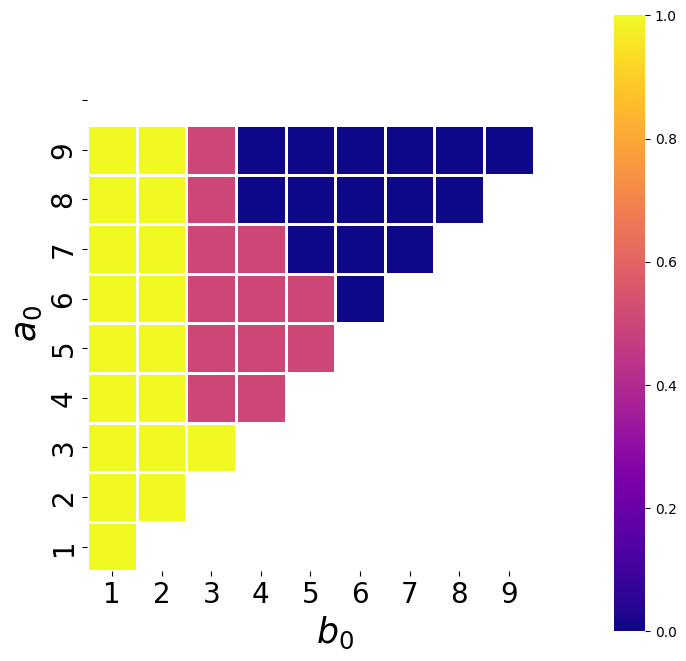

In [ ]:
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 25}
fig = plt.figure(figsize=(8,8))   
ax = fig.gca()
sn.heatmap(mat,vmin=0,vmax=1 ,annot = False,xticklabels=[1,2,3,4,5,6,7,8,9], cmap="plasma",yticklabels=["",9,8,7,6,5,4,3,2,1],ax=ax,cbar=True,linewidths=2,linecolor='w',square=True)
ax.set(xlabel=r"$b_0$", ylabel=r"$a_0$")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r"$b_0$",font)
plt.ylabel(r"$a_0$",font)

In [ ]:
mat[1:7,2]=0.5
mat[3:7,3]=0.5
mat[5,4]=0.5
mat[4,4]=0.5

In [ ]:
import matplotlib

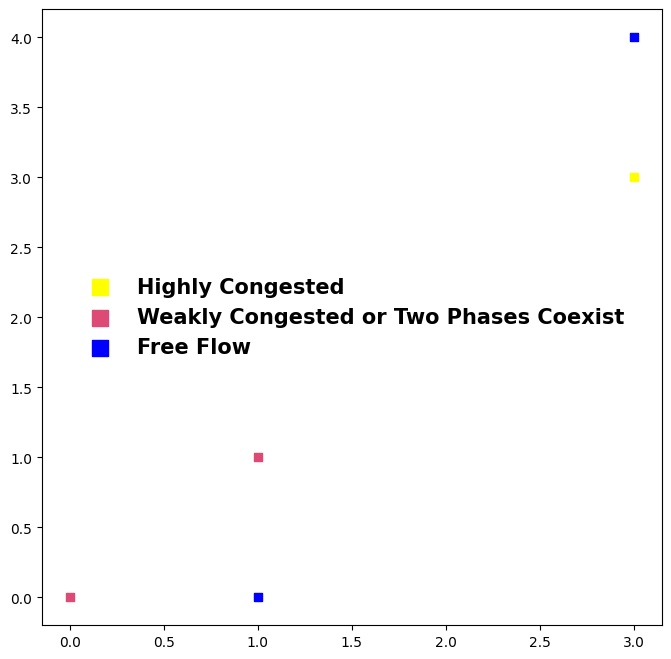

In [ ]:
fig=plt.figure(figsize=(8,8))
ax = fig.gca()
matplotlib.rcParams.update({'legend.fontsize':15})
plt.scatter([1,3],[0,3],label="Highly Congested",c='yellow',marker='s')
plt.scatter([1,0],[1,0],label="Weakly Congested or Two Phases Coexist",c='#DD4A76',marker='s')
plt.scatter([1,3],[0,4],label="Free Flow",c='blue',marker='s')
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties,fontsize=12,markerscale=2,loc=10,frameon=False)


In [ ]:
file_n="/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/Above_threshold/2D_latticeAboveThr_OutF_2Deg_cap_3Deg_deadP_p2_rejP_1.csv"
df=pd.read_csv(file_n,index_col=0)
arr = df.to_numpy()
Arr=np.flip(arr,0)

In [ ]:
arr[9999,::]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

[Text(50.0, 0.5, 'Time'), Text(0.5, 50.0, 'p')]

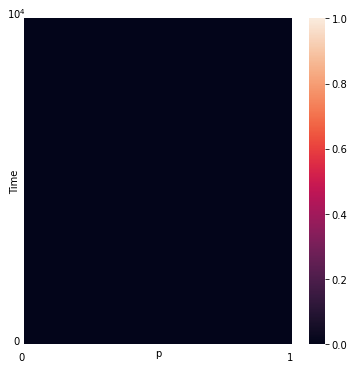

In [ ]:
fig = plt.figure(figsize=(6,6))   
ax = fig.gca()
#fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), constrained_layout=True)
#fig, ax = plt.subplots()
ax.tick_params(bottom=True, top=True, left=True, right=True)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
sn.heatmap(Arr,annot = False,xticklabels=False, yticklabels=False,ax=ax,cbar=True)
#sn.heatmap(df,vmin=0, annot = True,xticklabels=[1,2,3,4,5,6,7,8,9], yticklabels=["",9,8,7,6,5,4,3,2,1],ax=ax,cbar=False)
#ax.set(xticks=[0,5,10],yticks=[0,5000,10000])
ax.text(-03.0, 0, r'$10^4$')
ax.text(-02.0, 10000, r'$0$')
ax.text(-01.0, 10500, r'$0$')
ax.text(47, 10500, r'$1$')
ax.set(xlabel="p", ylabel="Time")

In [ ]:
TS_cities
for indx in range(6):
  for i,j,k in zip(["Ahmedabad_","NewYork_","Delhi_","Mumbai_"],nodes_each_deg_cities,[(6,6),(6,6),(6,6),(4,4)]):
    node=j[0]
    name=i+"TS_mat_OutF_%1dDeg_cap_%1dDeg_deadP_p2_rejP_1_birP_1_100000"%k
    TS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/"+name)
    node=j[indx]
    arr=TS[::,node]
    bins=np.arange(0,np.max(arr)+1,1)
    plt.hist(arr,bins,lw=1.5, density=False,histtype='step',align="left",cumulative=0)

In [ ]:
TS_cities=np.zeros((100000,6,4))
c=0
for i,j,k in zip(["Ahmedabad_","NewYork_","Dehi_","Mumbai_"],nodes_each_deg_cities,[(6,6),(4,4),(6,6),(6,6)]):
      name=i+"TS_mat_OutF_%1dDeg_cap_%1dDeg_deadP_p2_rejP_1_birP_1_100000"%k
      TS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/Time_series_each_node/"+name) #Ahmedabad_TS_mat_OutF_6Deg_cap_6Deg_deadP_p2_rejP_1_birP_1_100000
      for indx,val in enumerate(j):     
        TS_cities[::,indx,c]=TS[::,val]
      c+=1  

FileNotFoundError: ignored

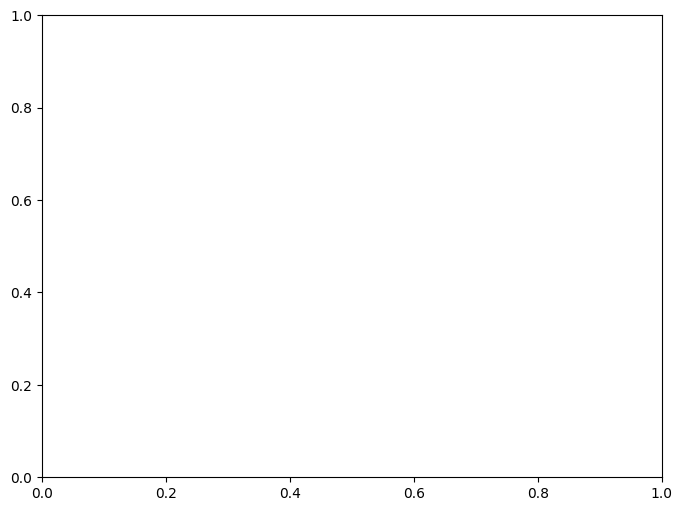

In [ ]:
pre_name="/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/EE/"
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 25}
#xlabel="t(s)"
xlabel=r"$<W>$"
ylabel=r"$\sigma$" 
fig=plt.figure(figsize=(8,6))
ax = fig.gca()
for i,j,k in zip(["Ahmedabad","NewYork","Dehi","Mumbai"],[(6,6),(4,4),(6,6),(6,6)],["Ahmedabad","NewYork","Delhi","Mumbai"]):
  name=pre_name+i+"_TS_mat_OutF_%1dDeg_cap_%1dDeg_deadP_p2_rejP_1_birP_1.0_100000_EE_stat_Degwise_scaP_4.0.csv"%j
  df_node=pd.read_csv(name)
  plt.scatter(df_node['mw'],df_node['sw'],s=1,alpha=0.4,label=k)
plt.xlabel(xlabel,font)
#plt.grid(alpha=0.4)
plt.legend(fontsize=15,markerscale=5)
plt.ylabel(ylabel,font)
#plt.ylim(4000,5000)
#plt.xlim(-100,1000)
#plt.xscale("log")
#plt.yscale("log")
plt.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
ax.spines[['left','right','bottom','top']].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
#fig.tight_layout()
plt.xticks([0,50000,100000],fontsize=20)
plt.yticks(fontsize=20)
plt.show()  

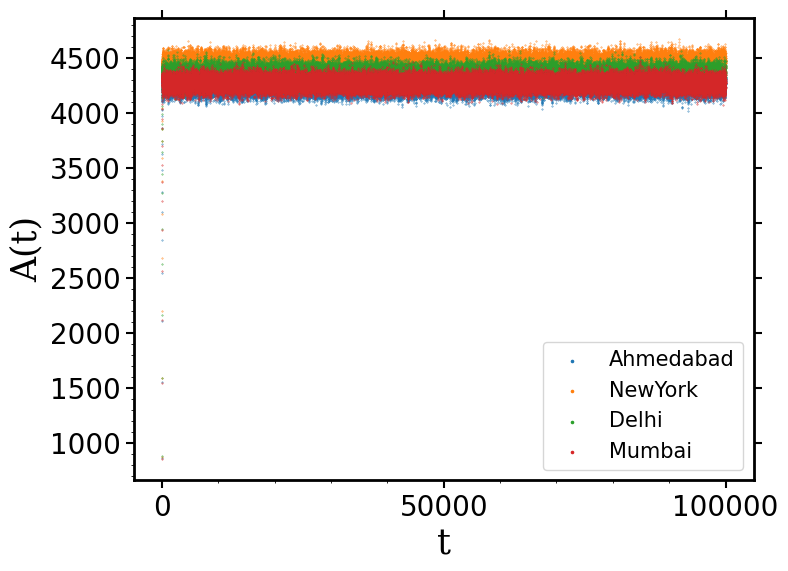

In [ ]:
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 25}
#xlabel="t(s)"
xlabel="t"
ylabel="A(t)" 
fig=plt.figure(figsize=(8,6))
ax = fig.gca()
for i,j,k in zip(["Ahmedabad","NewYork","Dehi","Mumbai"],[(6,6),(4,4),(6,6),(6,6)],["Ahmedabad","NewYork","Delhi","Mumbai"]):
      name=i+"_TS_mat_OutF_%1dDeg_cap_%1dDeg_deadP_p2_rejP_1_birP_1_100000"%j
      TS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/Time_series_each_node/"+name)
      stringg=r", $a_0 =%1d, b_0 = %1d $"%j
      plt.scatter(np.arange(100000),TS.sum(1),s=0.1,alpha=1,label=k)
plt.xlabel(xlabel,font)
#plt.grid(alpha=0.4)
plt.legend(fontsize=15,markerscale=5)
plt.ylabel(ylabel,font)
#plt.ylim(4000,5000)
#plt.xlim(-100,1000)
#plt.xscale("log")
#plt.yscale("log")
plt.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
ax.spines[['left','right','bottom','top']].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
#fig.tight_layout()
plt.xticks([0,50000,100000],fontsize=20)
plt.yticks(fontsize=20)
plt.show()  

In [ ]:
stringg

', $a_0 =6, b_0 = 6 $'

In [ ]:
TS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/Time_series_each_node/Delhi_TS_mat_OutF_1_cap_10_deadP_p2_rejP_0_birP_0.15_100000")

In [ ]:
s2=TS.sum(1)

In [ ]:
s15=TS.sum(1)

In [ ]:
s1=TS.sum(1)

(-1000.0, 20000.0)

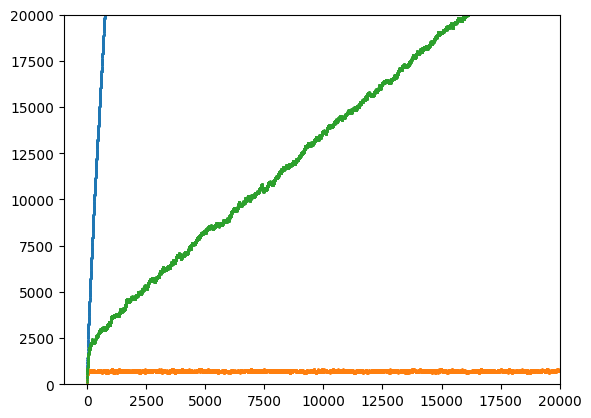

In [ ]:
#plt.scatter(np.arange(0,100000,1),s2,s=1)
plt.scatter(np.arange(0,100000,1),s1,s=1)
plt.scatter(np.arange(0,100000,1),s15,s=1)
plt.ylim(0,20000)
plt.xlim(-1000,20000)

In [ ]:
each_deg_nodes=np.array([[34, 0, 1, 8, 3, 360],
 [11, 27, 0, 1, 28, 33],
 [444, 0, 1, 10, 8, 68],
 [12, 1, 2, 0, 37, 61]])

In [ ]:
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 25}
#xlabel="t(s)"
xlabel="W"
ylabel="Fraction"        
for node in range(6):
  fig=plt.figure(figsize=(8,6))
  ax = fig.gca()
  for i,j,k in zip([0,1,2,3,4,5],["Ahmedabad","NewYork","Dehi","Mumbai"],["Ahmedabad","NewYork","Delhi","Mumbai"]):
      arr=TS_cities[::,node,i]
      arr=arr[100:]
      bins=np.arange(0,np.max(arr)+1,1)
      x,y,_=plt.hist(arr,bins,lw=2, density=True,histtype='step',align="left",cumulative=0,label=k)
  plt.xlabel(xlabel,font)
  plt.grid(alpha=0.4)
  plt.legend(fontsize=15,markerscale=2)
  plt.ylabel(ylabel,font)
  #plt.xlim(-100,1000)
  #plt.xscale("log")
  #plt.yscale("log")
  plt.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
  ax.spines[['left','right','bottom','top']].set_linewidth(2)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  #fig.tight_layout()
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.show()  

In [ ]:
#Dehi_TS_mat_OutF_6Deg_cap_6Deg_deadP_p2_rejP_1_birP_1.0_100000_EE_stat_Nodewise_scaP_4.0.csv
for i,j in zip(["Ahmedabad_","NewYork_","Dehi_","Mumbai_"],[(6,6),(4,4),(6,6),(6,6)]):
  df_node=pd.read_csv(pre+i+suff%j+"_EE_stat_Nodewise_scaP_4.0.csv")
  plt.scatter(df_node['mw'],df_node['sw'],s=10)
  plt.show()

FileNotFoundError: ignored

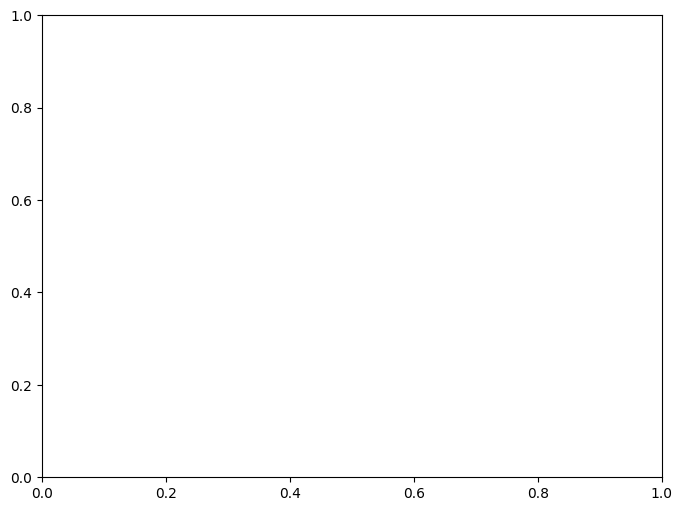

In [ ]:
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 25}
pre="/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/EE_stat/"  
suff="TS_mat_OutF_%1dDeg_cap_%1dDeg_deadP_p2_rejP_1_birP_1.0_100000"
#xlabel="t(s)"
#xlabel=r"$<W_K>$"
xlabel="K"
xlabel=r"$\tau$"
ylabel=r"$\sigma_K$" 
ylabel=r"$P_{EE}(K)$"
fig=plt.figure(figsize=(8,6))
ax = fig.gca()
indx=5
for i,j,k,deg in zip(["Ahmedabad_","NewYork_","Dehi_","Mumbai_"],["Ahmedabad","NewYork","Delhi","Mumbai"],[(6,6),(4,4),(6,6),(6,6)],each_deg_nodes):
   #fig=plt.figure(figsize=(8,6))
   #ax = fig.gca()
   #TS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/DB_CTRW/TSeries/Delhi_TimS_winT_1_alp_"+i)
   TS1=plotting_fun.loadData(pre+i+suff%k+"_reccT_node_dict2.0")
   #TS2=plotting_fun.loadData(pre+i+suff%k+"_EE_mag_diff_node_dict_scP_4.0") 
   #df_node=pd.read_csv(pre+i+suff%k+"_EE_stat_Nodewise_scaP_4.0.csv")
   #df_deg=pd.read_csv(pre+i+suff%k+"_EE_stat_Degwise_scaP_4.0.csv")
   #adjacency_list=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/adjacency_list_"+j+"_")
   #nodes_degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
   #plt.scatter(df_node['mw'],df_node['sw'],s=5)
   #plt.scatter(df_deg['Deg'],df_deg['EE_P'],s=50,label=j)
   #plt.plot(df_deg['Deg'],df_deg['EE_P'],lw=2,ls='-')
   #plt.scatter(nodes_degree_dict.values(),df_node['sw'],s=5)
   node=deg[indx]
   arr=np.abs(np.array(TS1[node]))
   unique, counts = np.unique(arr, return_counts=True)
   plt.scatter(unique, counts,s=30,label=j)
   plt.plot(unique, counts,ls='-',lw=2)
   #uniq=np.unique(arr)
   #plt.scatter(arr[::,0],arr[::,1],s=5,label=r"$\alpha$ = "+ str(j))
   #print(min(arr))
   #plt.show()
   #arr=arr[::,1]
   #arr=np.log(np.array(TS[node]))
   #bins=np.arange(np.min(arr),np.max(arr)+5,15)
   #x,y,_=plt.hist(arr,uniq,lw=1.5, density=False,histtype='step',align="left",cumulative=0,label=r"$\alpha$ = "+ str(j))
   #plt.xlim(0,800)
   #plt.hist(bw_c,bins=200, density=True,histtype='step',cumulative=1)
plt.xlabel(xlabel,font)
plt.grid(alpha=0.4)
plt.legend(fontsize=15,markerscale=2)
plt.ylabel(ylabel,font)
#plt.xlim(-100,1000)
#plt.xscale("log")
#plt.yscale("log")
plt.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
ax.spines[['left','right','bottom','top']].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
#fig.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
arr

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0,
       0, 0, 0, 1, 0, 1, 0])

In [ ]:
pre="/content/drive/MyDrive/MS_thesis_work/Minimal_congestion_phenomen/EE_stat/"  #Ahmedabad_TS_mat_OutF_6Deg_cap_6Deg_deadP_p2_rejP_1_birP_1.0_100000_reccT_node_dict4.0
suff="TS_mat_OutF_%1dDeg_cap_%1dDeg_deadP_p2_rejP_1_birP_1.0_100000"
i="Dehi_"
TS1=plotting_fun.loadData(pre+i+suff%(6,6)+"_reccT_node_dict2.0")
TS2=plotting_fun.loadData(pre+i+suff%(6,6)+"_EE_mag_diff_node_dict_scP_2.0")  #Ahmedabad_TS_mat_OutF_6Deg_cap_6Deg_deadP_p2_rejP_1_birP_1.0_100000_EE_mag_diff_node_dict_scP_4
len(TS1[34]),len(TS2[34])

(3165, 3165)

In [ ]:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''

    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

In [ ]:
x=np.array([0,5,7,8,9,8,6,4,3,2,4,6,7,8,3,5,7,6,9,1])
x[10:],x[:-10]

(array([4, 6, 7, 8, 3, 5, 7, 6, 9, 1]), array([0, 5, 7, 8, 9, 8, 6, 4, 3, 2]))

Text(0, 0.5, 'Auto Correlation function\n(Difference of two succesive EEs on a node)')

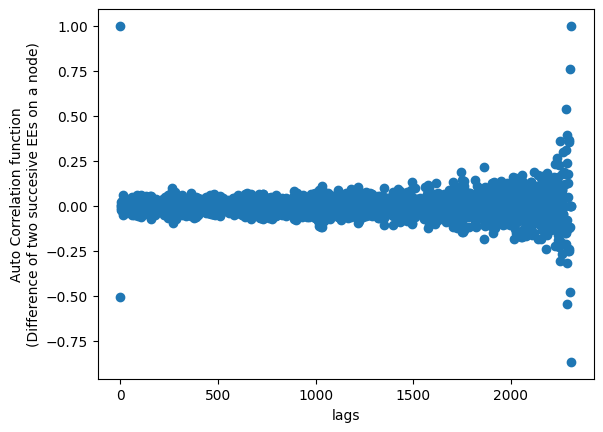

In [ ]:
lags=np.arange(0,3,1)
correaltion=autocorr1(TS2[200],lags)
plt.scatter(lags,correaltion)
plt.xlabel("lags")
plt.ylabel("Auto Correlation function\n(Difference of two succesive EEs on a node)")

In [ ]:
corr=np.correlate(TS2[200], TS2[200], "full")
corr

array([ 0,  1, -1, ..., -1,  1,  0])

-0.006358782798765928
-0.011748591871868152
0.0018948393294297107
-0.011787441795859577
0.012113415209096
-0.01200860992672052
0.05209122008159371
0.016727692042788914
-0.002566128287665158
-0.013089707909084133
0.018396977255409036
0.03759216164331187
0.01675993554035844
-0.0010752098392600186
-0.012690850271616887
0.0012366062804251244
-0.01582559910261853
-0.016071453755603395
0.04328559853195438
0.0044621809158644455
0.021855765008134284
0.03525508554035152
0.02209929512785697
0.0025016824623789414
-0.016960418310101127
0.0030024399104342367
-0.008563915808888148
0.022243113385036064
-0.022748586658252693
-0.030131139762376687
0.018198887667785706
-0.033581274323634884
0.000847097305047755
-0.018043868760268554
-0.008453218932481783
0.022752986998517768
-0.009101525655385103
-0.01412520563336322
-0.02490308956077253
0.016879683790910194
0.022082842175808293
0.0016544492325882114
-0.037765228218714475
-0.025723745292361162
0.03374645770434221
0.01952581716910319
-0.00672959489269033

Text(0, 0.5, 'Frequency')

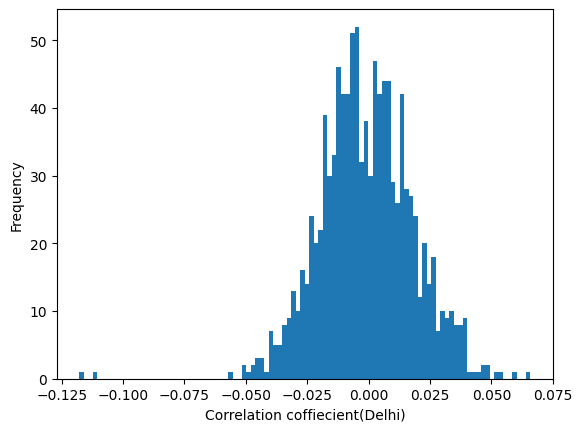

In [ ]:
c=correlation_coeff(TS1,TS2,1092)
plt.hist(c.values(),100)
plt.xlabel("Correlation coffiecient(Delhi)")
plt.ylabel("Frequency")

In [ ]:
def correlation_coeff(dict_1,dict_2,nodes):
  corr_dict={}
  for i in range(nodes):
    x=np.array(dict_1[i])
    y=np.array(dict_2[i])
    #minimum=min(len(x),len(y))
    #x=x[:minimum]
    #y=y[:minimum]
    a=np.mean(np.multiply(x,y))
    x_mean,y_mean=np.mean(x),np.mean(y)
    x_std,y_std=np.std(x),np.std(y)
    corr_dict[i]=(a-x_mean*y_mean)/(x_std*y_std)
    print((a-x_mean*y_mean)/(x_std*y_std)) 
  return corr_dict 